<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🛡️ Insurance Premium Prediction 🧮
    </h1>
</div>


# 📂 Overview

**Background**

This competition presents a synthetic insurance dataset generated using deep learning techniques based on real-world data. The data reflects realistic distributions and relationships but has been anonymized and partially transformed.

As part of the **Playground Series – Season 4, Episode 12** on Kaggle, this competition offers a great opportunity to practice **regression modeling**, feature preprocessing, and model evaluation on a semi-realistic dataset.

> 💡 It is especially suitable for exploring feature importance, handling skewed distributions, and testing ensemble methods.

**Goal of the Project**

The main objective is to **build a machine learning model to predict the `Premium Amount`** charged to an individual based on demographic and historical data.

**Key Features**

| Feature                  | Description                                            |
| ------------------------ |------------------------------------------------------- |
| **Age**                  | Age of the insured individual                           |
| **Gender**               | Gender of the insured individual                        |
| **Annual Income**        | Annual income of the insured individual                 |
| **Marital Status**       | Marital status: Single, Married, Divorced               |
| **Number of Dependents** | Number of dependents                                    |
| **Education Level**      | Highest education level: High School to PhD             |
| **Occupation**           | Employment status: Employed, Self-Employed, Unemployed  |
| **Health Score**         | A score representing the individual’s health status     |
| **Location**             | Living area: Urban, Suburban, or Rural                  |
| **Policy Type**          | Type of insurance policy: Basic, Comprehensive, Premium |
| **Previous Claims**      | Number of past insurance claims                         |
| **Vehicle Age**          | Age of the insured vehicle                              |
| **Credit Score**         | Credit score of the insured individual                  |
| **Insurance Duration**   | Duration of the insurance policy in years               |
| **Premium Amount**       | Target variable: Insurance premium to be predicted      |
| **Policy Start Date**    | Policy start date – needs formatting or transformation  |
| **Customer Feedback**    | Free-text customer comments                             |
| **Smoking Status**       | Indicates whether the person is a smoker                |
| **Exercise Frequency**   | Exercise habits: Daily, Weekly, Monthly, Rarely         |
| **Property Type**        | Type of property owned: House, Apartment, Condo         |

**Files Provided**

* `train.csv`: Training data with features and target variable.
* `test.csv`: Test data without target.
* `sample_submission.csv`: Template for the expected submission format.

(Source: [Kaggle Competition Page](https://www.kaggle.com/competitions/playground-series-s4e12/overview))

**Project Objective**

This notebook aims to walk through a complete machine learning pipeline to **predict insurance premiums** using tabular data. Major components include:

* **Exploratory Data Analysis (EDA):**
  Examine distributions, missing values, outliers, and data imbalance.

* **Feature Engineering:**

  * Impute missing values and handle outliers
  * Encode categorical features (Label/One-Hot)
  * Transform skewed numerical features

* **Modeling & Evaluation:**

  * Try multiple regression models (e.g., LGBM, XGBoost, CatBoost)
  * Use k-fold cross-validation
  * Select the model with best generalization on validation set

* **Prediction Strategy:**
  Predict `Premium Amount` for each test entry using the best model.

* **Evaluation Metric:**
  Root Mean Squared Logarithmic Error (**RMSLE**) – suitable for skewed regression targets.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [3]:
# Load the datasets
# train.csv: Features and target labels
# test.csv: Features only

df_train = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (1200000, 21)

Test Data Shape: (800000, 20)


In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0           NaN                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0


Test Data Preview:


id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   
2              NaN         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              NaN         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

In [5]:
# Replace space to under score.
df_train.columns = df_train.columns.str.strip().str.replace(" ", "_")
df_test.columns = df_test.columns.str.strip().str.replace(" ", "_")

In [6]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual_Income         1155051 non-null  float64
 4   Marital_Status        1181471 non-null  object 
 5   Number_of_Dependents  1090328 non-null  float64
 6   Education_Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health_Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy_Type           1200000 non-null  object 
 11  Previous_Claims       835971 non-null   float64
 12  Vehicle_Age           1199994 non-null  float64
 13  Credit_Score          1062118 non-null  float64
 14  Insurance_Duratio

In [7]:
df_train["Customer_Feedback"].value_counts()

Customer_Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 1200000 samples with 21 columns, including the target variable `Premium_Amount`.
   - The **test dataset** includes 800000 samples with 20 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `Age`, `Annual_Income`, `Health_Score`, `Credit_Score`, `Vehicle_Age`.
     - **Categorical features:** `Gender`, `Marital_Status`, `Education_Level`, `Occupation`, `Location`, `Policy_Type`, `Smoking_Status`, `Exercise_Frequency`, `Property_Type`, `Customer_Feedback`, `Number_of_Dependents`, `Previous_Claims`, `Insurance_Duration`.
     - The feature `Policy_Start_Date` need to convert to date time.
   - The target variable is numerical, representing insurance premium amount.

**Data Consistency and Completeness**  
   - The datasets have **missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features are integers and floats, and categorical features are objects (strings).
   - The column `id` is just number to identify in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset.

In [8]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [9]:
# Convert Policy_Start_Date to to_datetime.
df_train["Policy_Start_Date"] = pd.to_datetime(df_train["Policy_Start_Date"], format="mixed")
df_test["Policy_Start_Date"] = pd.to_datetime(df_test["Policy_Start_Date"], format="mixed")

num_features = ["Age", "Annual_Income", "Health_Score", "Credit_Score", "Vehicle_Age"]
cat_features = ["Gender", "Marital_Status", "Education_Level", "Occupation", "Location", "Policy_Type", 
                "Smoking_Status", "Exercise_Frequency", "Property_Type", "Customer_Feedback", "Number_of_Dependents", "Previous_Claims", "Insurance_Duration"]

print("Train Data describe:")
cmap = sns.light_palette("blue", as_cmap=True)
display(df_train.drop(columns=["Number_of_Dependents", "Previous_Claims", "Insurance_Duration",
                               "Policy_Start_Date"], axis=1).describe().T.style.background_gradient(cmap=cmap))

print("\nTest Data describe:")
display(df_test.drop(columns=["Number_of_Dependents", "Previous_Claims", "Insurance_Duration",
                               "Policy_Start_Date"], axis=1).describe().T.style.background_gradient(cmap=cmap))

Train Data describe:



Test Data describe:


## Descriptive Insights from Dataset Statistics

**Detailed Observations:**

| Feature                    | Mean/Median Comparison             | min–max Range       | Conclusion        |
| -------------------------- | ---------------------------------- | ------------------- | ----------------- |
| **Age**                    | Nearly identical mean (`~41.14`)   | 18–64               | Consistent      |
| **Annual\_Income**         | Very close (32,745 vs 32,803)      | 8,001–149,997       | Fully matched   |
| **Health\_Score**          | Mean \~25.6                        | Stable distribution | Okay            |
| **Credit\_Score**          | Mean \~592.9, std \~150            | 300–849             | Very consistent |
| **Vehicle\_Age**           | Mean \~9.57, std \~5.78            | 0-19                | Very consistent |
| **Premium\_Amount**        | Target column (train only)         | –                   | As expected     |

**Summary:**

* **No significant data drift** between train and test sets.
* **Distributions and scales of numerical features are nearly identical**.

In [10]:
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_train)
convert_cat(df=df_test)

# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1181295 non-null  float64       
 1   Gender                1200000 non-null  category      
 2   Annual_Income         1155051 non-null  float64       
 3   Marital_Status        1181471 non-null  category      
 4   Number_of_Dependents  1090328 non-null  category      
 5   Education_Level       1200000 non-null  category      
 6   Occupation            841925 non-null   category      
 7   Health_Score          1125924 non-null  float64       
 8   Location              1200000 non-null  category      
 9   Policy_Type           1200000 non-null  category      
 10  Previous_Claims       835971 non-null   category      
 11  Vehicle_Age           1199994 non-null  float64       
 12  Credit_Score          106

In [11]:
print("Train Data describe:")
df_train.describe(include=["category", "object"]).T

Train Data describe:


count unique       top      freq
Gender                  1200000      2      Male    602571
Marital_Status          1181471      3    Single    395391
Number_of_Dependents  1090328.0    5.0       3.0  221475.0
Education_Level         1200000      4  Master's    303818
Occupation               841925      3  Employed    282750
Location                1200000      3  Suburban    401542
Policy_Type             1200000      3   Premium    401846
Previous_Claims        835971.0   10.0       0.0  305433.0
Insurance_Duration    1199999.0    9.0       9.0  137781.0
Customer_Feedback       1122176      3   Average    377905
Smoking_Status          1200000      2       Yes    601873
Exercise_Frequency      1200000      4    Weekly    306179
Property_Type           1200000      3     House    400349

In [12]:
print("\nTest Data describe:")
df_test.describe(include=["category", "object"]).T


Test Data describe:


count unique       top      freq
Gender                  800000      2      Male    401089
Marital_Status          787664      3    Single    263705
Number_of_Dependents  726870.0    5.0       3.0  147745.0
Education_Level         800000      4  Master's    202552
Occupation              560875      3  Employed    188574
Location                800000      3  Suburban    267190
Policy_Type             800000      3   Premium    267629
Previous_Claims       557198.0   10.0       0.0  202806.0
Insurance_Duration    799998.0    9.0       9.0   92185.0
Customer_Feedback       747724      3   Average    251217
Smoking_Status          800000      2       Yes    401859
Exercise_Frequency      800000      4    Weekly    204514
Property_Type           800000      3     House    267151

## Insights on Categorical Features

**Detailed Comparison:**

| Feature                    | Train (Top)        | Test (Top)         | Unique Values | Conclusion                         |
| -------------------------- | ------------------ | ------------------ | ------------- | ---------------------------------- |
| **Gender**                 | Male (602,571)     | Male (401,089)     | 2             | Consistent                       |
| **Marital\_Status**        | Single (395,391)   | Single (263,705)   | 3             | Consistent                       |
| **Number\_of\_Dependents** | 3.0 (221,475)      | 3.0 (147,745)      | 5             | Consistent                       |
| **Education\_Level**       | Master’s (303,818) | Master’s (202,552) | 4             | Consistent                       |
| **Occupation**             | Employed (282,750) | Employed (188,574) | 3             | Consistent                       |
| **Location**               | Suburban (401,542) | Suburban (267,190) | 3             | Consistent                       |
| **Policy\_Type**           | Premium (401,846)  | Premium (267,629)  | 3             | Consistent                       |
| **Previous\_Claims**       | 0.0 (305,433)      | 0.0 (202,806)      | 10            | Consistent (discrete numeric)    |
| **Insurance\_Duration**    | 9.0 (137,781)      | 9.0 (92,185)       | 9             | Consistent (can be ordinal/cat.) |
| **Customer\_Feedback**     | Average (377,905)  | Average (251,217)  | 3             | Consistent                       |
| **Smoking\_Status**        | Yes (601,873)      | Yes (401,859)      | 2             | Consistent                       |
| **Exercise\_Frequency**    | Weekly (306,179)   | Weekly (204,514)   | 4             | Consistent                       |
| **Property\_Type**         | House (400,349)    | House (267,151)    | 3             | Consistent                       |

**Summary:**

* All **categorical features** show **identical unique value counts** between training and test sets.
* The **most frequent value (`top`)** remains the same across datasets → no major **category shift or drift**.
* Some variables (like `Previous_Claims`, `Insurance_Duration`, `Number_of_Dependents`) are numerical in type but **behave categorically**, and can be encoded accordingly.
* This consistency allows safe use of **shared encoding pipelines** (e.g., `OneHotEncoder`, `OrdinalEncoder`, `LabelEncoder`) **without risk of unseen categories**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [13]:
# Function to calculate missing values, percentages, and data types
def missing_values_table(df):
    missing_count = df.isnull().sum()
    missing_percentage = 100 * missing_count / len(df)
    return pd.DataFrame({
        "Missing Values": missing_count,
        "Percentage (%)": missing_percentage
    })

# Create tables for train and test datasets
train_missing_table = missing_values_table(df_train)
test_missing_table = missing_values_table(df_test)

# Display the tables
print("Missing Values Table - Training Dataset:\n")
display(train_missing_table[train_missing_table["Missing Values"] > 0])  # Display only features with missing values
print("\n")

print("Missing Values Table - Test Dataset:\n")
display(test_missing_table[test_missing_table["Missing Values"] > 0]) 

Missing Values Table - Training Dataset:



Missing Values  Percentage (%)
Age                            18705        1.558750
Annual_Income                  44949        3.745750
Marital_Status                 18529        1.544083
Number_of_Dependents          109672        9.139333
Occupation                    358075       29.839583
Health_Score                   74076        6.173000
Previous_Claims               364029       30.335750
Vehicle_Age                        6        0.000500
Credit_Score                  137882       11.490167
Insurance_Duration                 1        0.000083
Customer_Feedback              77824        6.485333



Missing Values Table - Test Dataset:



Missing Values  Percentage (%)
Age                            12489        1.561125
Annual_Income                  29860        3.732500
Marital_Status                 12336        1.542000
Number_of_Dependents           73130        9.141250
Occupation                    239125       29.890625
Health_Score                   49449        6.181125
Previous_Claims               242802       30.350250
Vehicle_Age                        3        0.000375
Credit_Score                   91451       11.431375
Insurance_Duration                 2        0.000250
Customer_Feedback              52276        6.534500

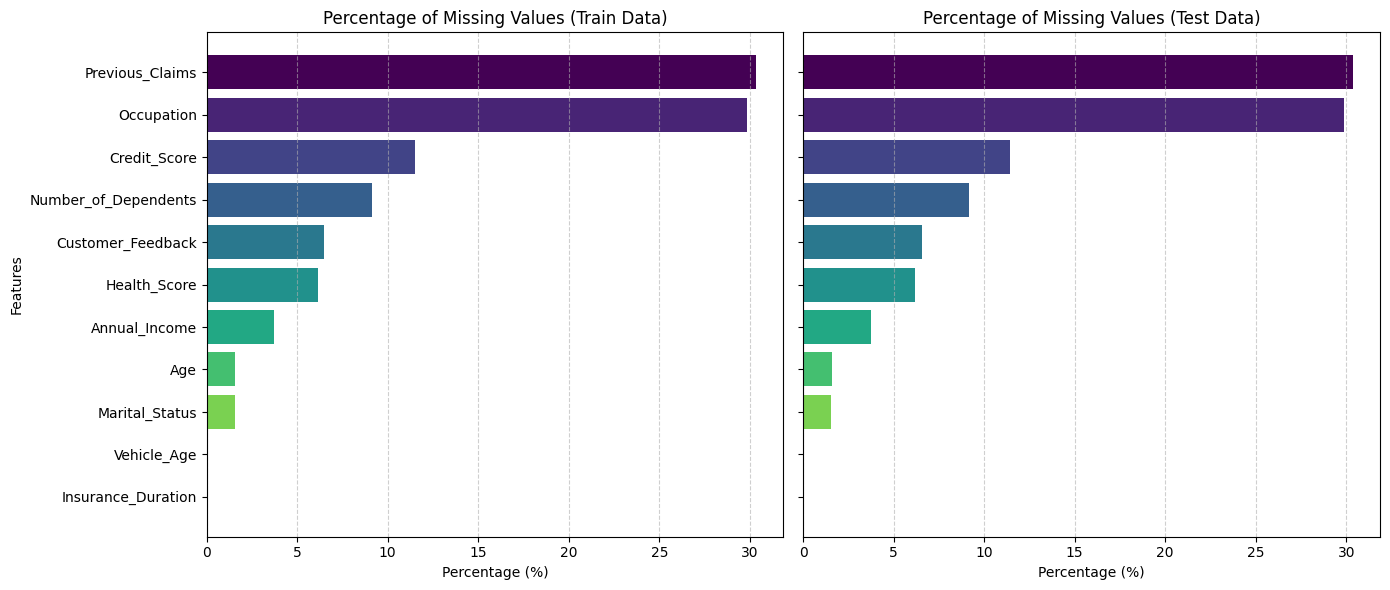

In [14]:
from matplotlib import cm

# Filter missing values for train and test datasets
train_missing = train_missing_table[train_missing_table["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)
test_missing = test_missing_table[test_missing_table["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)

# Set up the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Bar plot for train dataset
train_colors = cm.get_cmap("viridis", len(train_missing))(range(len(train_missing)))
ax[0].barh(train_missing.index, train_missing["Percentage (%)"], color=train_colors)
ax[0].set_title("Percentage of Missing Values (Train Data)", fontsize=12)
ax[0].set_xlabel("Percentage (%)", fontsize=10)
ax[0].set_ylabel("Features", fontsize=10)
ax[0].grid(axis="x", linestyle="--", alpha=0.6)
ax[0].invert_yaxis()  

# Bar plot for test dataset
test_colors = cm.get_cmap("viridis", len(test_missing))(range(len(test_missing)))
ax[1].barh(test_missing.index, test_missing["Percentage (%)"], color=test_colors)
ax[1].set_title("Percentage of Missing Values (Test Data)", fontsize=12)
ax[1].set_xlabel("Percentage (%)", fontsize=10)
ax[1].grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Checking duplicate Value

In [15]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 1,200,000 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 800,000 rows



## Checking Outlier Value

In [16]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count
0  Annual_Income          67132

In [17]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0  Annual_Income          44937

## Data Quality Insights: Missing Values, Duplicates and Outliers

**1. Missing Values Analysis**

Both the **training** and **test** datasets show a **highly consistent distribution of missing values**, suggesting that data collection or preprocessing processes were uniform across the datasets.

**High missingness in certain key columns:**

   * `Occupation` has nearly **30% missing values** in both datasets — the most missing of all features.
   * `Previous_Claims` is also missing over **30%**, which may impact the model’s ability to assess claim history.
   * `Credit_Score` has around **11.5% missing**, which is notable given its potential importance in decision-making models.

**Moderate missingness (\~5–10%):**

   * Features like `Health_Score`, `Customer_Feedback`, and `Number_of_Dependents` have missing rates between **6% and 9%**.

**Negligible missingness:**

   * Columns such as `Age`, `Marital_Status`, and `Annual_Income` have under 4% missing values.
   * `Vehicle_Age` and `Insurance_Duration` have **extremely low missingness (<0.001%)**.

**Overall Summary:**

   * The missing value patterns are consistent across training and test sets, indicating good data quality alignment. Key features such as `Occupation`, `Previous_Claims`, and `Credit_Score` should be carefully imputed or engineered to avoid introducing bias.
   * Imputation: Use median or mean values for numerical features like `Credit_Score` and `Number_of_Dependents`. For categorical features like `Occupation`, use the mode or "Unknown".

**2. Duplicate Records Analysis**

* We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
* **No duplicate records** were found in train and test dataset, confirming the uniqueness and integrity of each sample:  
  * Training Data: 0 duplicates out of **1,200,000** rows  
  * Test Data: 0 duplicates out of **800,000** rows 
* The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**3. Outliers Records Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train** and **test** datasets contain **notable outliers** in `Annual_Income`:

  * **Train**: Annual_Income - **67132** outliers.
  * **Test**: Annual_Income - **44937** outliers.
  * These values likely exceed the 1.5×IQR threshold and are flagged as outliers.

**4. Summary Table:**

| Aspect                 | Quick Note                                          |
| ---------------------- | --------------------------------------------------- |
| Missing Values         | The missing value patterns are consistent           |
| Outliers               | Found in `Annual_Income`.                           |
| Duplicates             | None, clean datasets                                |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [18]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [19]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", pad=15, weight = "bold")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    df_clean = df[[categorical_feature, numeric_feature]].dropna()

    # Extract values
    groups = df_clean[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df_clean[df_clean[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df_clean, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Premium_Amount Distribution

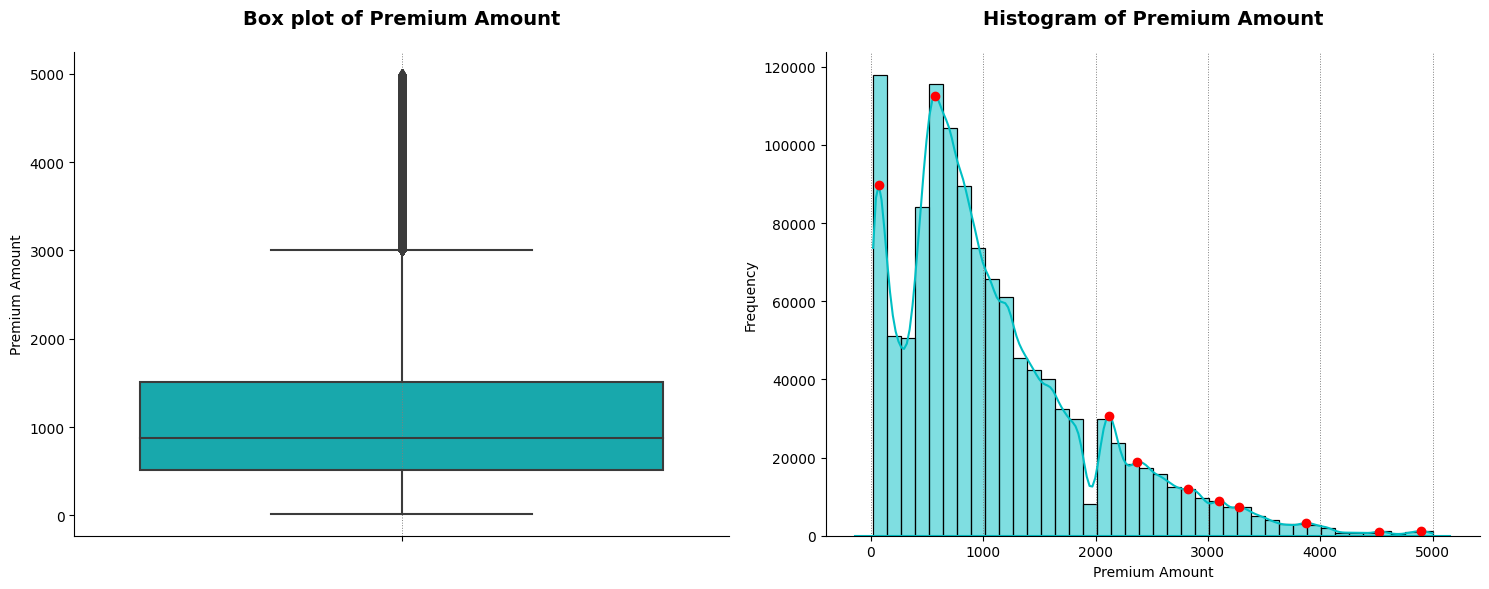

In [20]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=df_train, y = "Premium_Amount", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of Premium Amount", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("Premium Amount")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=df_train, x = "Premium_Amount", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of Premium Amount", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Premium Amount")
ax[1].set_ylabel("Frequency")
ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_train["Premium_Amount"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**General Analysis of the Distribution of `Premium Amount`**

**Box Plot:**

* The distribution shows **many upper outliers**, particularly from around 3000 and above.
* The **median** lies closer to the lower end, indicating a **non-symmetric, non-normal distribution**.
* The interquartile range (IQR) extends further upward than downward, suggesting a **right-skewed distribution**.

**Histogram:**

* The data exhibits a **strong right skew**:

  * Most observations are concentrated in the lower range (0–1000).
  * Frequencies decrease gradually and extend toward higher values, forming a long right tail.
* There is a **noticeable drop in frequency** between the 2000–3000 range, yet some high peaks remain.

**Summary for Reporting:**

> *The `Premium Amount` variable demonstrates a clear right-skewed distribution, with the majority of customers paying below 1000. There are multiple high-end outliers and recurring peaks, likely reflecting different product tiers or customer groups. This distribution should be treated or transformed (e.g., log transformation or Yeo-Johnson) if used in models sensitive to normality assumptions.*

## Numerical Feature Distributions

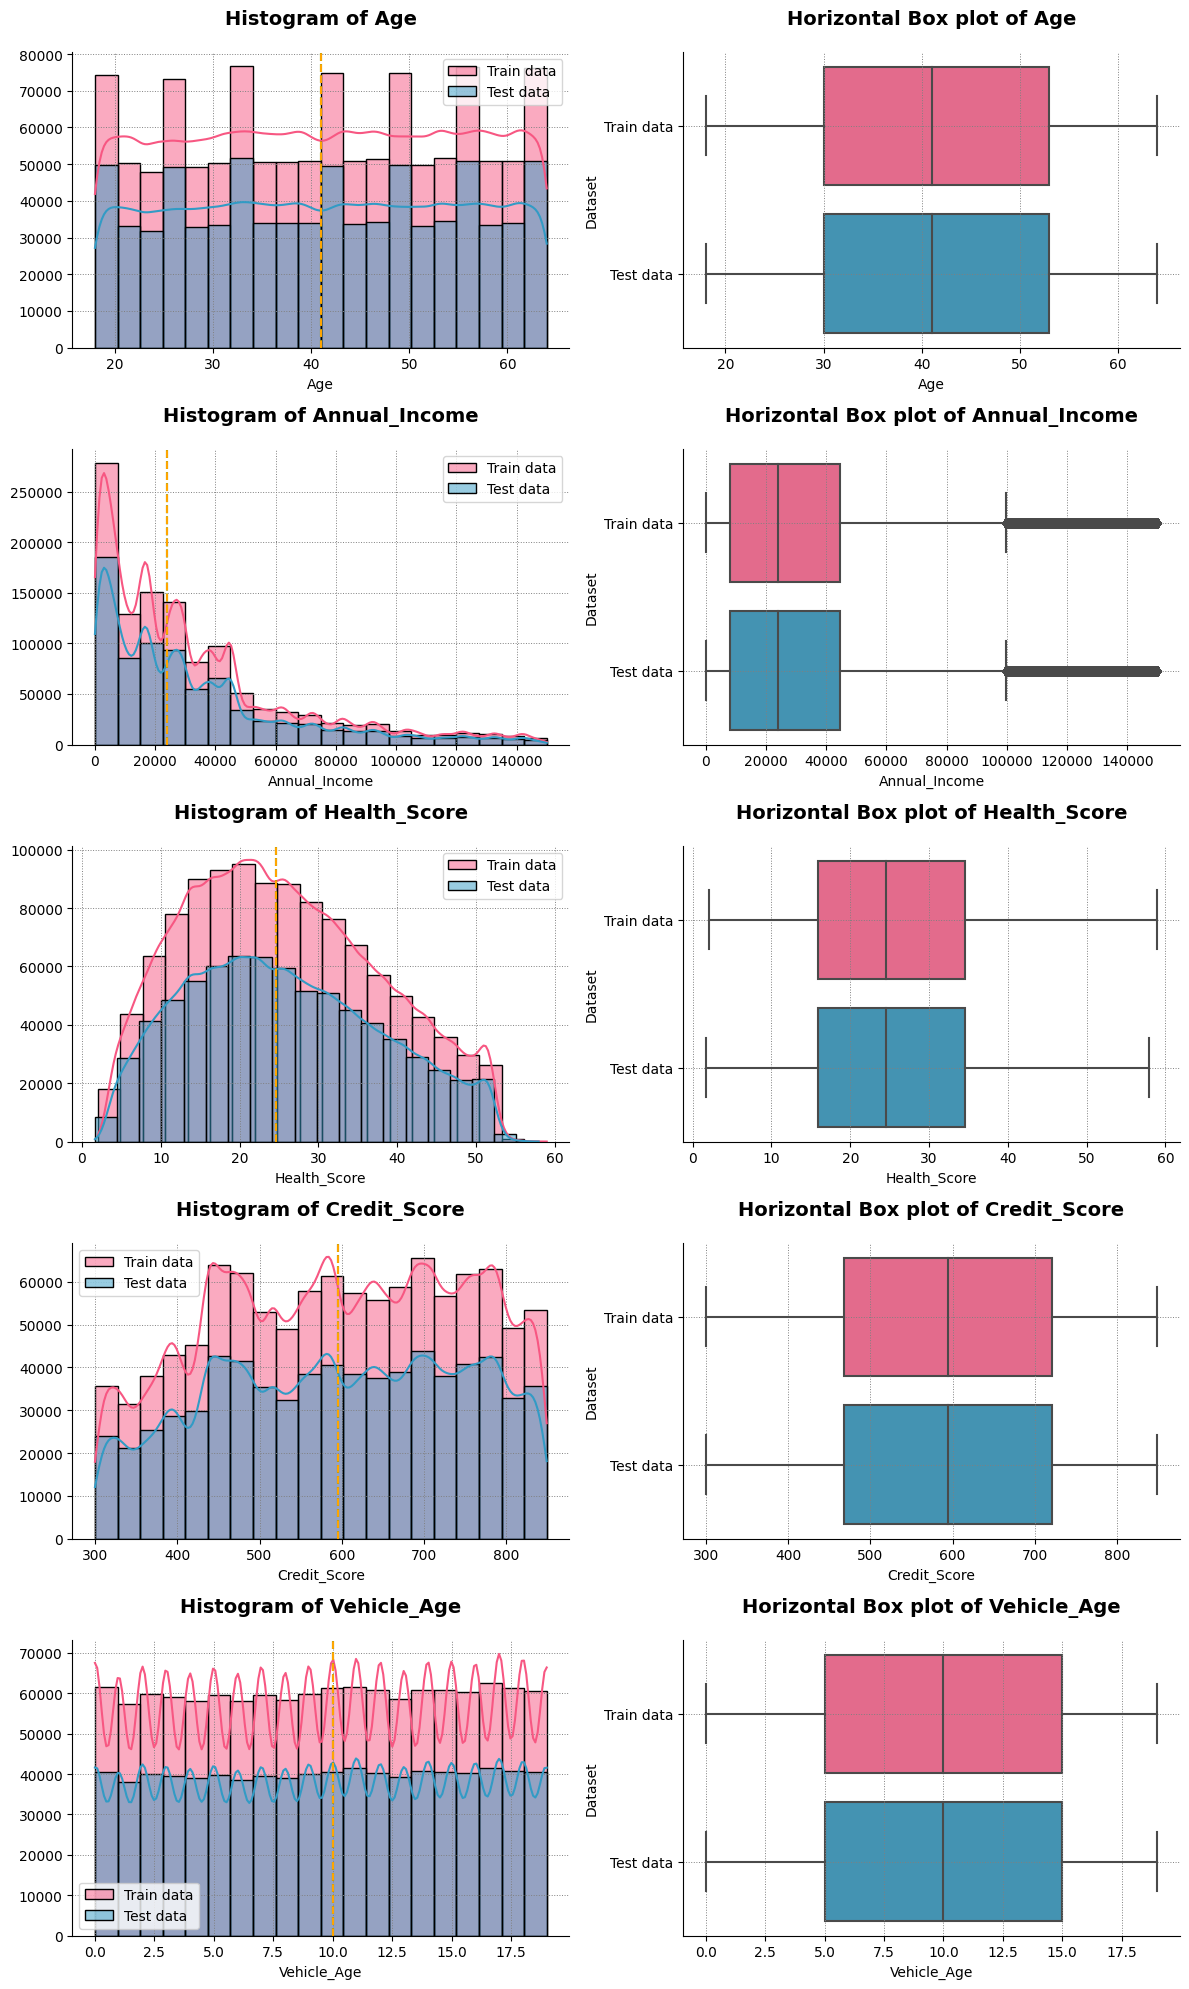

In [21]:
def plot_numerical_features(df_train, df_test, num_features):
    colors = color()
    n = len(num_features)

    fig, ax = plt.subplots(n, 2, figsize=(12, n * 4))
    ax = np.array(ax).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=ax[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=ax[i, 0], label="Test data")
        ax[i, 0].set_title(f"Histogram of {feature}", fontsize=14, pad=20, weight="bold")
        ax[i, 0].legend()
        ax[i, 0].set_ylabel("")
        ax[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        ax[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        ax[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=ax[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=ax[i, 1]
        )
        ax[i, 1].set_title(f"Horizontal Box plot of {feature}", fontsize=14, pad=20, weight="bold")
        ax[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=ax[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, num_features=num_features)

In [22]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        if feature == "Premium_Amount" and dataset_name == "Test data":
            pass # The feature Premium_Amount only exist in train data.
        else:
            skew = data[feature].skew(skipna=True)
            skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<25} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<25} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<25} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_train, skew_train_df = check_skewness(df_train, "Train data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test data")


🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
Annual_Income             |   +1.4704 | Highly skewed
Health_Score              |   +0.2822 | Approximately symmetric
Credit_Score              |   -0.1136 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0125 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
Annual_Income             |   +1.4645 | Highly skewed
Health_Score              |   +0.2827 | Approximately symmetric
Credit_Score              |   -0.1139 | Approximately symmetric
Ve

### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**
- **Histograms** and **boxplots** for all numerical features show that the **train** and **test** datasets have nearly identical distributions.
- This consistency suggests that the synthetic train/test data generation process closely matched the original data, reducing the risk of distributional shift and supporting reliable model generalization.

**Skewness Analysis** <br>
- Consistency Between Train and Test:
  - Features with high skewness in the training set also show high skewness in the test set.
  - This is good for modeling, as similar distributions help the model generalize better and avoid surprises on unseen data.
- Severely Right-Skewed Distributions (Highly Skewed):
  - The features `Annual_Income` have skewness > 1. We need to use method log transformation or Yeo-Johnson to handle it. 
- Approximately Symmetric Features:
  - The Skewness close to 0  includes: `Health_Score`, `Credit_Score`, `Age`.
  - Do not need transformation and can be directly used in most models.

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

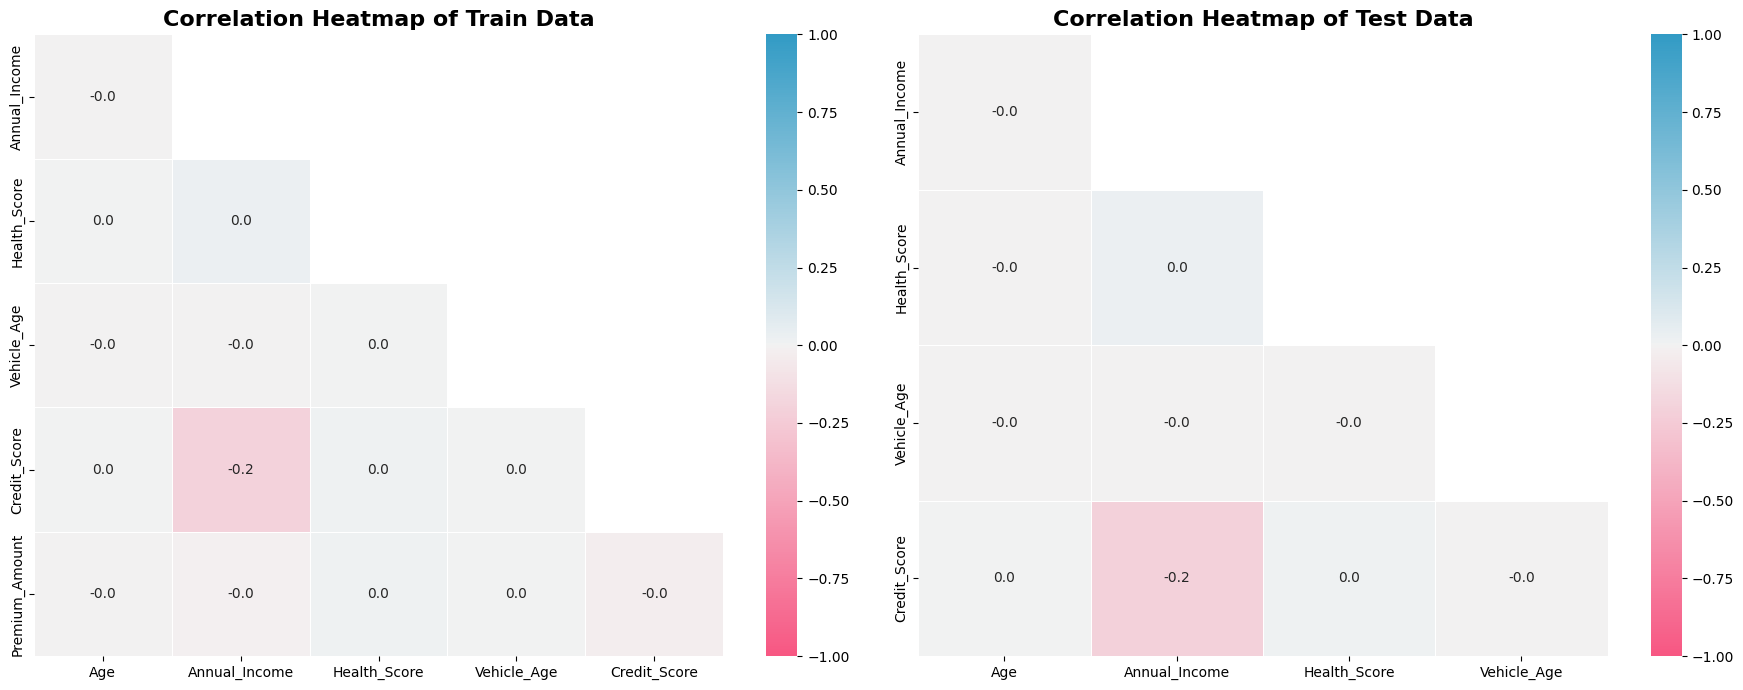

In [23]:
def plot_correlation(df_train, df_test, train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train, df_test=df_test)

**Observation on Correlation Heatmaps:**

**Key Findings:**

* The variables analyzed include: `Age`, `Annual_Income`, `Health_Score`, `Credit_Score`, `Vehicle_Age` and `Premium_Amount`.
* **All correlation coefficients are very low**, close to zero:

  * No feature pair exhibits **strong linear correlation** (positive or negative).
  * The highest absolute value is **-0.20**, between `Credit_Score` and `Annual_Income`.

**Detailed Observations:**

| Feature Pair                      | Correlation | Interpretation                                                                                     |
| --------------------------------- | ----------- | -------------------------------------------------------------------------------------------------- |
| `Credit_Score` vs `Annual_Income` | -0.20       | Weak negative correlation — higher income does not necessarily associate with higher credit scores |
| `Premium_Amount` vs others (Only Train)        | \~ 0.00     | No clear linear relationship with other variables                                     |
| `Age`, `Health_Score`, `Income`   | < ±0.03     | Almost no linear correlation                                                                       |

**Implications – Low Risk of Multicollinearity:**

* Since all correlation coefficients are near zero, there is **no indication of multicollinearity**.
* This is especially beneficial when applying **linear models (e.g., Linear Regression)**:

  * Stable model behavior
  * Reliable coefficient estimates
  * No need for feature removal or transformation due to correlation

**Conclusion:**

> *The correlation matrix reveals **very weak linear dependencies** among the selected numerical features. This implies a low multicollinearity risk and confirms that the features can be safely used in both linear and tree-based models without additional preprocessing.*

## Categorical Feature Distributions

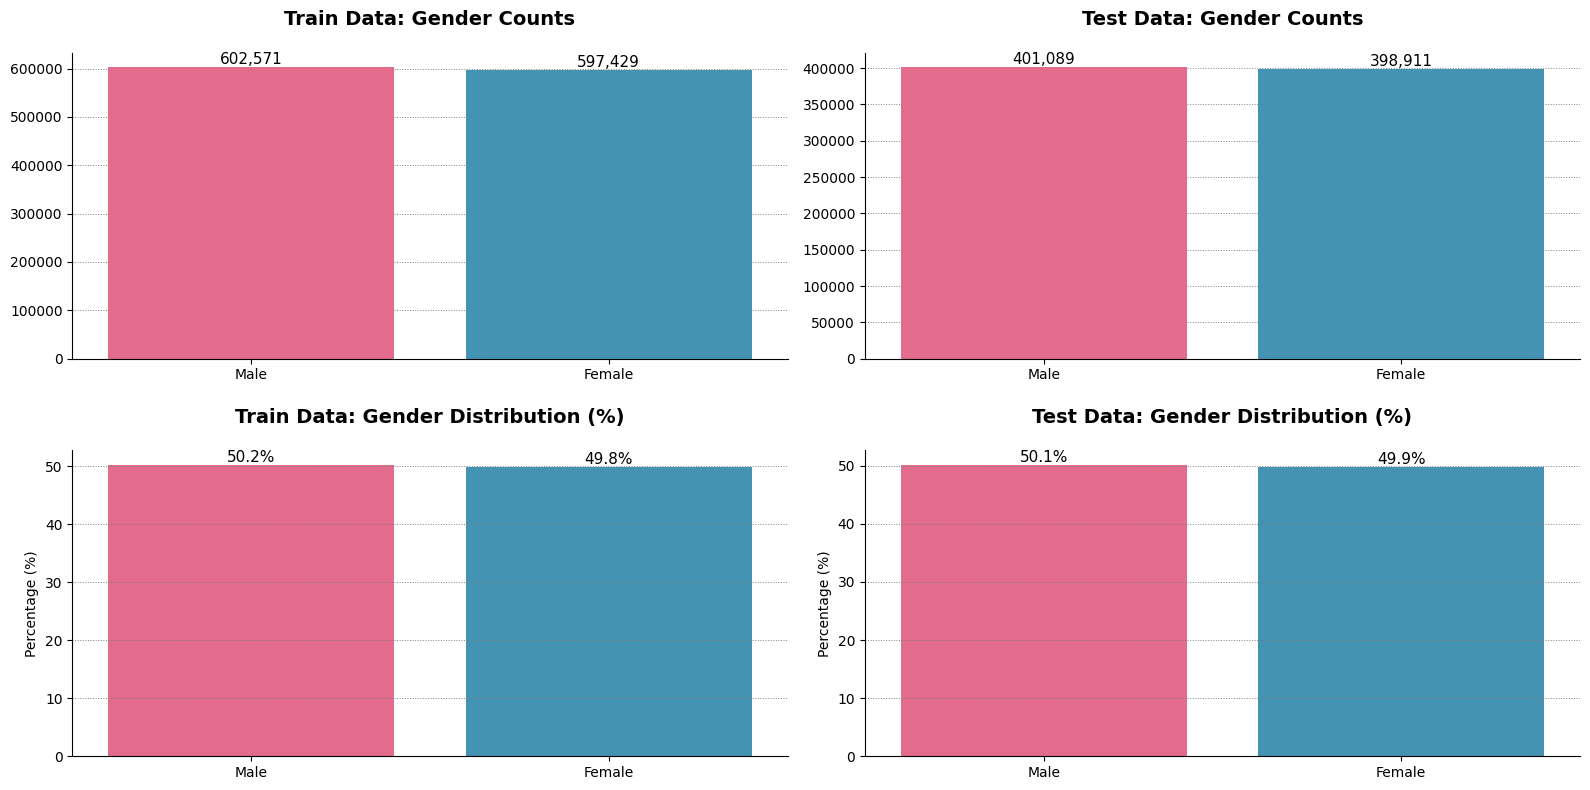

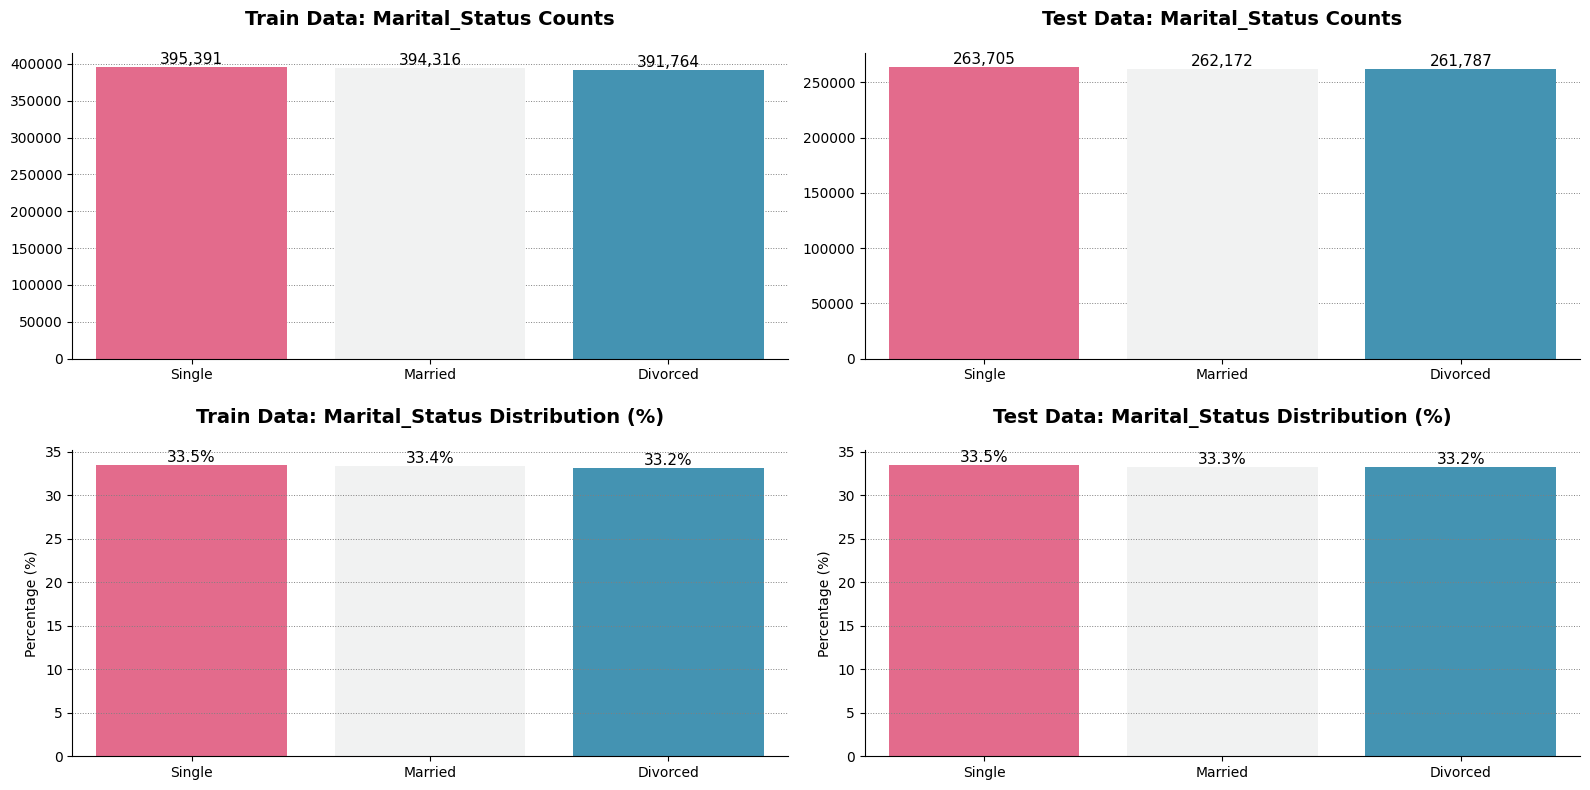

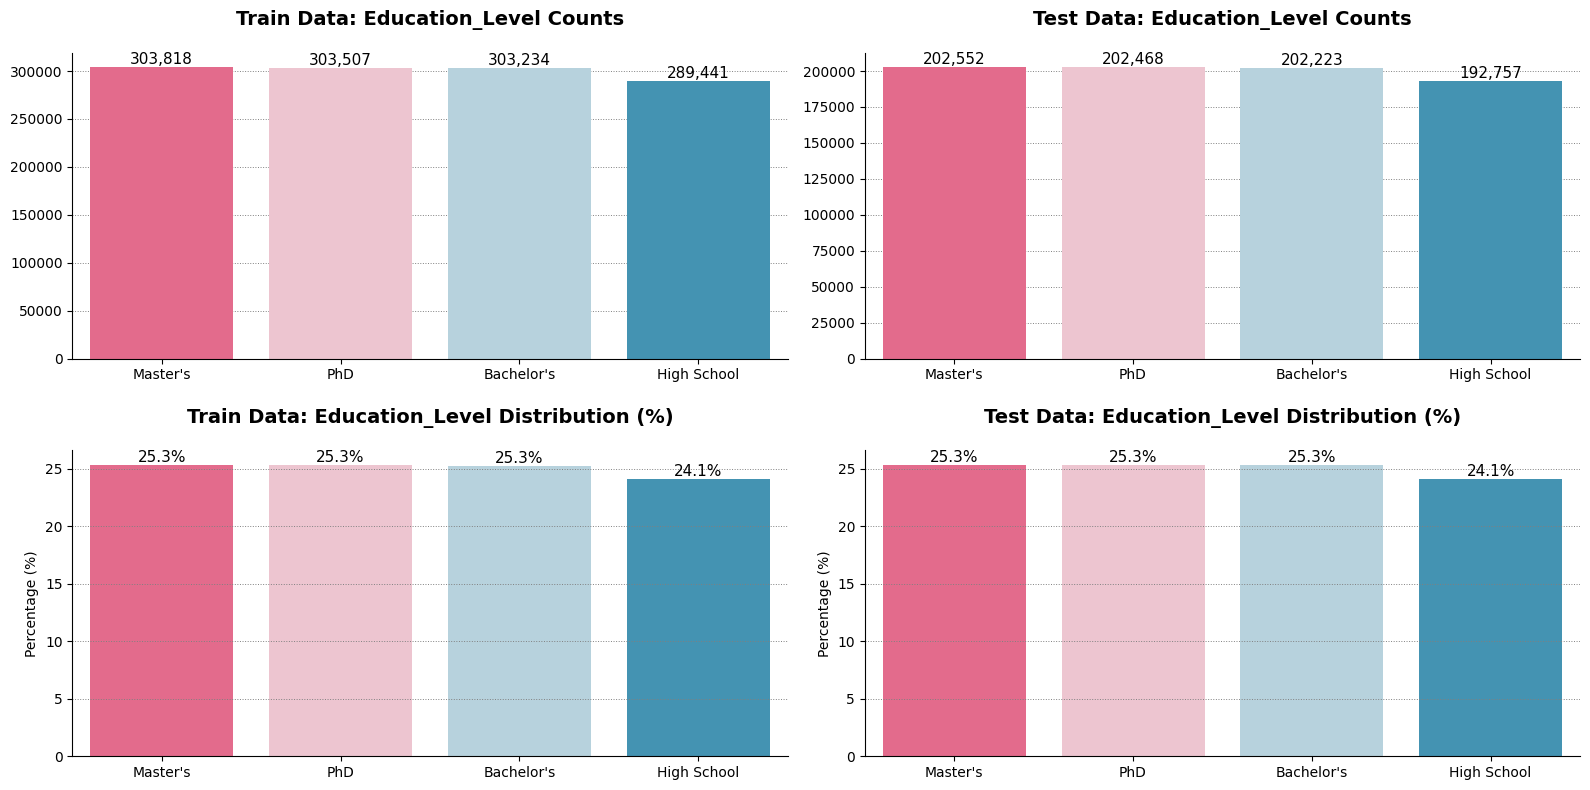

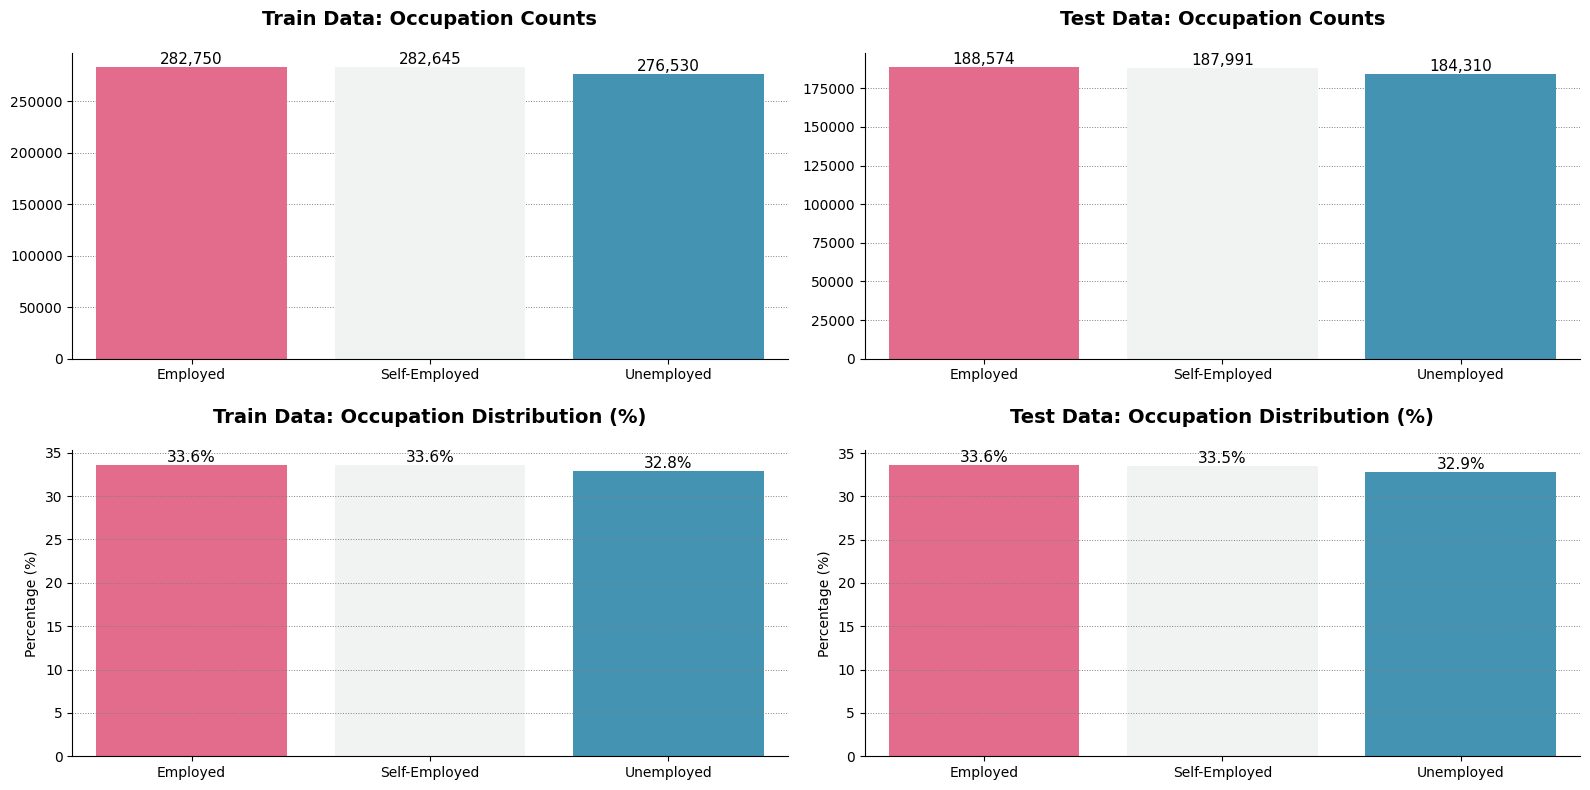

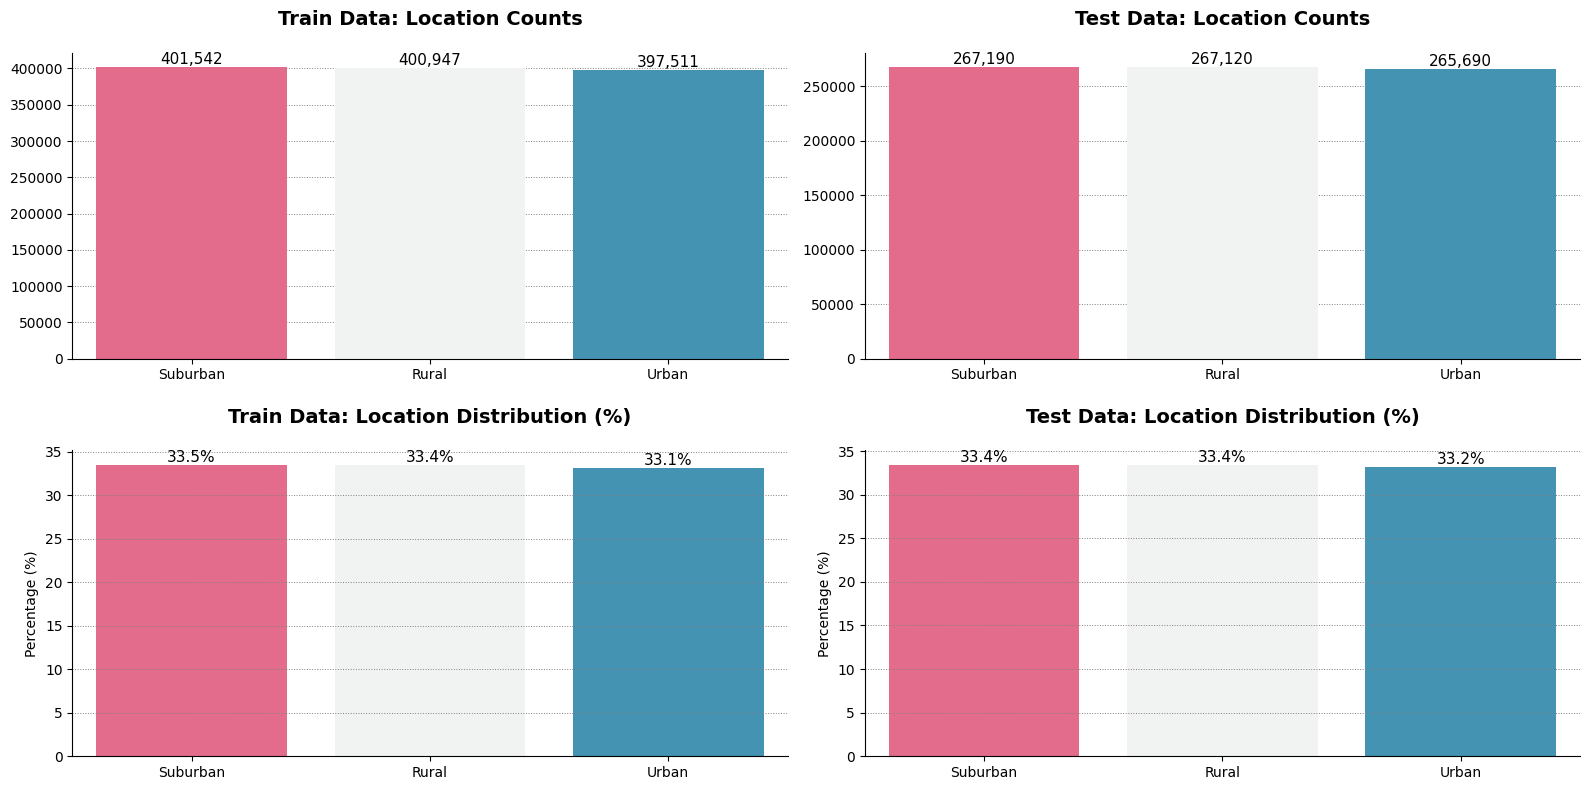

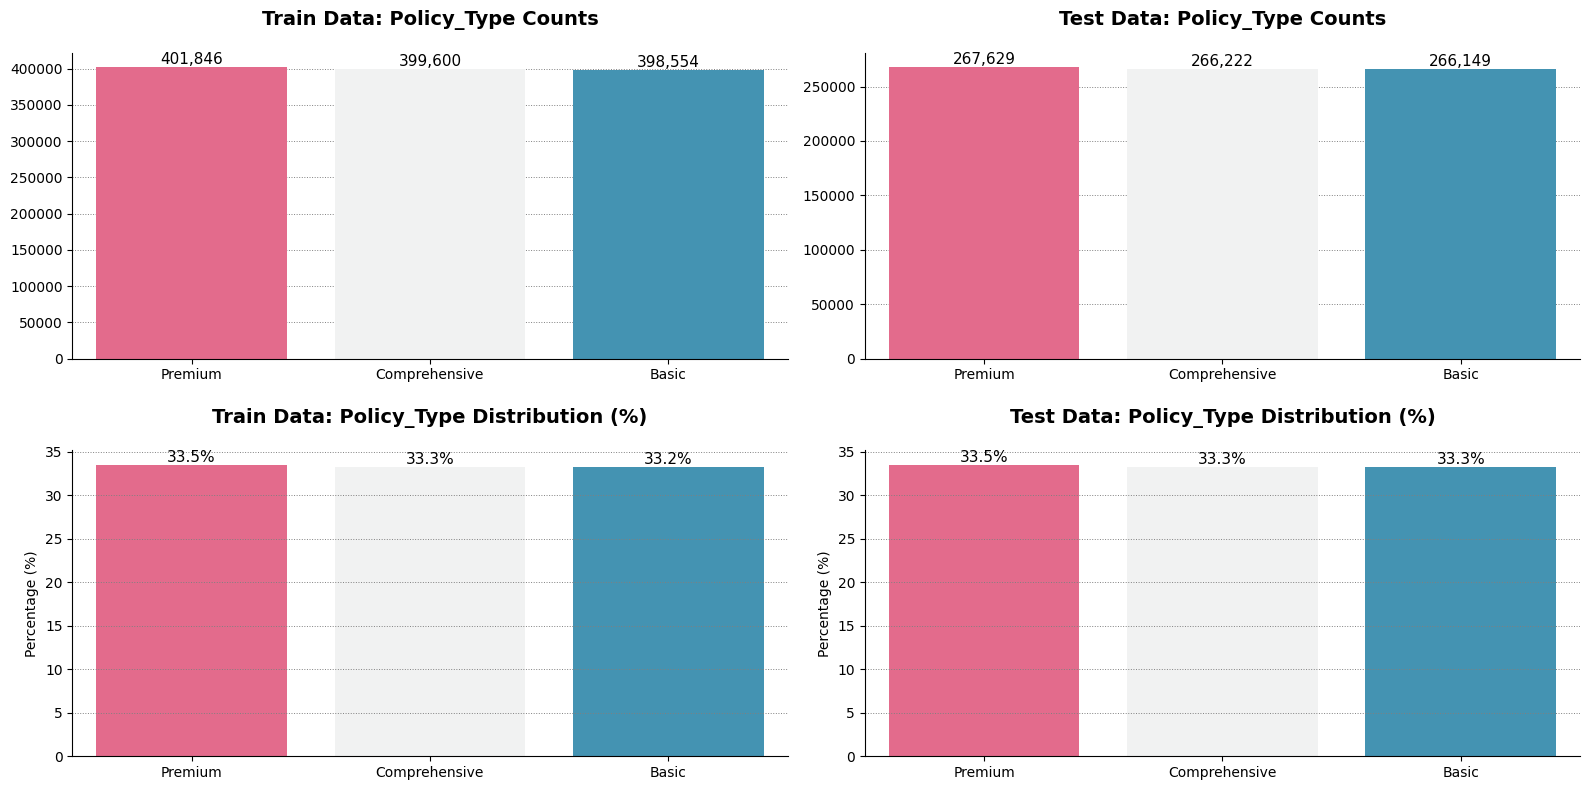

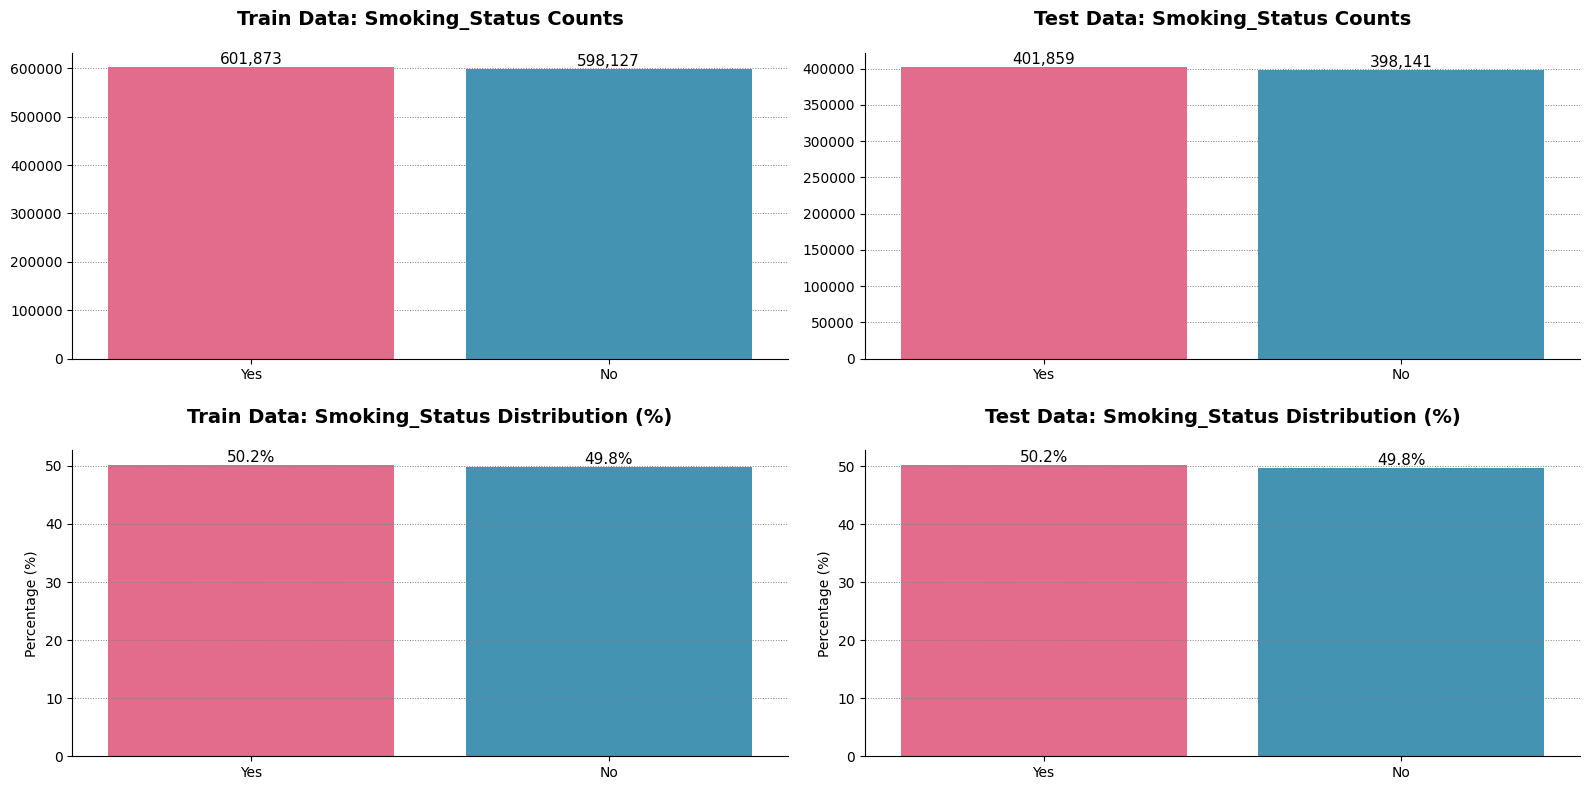

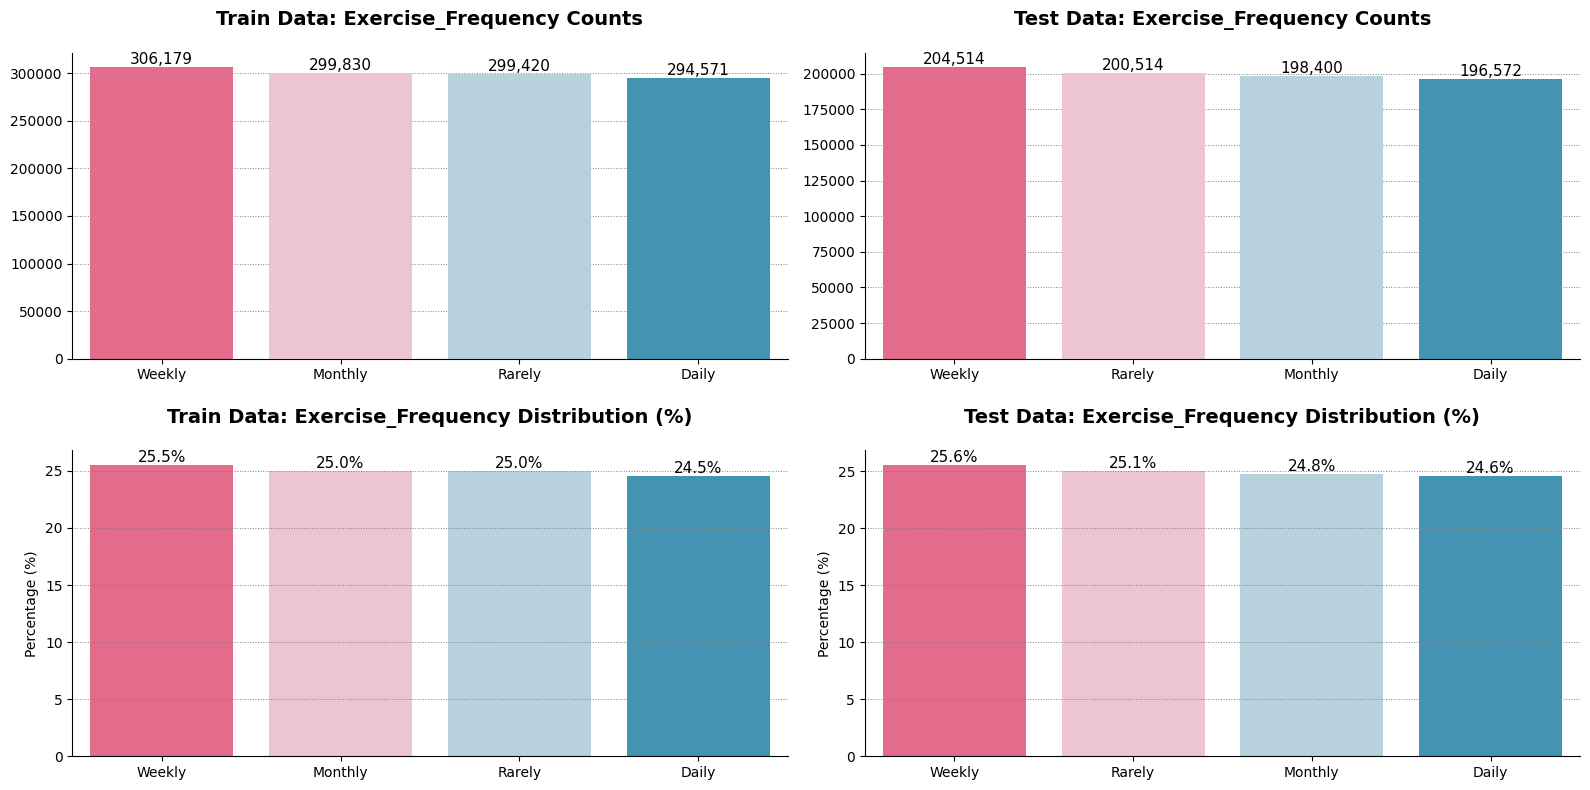

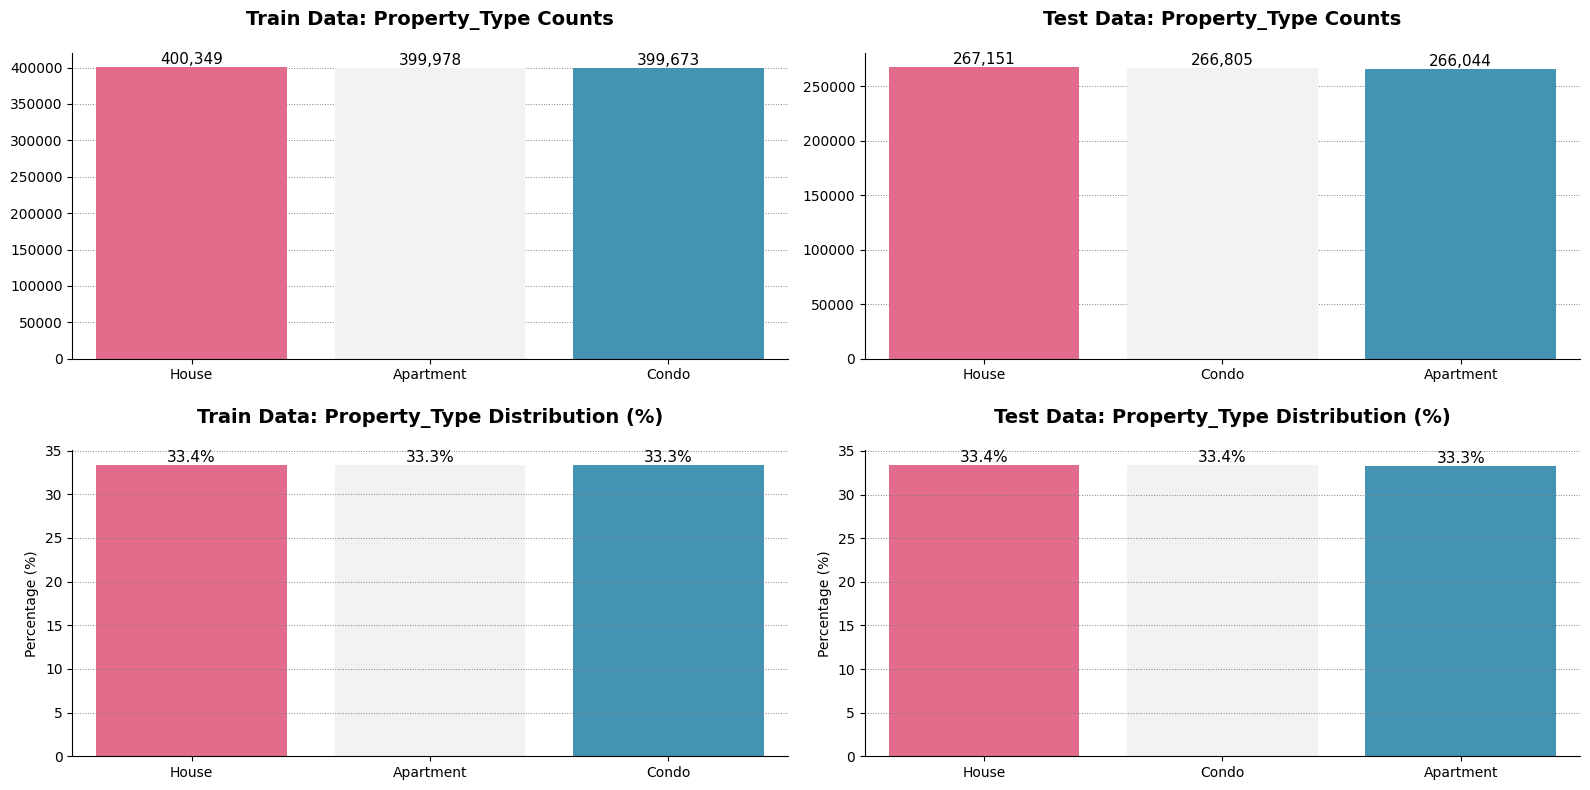

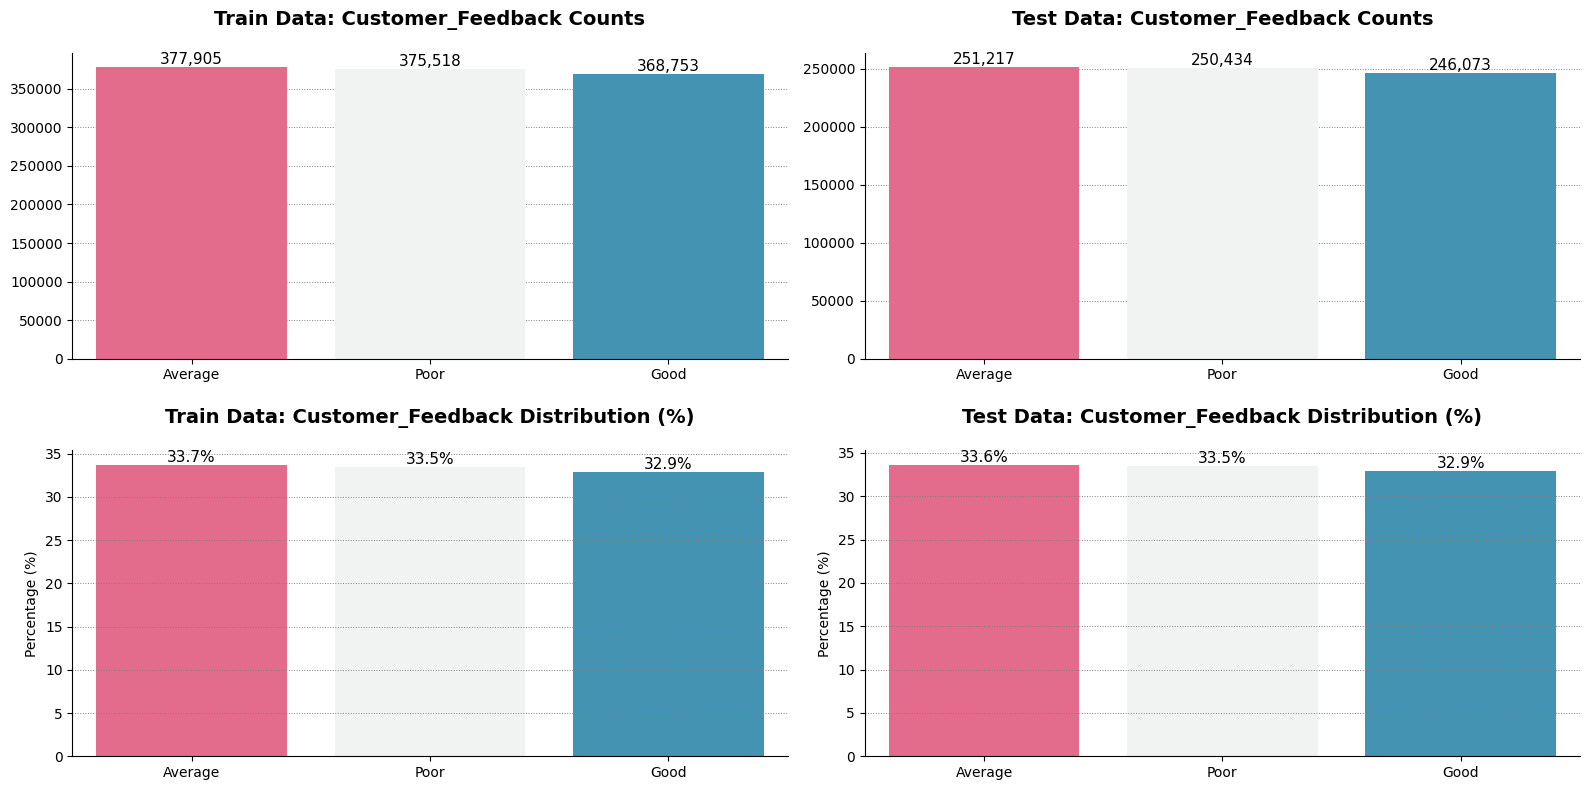

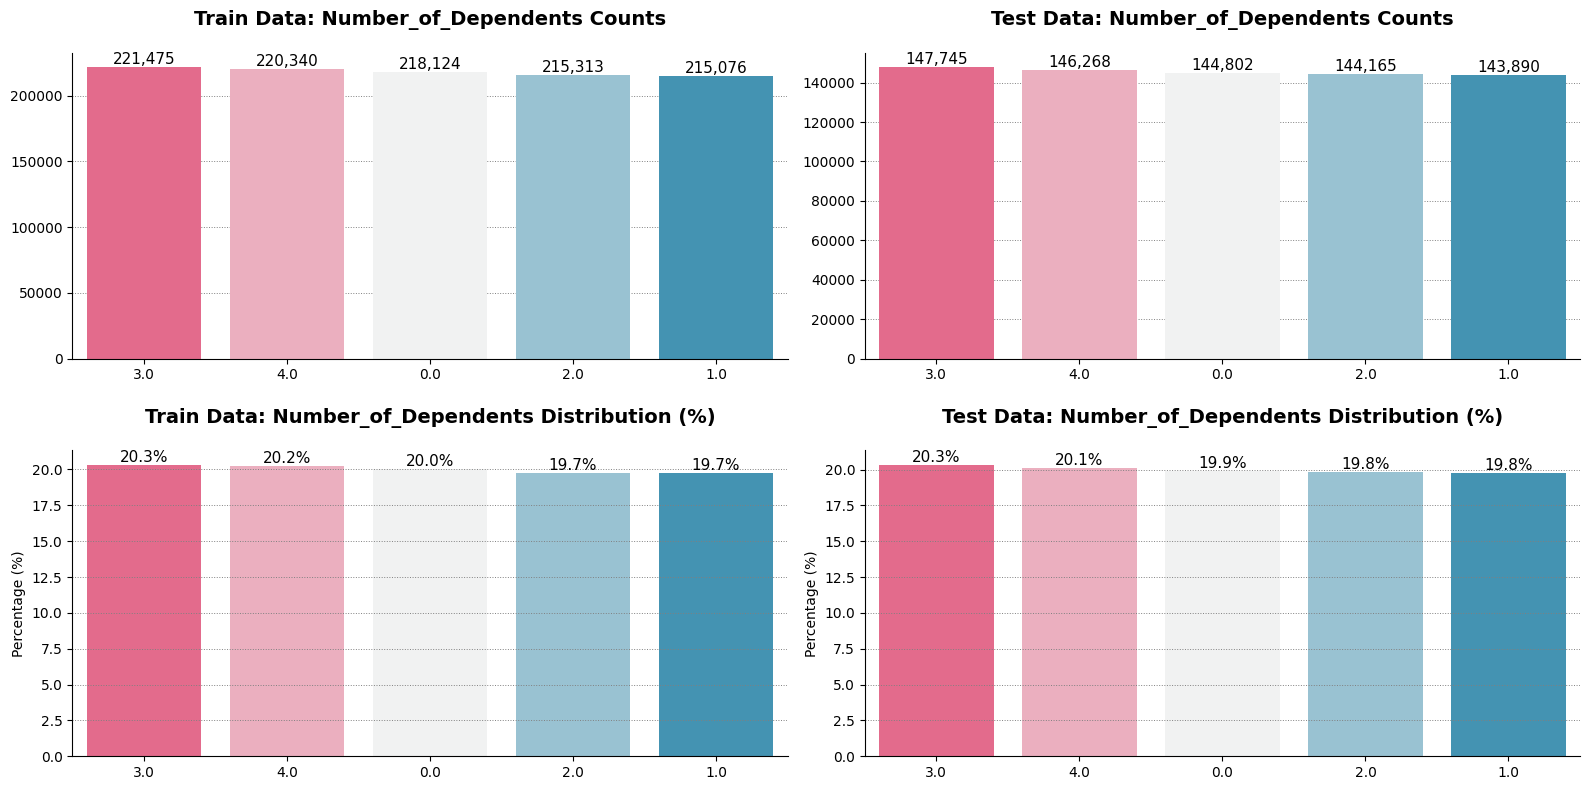

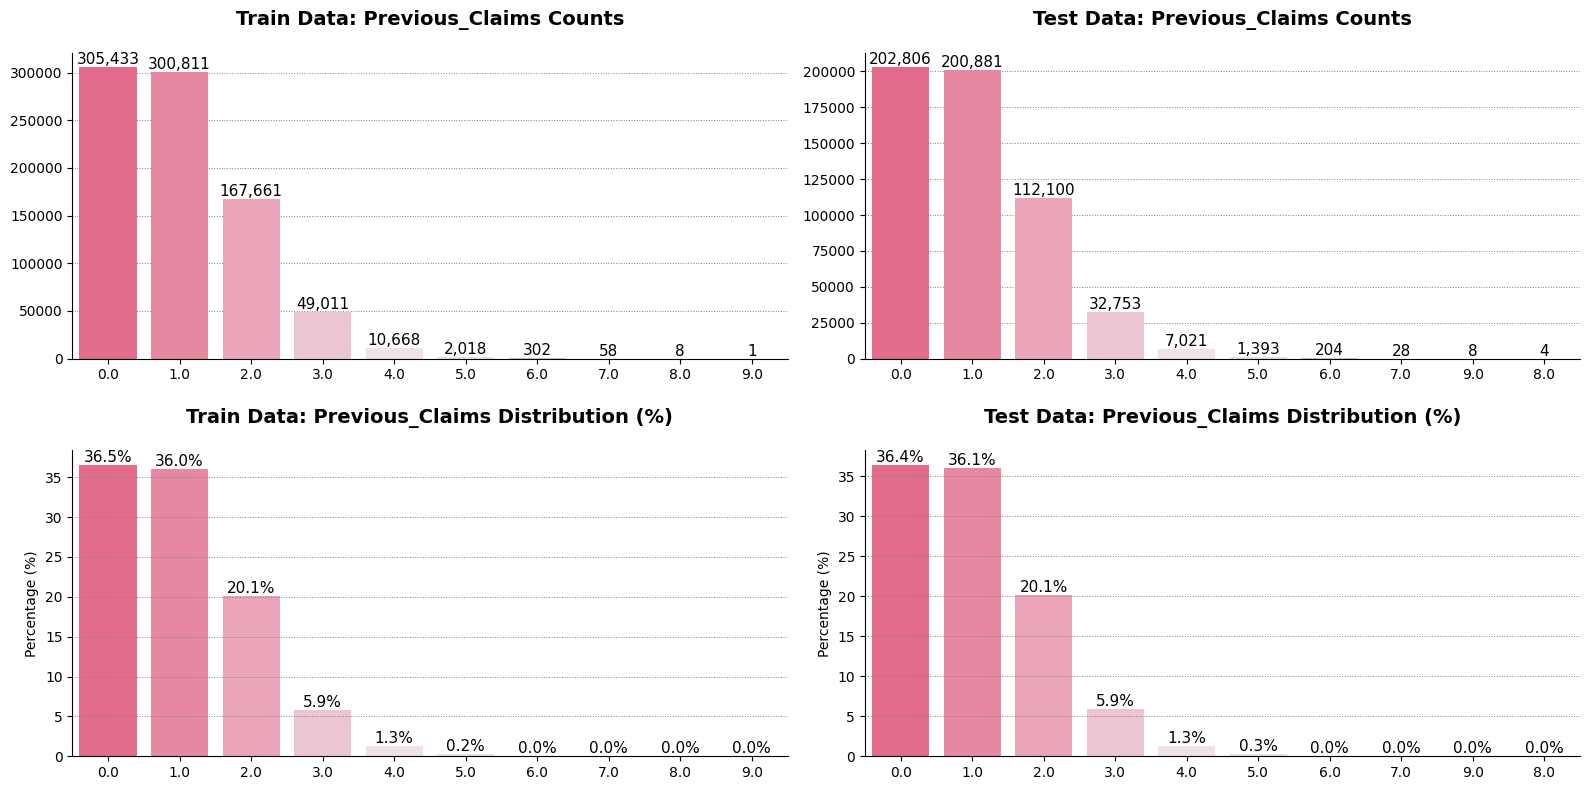

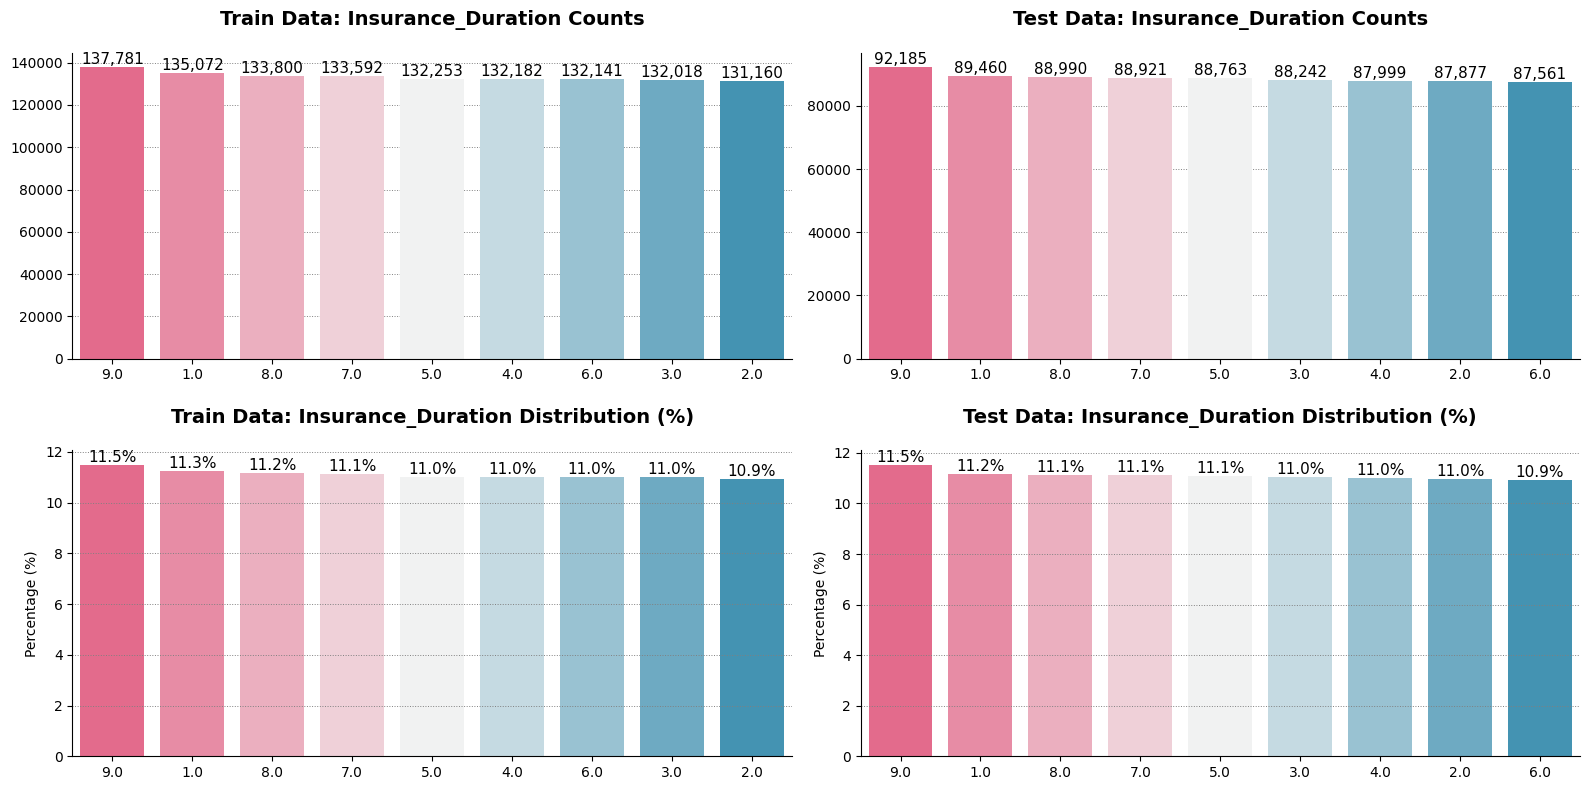

In [24]:
def plot_categorical_distribution_across_datasets(cat_features, train_data=df_train, test_data=df_test):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for feature in cat_features:
        dataset_names = ["Train", "Test"]
        datasets = [train_data, test_data]

        fig, ax = plt.subplots(2, 2, figsize=(16, 8))

        for i, (data, name) in enumerate(zip(datasets, dataset_names)):
            order = data[feature].value_counts(ascending=False).index
            sns.countplot(x=feature, data=data, ax=ax[0, i],
                          palette=color(n_colors=train_data[feature].nunique()), order=order)

            ax[0, i].set_title(f"{name} Data: {feature} Counts", fontsize=14, pad=20, weight="bold")
            ax[0, i].set_xlabel("")
            ax[0, i].set_ylabel("")
            for p in ax[0, i].patches:
                count = int(p.get_height())
                ax[0, i].annotate(f"{count:,}",
                                  (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha="center", va="bottom", fontsize=11, color="black")

            ax[0, i].set_axisbelow(True)
            ax[0, i].grid(axis="y", color="gray", linestyle=":", linewidth=0.7)
            sns.despine(left=False, bottom=False, ax=ax[0, i])

        # Barplot: Percentage
        for i, (data, name) in enumerate(zip(datasets, dataset_names)):
            percent = data[feature].value_counts(normalize=True) * 100
            percent = percent.sort_values(ascending=False).reset_index()
            percent.columns = [feature, "Percent"]

            sns.barplot(x=feature, y="Percent", data=percent, ax=ax[1, i],
                        palette=color(n_colors=train_data[feature].nunique()), order=percent[feature])

            ax[1, i].set_title(f"{name} Data: {feature} Distribution (%)", fontsize=14, pad=20, weight="bold")
            ax[1, i].set_ylabel("Percentage (%)")
            ax[1, i].set_xlabel("")
            ax[1, i].tick_params(axis="x", rotation=0)
            ax[1, i].grid(color="gray", linestyle=":", linewidth=0.7, axis="y")
            sns.despine(left=False, bottom=False, ax=ax[1, i])

            for p in ax[1, i].patches:
                percentage = p.get_height()
                ax[1, i].annotate(f"{percentage:.1f}%",
                                  (p.get_x() + p.get_width() / 2., percentage),
                                  ha="center", va="bottom", fontsize=11, color="black")

        plt.tight_layout()
        plt.subplots_adjust(hspace=0.3)
        plt.show()

plot_categorical_distribution_across_datasets(cat_features=cat_features)

In [25]:
def top_ratio(df_test = df_test, df_train = df_train, cat_features = cat_features):
    dataset_names = ["Train", "Test"]
    datasets = [df_train, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Consistency between training and testing:** <br>
- No feature distribution is greater than 99%.
- The distribution of values ​​of each feature is almost the same between train and test data, which is good for modeling and avoiding data drift.
- These are important features because they are able to help the model differentiate between different groups.

## Bivariate Analysis

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Gender' groups

 Group: Female (n = 597429)
  Statistic : 116936.664
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Male (n = 602571)
  Statistic : 116998.367
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_Amount' by 'Gender'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 179971290482.0
p-value     : 0.8934858512249965

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


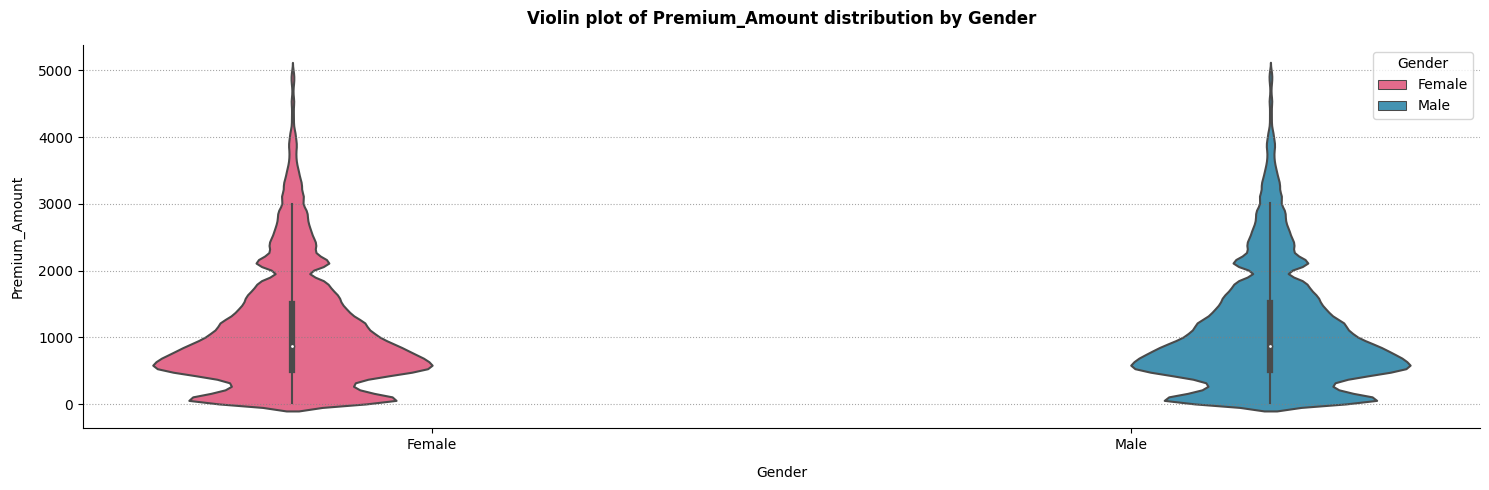

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Marital_Status' groups

 Group: Married (n = 394316)
  Statistic : 77372.811
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Divorced (n = 391764)
  Statistic : 76332.193
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Single (n = 395391)
  Statistic : 77245.139
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Marital_Status
Kruskal-Wallis H-statistic: 1.168
p-value: 0.5577635077735494

ℹ️ No significant difference found (p >= 0.05)


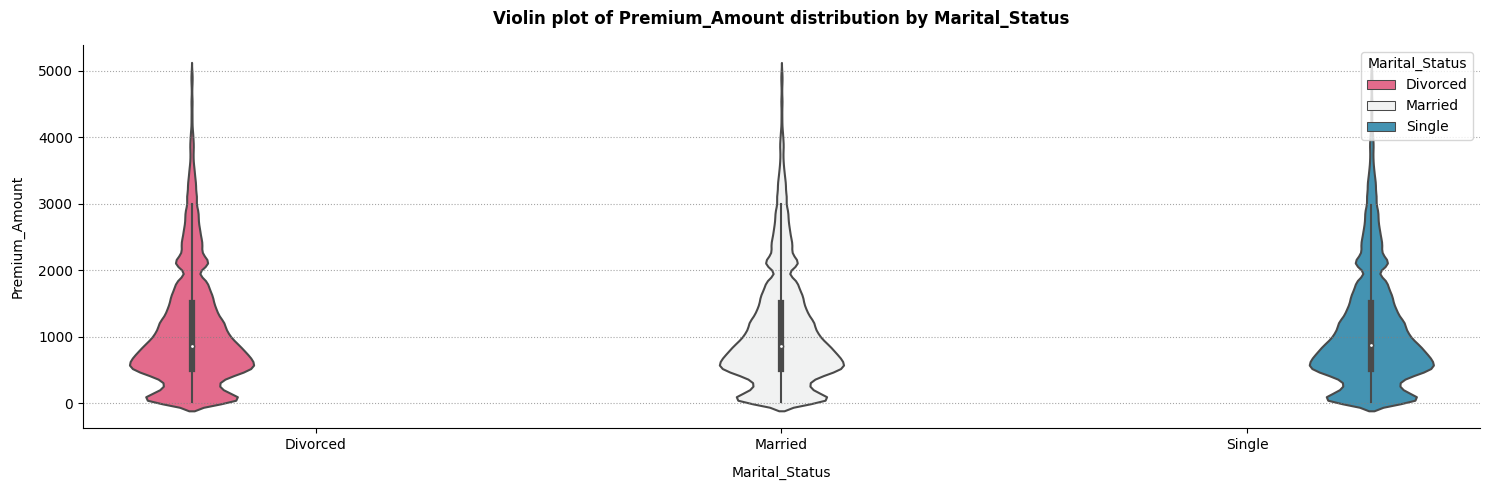

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Education_Level' groups

 Group: Bachelor's (n = 303234)
  Statistic : 59323.246
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Master's (n = 303818)
  Statistic : 59096.248
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High School (n = 289441)
  Statistic : 55676.878
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: PhD (n = 303507)
  Statistic : 59856.126
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Education_Level
Kruskal-Wallis H-statistic: 3.804
p-value: 0.28339037743421447

ℹ️ No significant difference found (p >= 0.05)


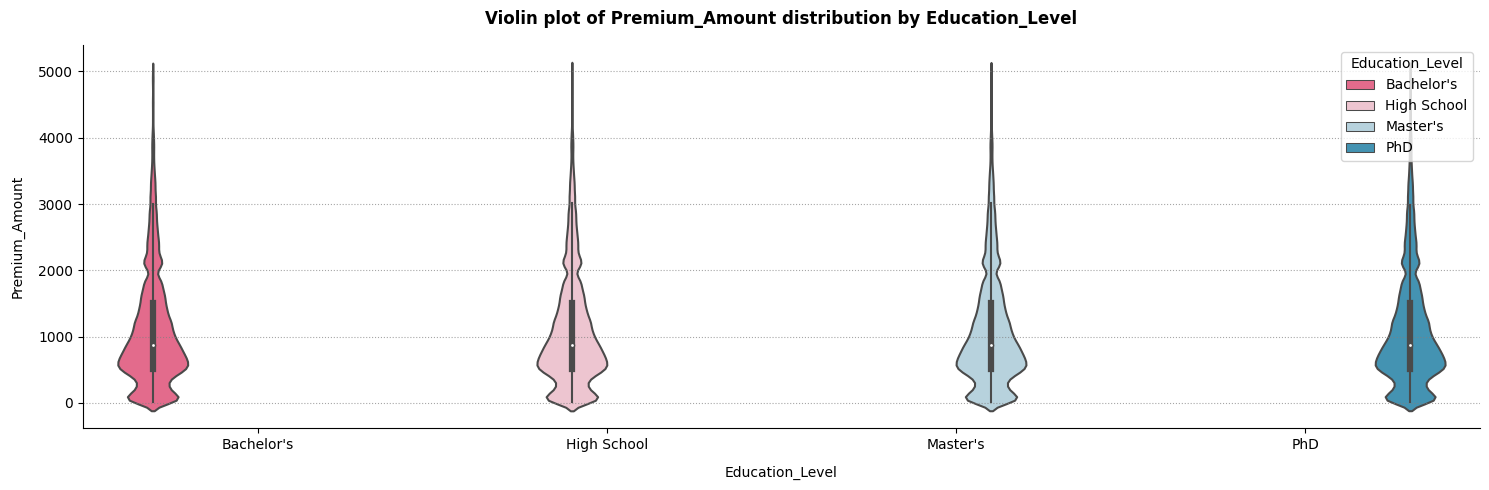

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Occupation' groups

 Group: Self-Employed (n = 282645)
  Statistic : 54721.910
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Employed (n = 282750)
  Statistic : 54134.878
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Unemployed (n = 276530)
  Statistic : 54002.978
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Occupation
Kruskal-Wallis H-statistic: 6.277
p-value: 0.04335716956571707
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
               Employed  Self-Employed  Unemployed
Employed       1.000000       0.110253    0.075483
Self-Employed  0.110253       1.000000    1.000000
Unemployed     0.075483       1.000000    1.000000


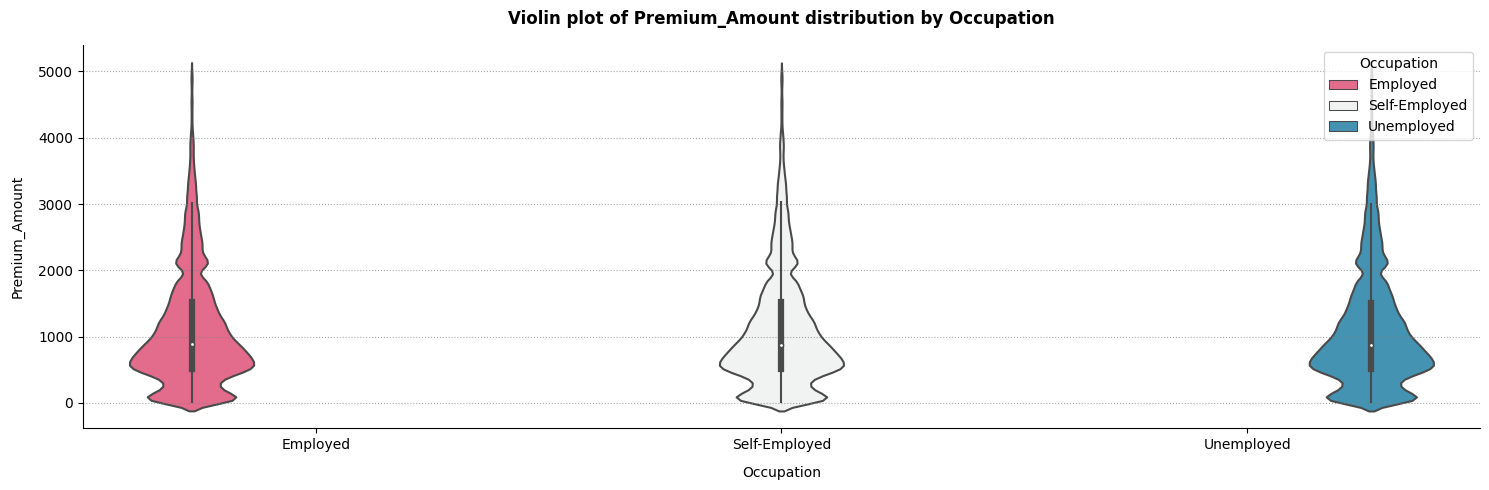

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Location' groups

 Group: Urban (n = 397511)
  Statistic : 78045.902
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Rural (n = 400947)
  Statistic : 78298.010
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Suburban (n = 401542)
  Statistic : 77598.207
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Location
Kruskal-Wallis H-statistic: 3.430
p-value: 0.17999002710892853

ℹ️ No significant difference found (p >= 0.05)


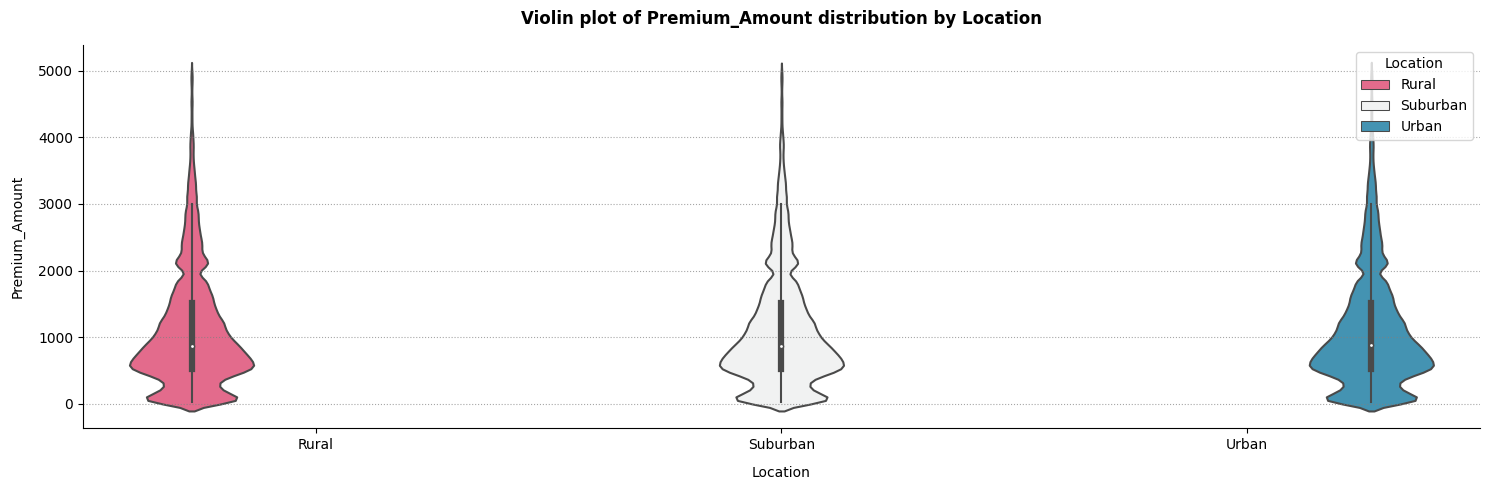

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Policy_Type' groups

 Group: Premium (n = 401846)
  Statistic : 78994.035
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Comprehensive (n = 399600)
  Statistic : 77787.994
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Basic (n = 398554)
  Statistic : 77158.434
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Policy_Type
Kruskal-Wallis H-statistic: 1.907
p-value: 0.38530179247027485

ℹ️ No significant difference found (p >= 0.05)


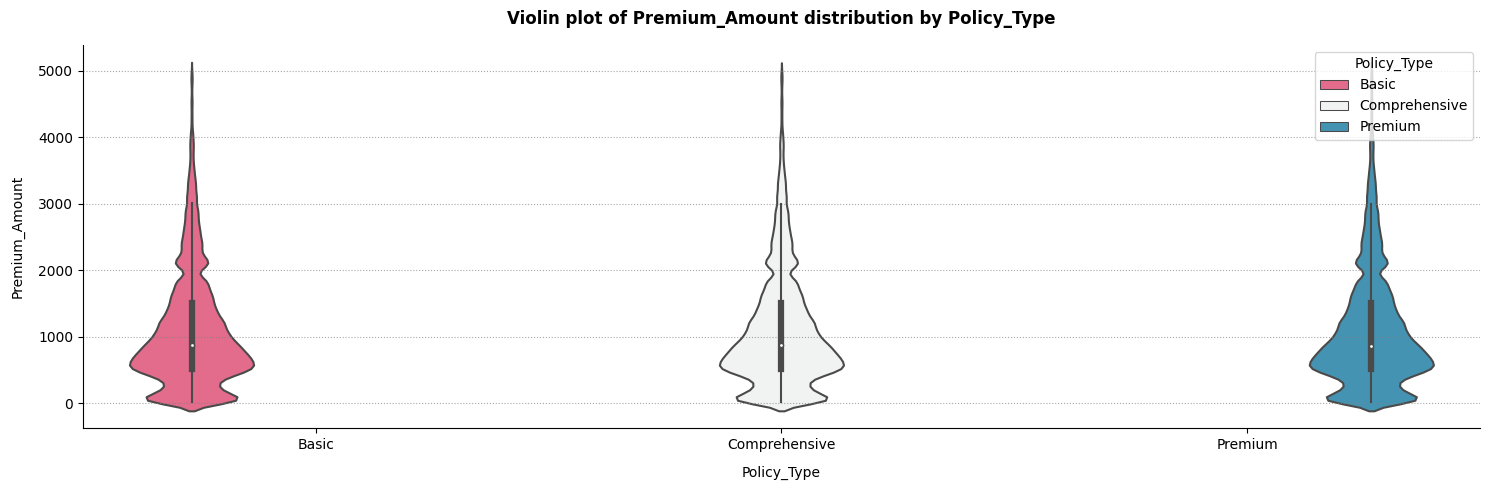

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Smoking_Status' groups

 Group: No (n = 598127)
  Statistic : 116159.442
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Yes (n = 601873)
  Statistic : 117775.583
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_Amount' by 'Smoking_Status'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 179920076580.0
p-value     : 0.6803462465593562

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


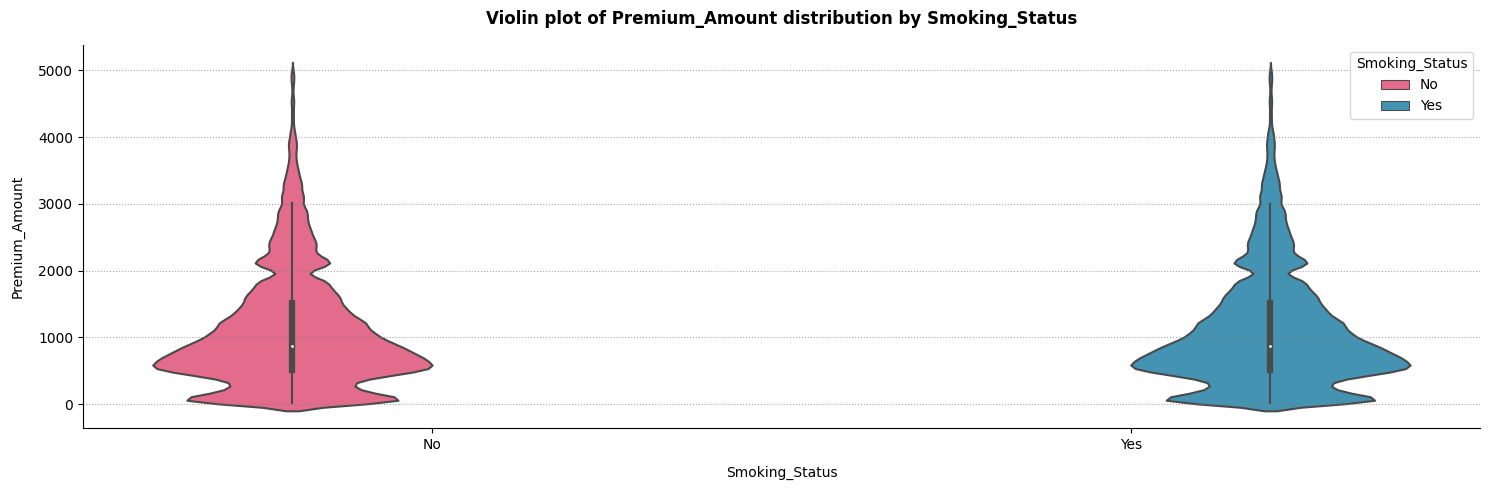

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Exercise_Frequency' groups

 Group: Weekly (n = 306179)
  Statistic : 60159.303
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Monthly (n = 299830)
  Statistic : 58723.200
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Daily (n = 294571)
  Statistic : 56573.534
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Rarely (n = 299420)
  Statistic : 58483.913
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Exercise_Frequency
Kruskal-Wallis H-statistic: 2.756
p-value: 0.4307232862526176

ℹ️ No significant difference found (p >= 0.05)


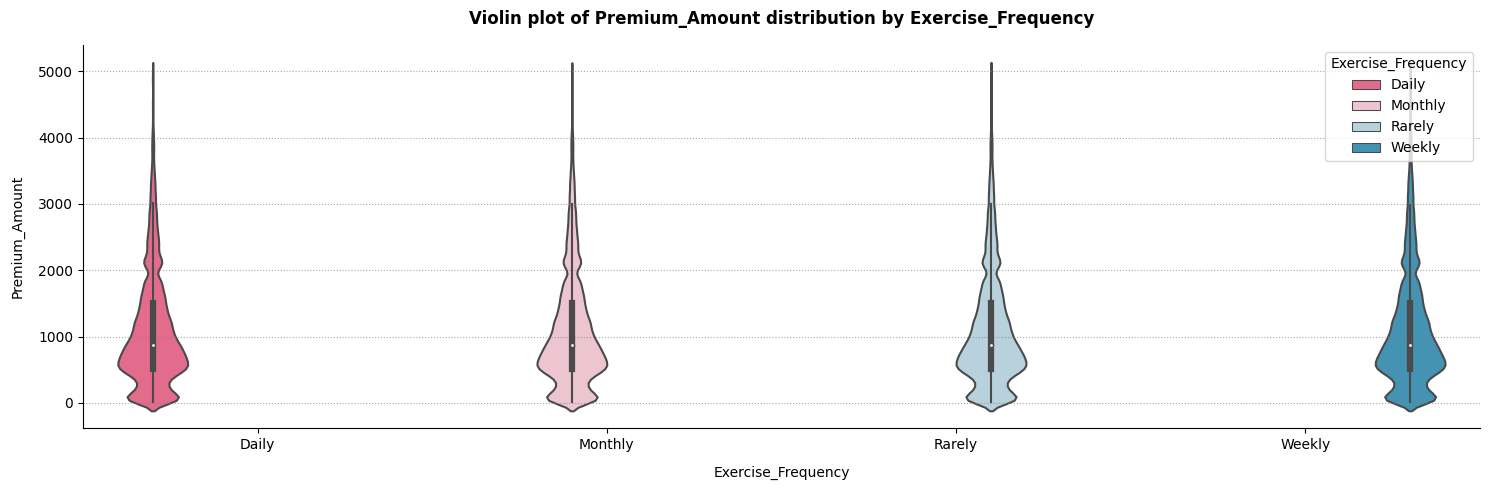

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Property_Type' groups

 Group: House (n = 400349)
  Statistic : 78409.295
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Apartment (n = 399978)
  Statistic : 78164.931
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Condo (n = 399673)
  Statistic : 77361.483
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Property_Type
Kruskal-Wallis H-statistic: 1.738
p-value: 0.41927803353272053

ℹ️ No significant difference found (p >= 0.05)


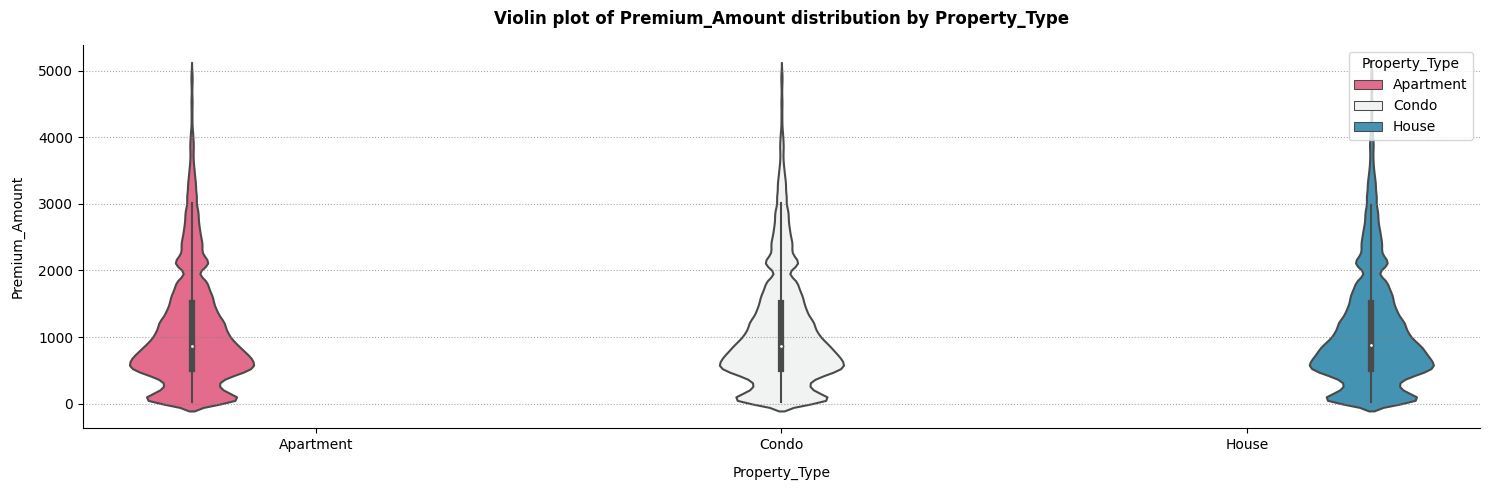

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Customer_Feedback' groups

 Group: Poor (n = 375518)
  Statistic : 74444.393
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Average (n = 377905)
  Statistic : 74425.997
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Good (n = 368753)
  Statistic : 72947.567
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Customer_Feedback
Kruskal-Wallis H-statistic: 4.409
p-value: 0.1102798065687607

ℹ️ No significant difference found (p >= 0.05)


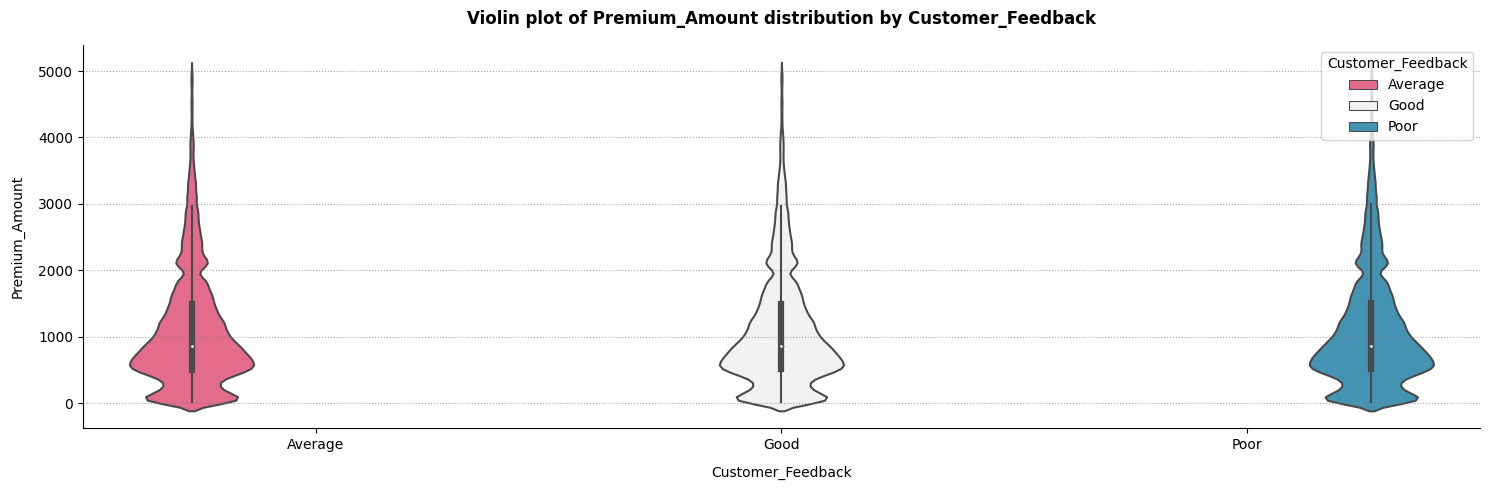

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Number_of_Dependents' groups

 Group: 1.0 (n = 215076)
  Statistic : 41964.544
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3.0 (n = 221475)
  Statistic : 42820.891
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2.0 (n = 215313)
  Statistic : 41943.316
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0.0 (n = 218124)
  Statistic : 43369.468
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 4.0 (n = 220340)
  Statistic : 44082.616
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Number_of_Dependents
Kruskal-Wallis H-statistic: 24.190
p-value: 7.3153511457166e-05
🟢 Significant difference found. Running Dunn'

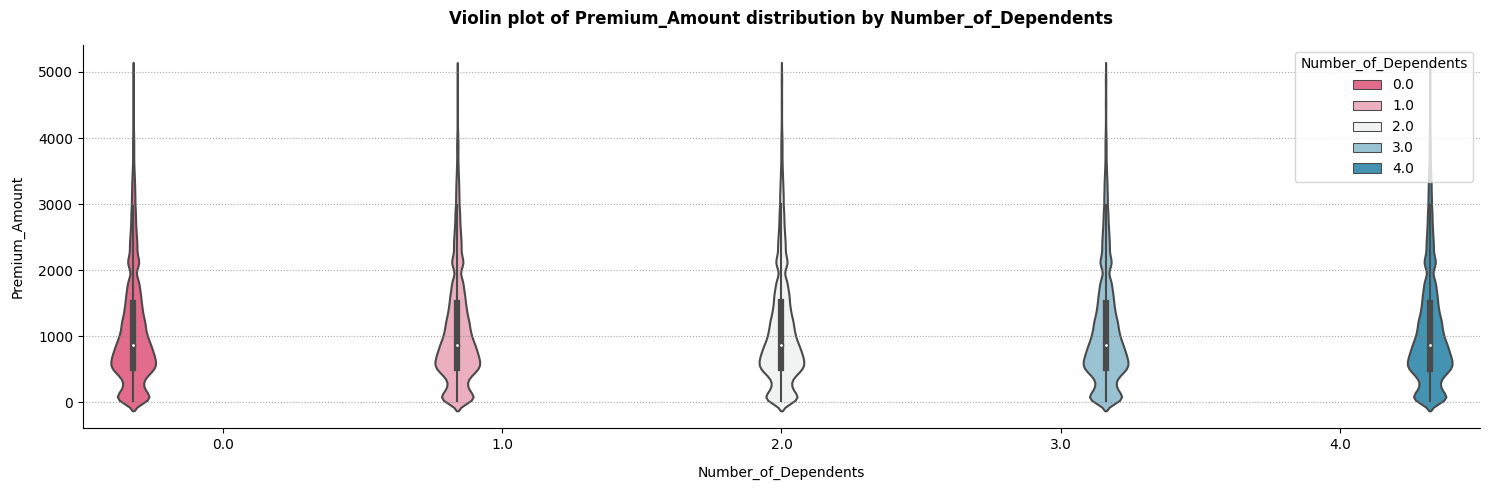

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Previous_Claims' groups

 Group: 2.0 (n = 167661)
  Statistic : 27262.339
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1.0 (n = 300811)
  Statistic : 60598.868
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0.0 (n = 305433)
  Statistic : 62533.762
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3.0 (n = 49011)
  Statistic : 7399.832
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 4.0 (n = 10668)
  Statistic : 1393.449
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 5.0 (n = 2018)
  Statistic : 300.055
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 6.0 (n = 302)
  Statistic : 48

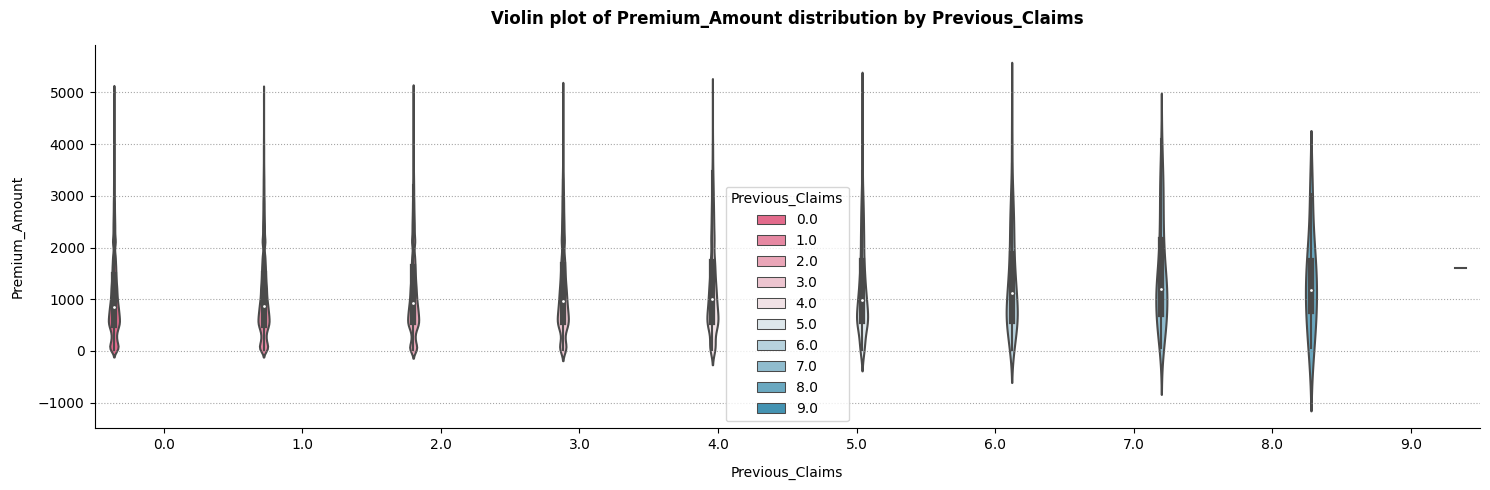

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Insurance_Duration' groups

 Group: 5.0 (n = 132253)
  Statistic : 25642.819
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2.0 (n = 131160)
  Statistic : 24948.017
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3.0 (n = 132018)
  Statistic : 25683.122
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1.0 (n = 135072)
  Statistic : 25922.933
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 4.0 (n = 132182)
  Statistic : 26271.797
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 6.0 (n = 132141)
  Statistic : 25967.103
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 8.0 (n = 133800)
  

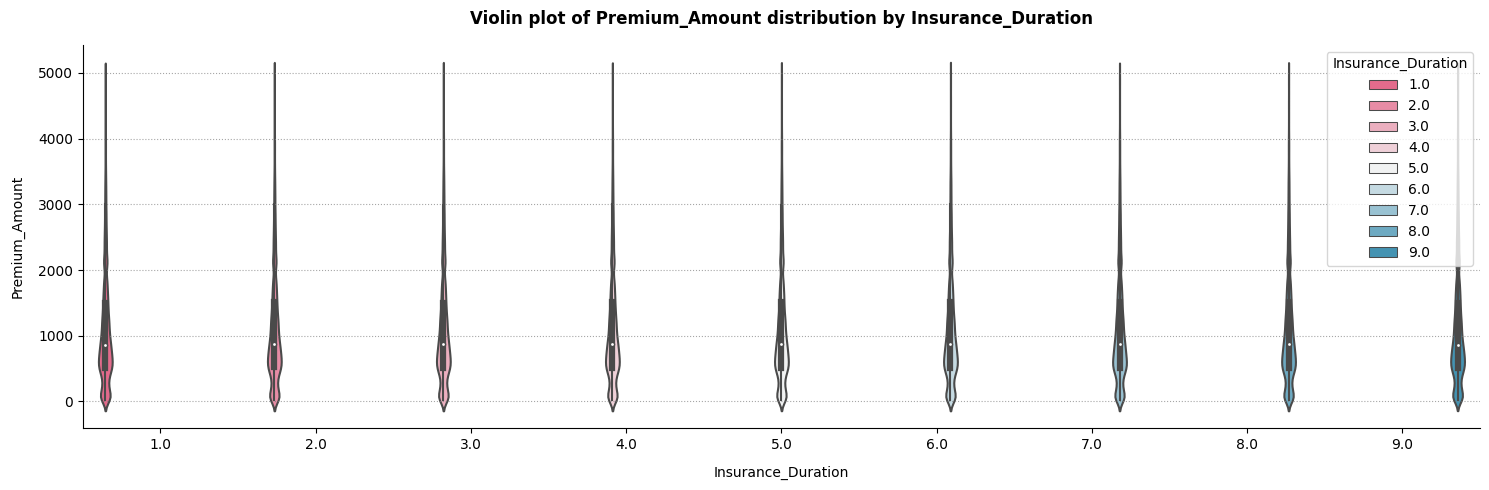

In [26]:
from IPython.core.display import HTML
def perform_statical_testing(total_categories, feature, df_train = df_train, target_feature = "Premium_Amount"):
    cal_normaltest(cat_feature=feature, num_feature=target_feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=feature, num_feature=target_feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=feature, numeric_feature=target_feature)

def plot_categorical_distribution_by_Premium_Amount(feature, df_train = df_train, target_feature = "Premium_Amount", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violin and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the grouping variable (categorical).
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = feature, as_index= False)\
    .agg (
        Count = (target_feature, "count"),
        Mean_Premium_Amount = (target_feature, "mean"),
        Median_Premium_Amount = (target_feature, "median"),
        Std_Premium_Amount = (target_feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean_Premium_Amount", ascending=False)    

    summary_data = [
        ("Total Categories", f"{df_summary_feature.shape[0]}"),
        ("Overall Target Mean", f"{df_train[target_feature].mean():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(total_categories=df_summary_feature.shape[0], 
                             feature=feature, df_train=df_train, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=feature, y=target_feature, data=df_train, hue=feature, 
                palette=color(n_colors=df_train[feature].nunique()), ax=ax)
    ax.set_title(f"Violin plot of {target_feature} distribution by {feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    # if feature in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)

    plt.tight_layout()
    plt.show()

for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of Premium Amount by {feature}</b></h2>"))
    plot_categorical_distribution_by_Premium_Amount(feature=feature)

### Insight for Categorical Features by Premium_Amount

- The output provides a comprehensive picture of the relationship between categorical variables and insurant premium amount (Premium_Amount).
- Most of the Premium_Amount distributions of each group (by categorical feature) do not follow a normal distribution base on result from **D’Agostino and Pearson Normality Test**. Therefore we cannot use **T-Test** or **ANOVA** test, instead we use **Kruskal-Wallis Test**and **Mann–Whitney U Test**.

There is **no significant relationship** between the features `Gender`, `Marital_Status`, `Education_Level`, `Location`, `Policy_Type`, `Smoking_Status`, `Exercise_Frequency`, `Property_Type`, and `Customer_Feedback` and the target variable `Premium_Amount`.

**Occupation**

The Kruskal-Wallis analysis indicates a statistically significant difference in the distribution of `Premium_Amount` across occupation groups. However, Dunn's post-hoc test did not detect any pairwise differences strong enough to remain significant after correction. This suggests that while differences exist, they are not pronounced between individual occupation groups.

**Number\_of\_Dependents**

The analysis shows that the number of dependents significantly affects the distribution of `Premium_Amount`. In particular, the group with **four dependents tends to have lower premiums** compared to those with fewer dependents (especially two or fewer). The feature `Number_of_Dependents` should be considered an important predictor when modeling insurance premiums.

**Previous\_Claims**

The number of previous claims is a key factor influencing `Premium_Amount`. There is a clear distinction among groups with **1 to 4 claims**, where the premium increases with more claims. However, from **7 to 9 claims**, the differences diminish — possibly due to a premium cap or smaller sample sizes in those groups.

**Insurance\_Duration**

Although most `Insurance_Duration` groups share similar distributions, some pairs (particularly **1 vs. 2 years** and **2 vs. 9 years**) show statistically significant differences. This suggests that insurance duration may **subtly influence** the premium amount and should be included in the modeling process.

## Multivariate Analysis (Let’s address the business question)

In [27]:
df_train_ma = df_train.copy()

### Customers & Personal Information

\| Related Features: `Age`, `Gender`, `Marital Status`, `Number of Dependents`, `Education Level` |

❓ Business Questions

#### Which age groups are paying the highest insurance premiums?

In [28]:
bins = [0, 25, 35, 45, 55, np.inf]
labels = ["<25", "25–34", "35–44", "45–54", ">55"]
df_train_ma["Age_Group"] = pd.cut(df_train_ma["Age"], bins=bins, labels=labels, right=False)

In [29]:
median_by_age_group = df_train_ma.groupby("Age_Group")["Premium_Amount"].median().reset_index()
median_by_age_group.columns = ["Age_Group", "Median_Premium"]
print(median_by_age_group)

  Age_Group  Median_Premium
0       <25           872.0
1     25–34           876.0
2     35–44           873.0
3     45–54           870.0
4       >55           870.0


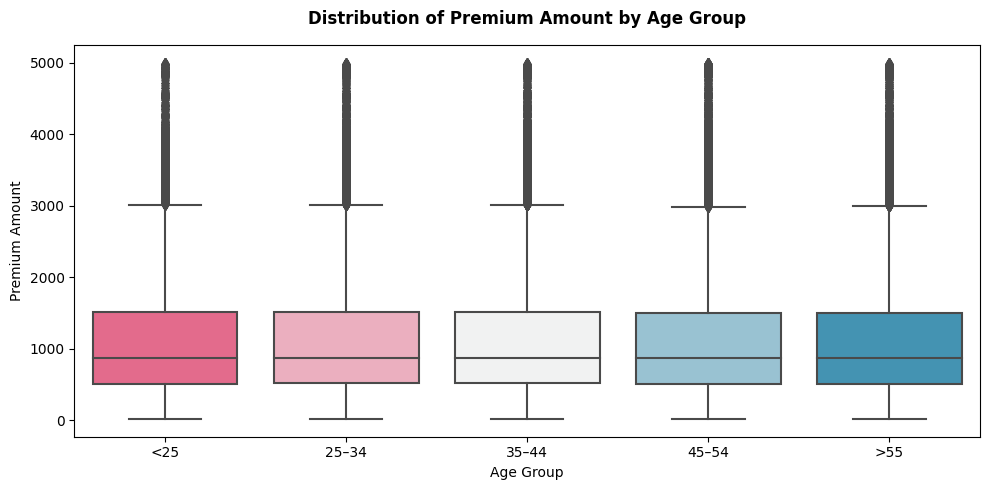

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df_train_ma, y = "Premium_Amount", x = "Age_Group",
                   palette=color(n_colors=df_train_ma["Age_Group"].nunique()))
plt.title("Distribution of Premium Amount by Age Group", pad=15, weight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Premium Amount")
plt.tight_layout()
plt.show()

**Answer:**

***The 25–34 age group is paying the highest insurance premiums, based on the median values. However, the difference compared to other age groups is minimal.***

#### Does gender have a significant impact on premium amounts? Is there any unwanted disparity?


**Answer:**

***Based on the "Distribution of Premium Amount by Gender" in the [Bivariate Analysis](#bivariate-analysis) section, gender does not have an impact on the premium amount. There is no noticeable difference between males and females, as the median for both groups is 872.***

#### Which marital status group tends to pay lower premiums?


**Answer:**

***Based on the Distribution of Premium Amount by Marital_Status in the [Bivariate Analysis](#bivariate-analysis) section, the median premium for the Single group is 2 units higher than that of the Divorced and Married groups. However, this difference is not significant enough to be considered meaningful.***

#### Do customers with more dependents tend to choose certain policy types (Basic, Comprehensive, etc.)?


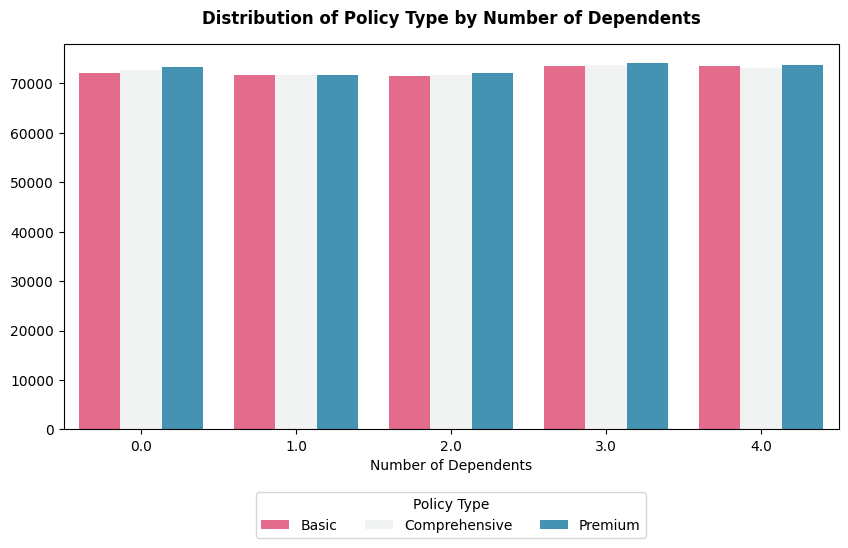

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train_ma, x="Number_of_Dependents", hue="Policy_Type",
              palette=color(n_colors=df_train_ma["Policy_Type"].nunique()))
plt.title("Distribution of Policy Type by Number of Dependents", pad=15, weight = "bold")
plt.xlabel("Number of Dependents")
plt.ylabel("")
plt.legend(title='Policy Type', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()


🔍 Chi-Square Test of Independence: 'Number_of_Dependents' vs. 'Policy_Type'
Chi-squared statistic: 7.504
Degrees of freedom: 8
p-value: 0.483385
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Number_of_Dependents' and 'Policy_Type'.

📈 Standardized Residuals:
Policy_Type           Basic  Comprehensive  Premium
Number_of_Dependents                               
0.0                   -1.24          -0.01     1.24
1.0                    0.60           0.53    -1.13
2.0                   -0.33           0.29     0.04
3.0                   -0.19           0.13     0.06
4.0                    1.16          -0.93    -0.23


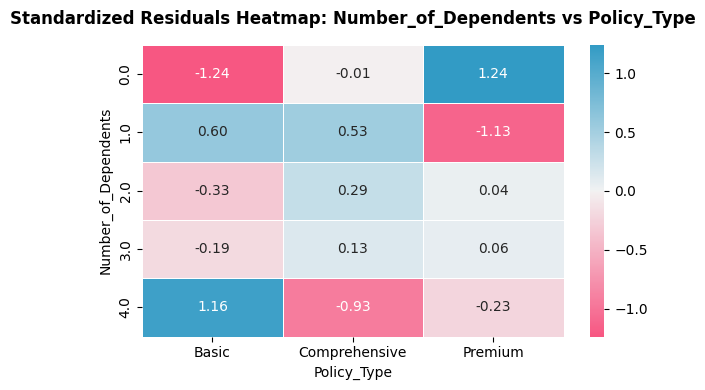

In [32]:
cal_ChiSquare(cat_feature="Number_of_Dependents", target_feature="Policy_Type", df=df_train_ma, show_residuals=True)

**Answer:**

***Based on the charts and Chi-Square Test of Independence, there is no noticeable difference in policy type selection across different numbers of dependents. Therefore, the number of dependents does not appear to influence the choice of insurance policy.***

#### Is there a correlation between education level and premium amount? Do higher-educated individuals pay more?

**Answer:**

***Based on the "Distribution of Premium Amount by Education_Level" in the [Bivariate Analysis](#bivariate-analysis) section, there is no noticeable difference in premium amounts across education groups. This indicates that having a higher or lower education level does not affect the insurance premium, as the median premium values are similar among all groups.***

### Occupation & Personal Finance

\| Related Features: `Occupation`, `Annual_Income`, `Credit_Score`, `Previous_Claims` |

❓ Business Questions

#### Which occupation groups generate the **highest insurance revenue**? Which groups are associated with a **higher claim risk**? 

In [33]:
median_by_occupation = df_train_ma.groupby("Occupation")["Annual_Income"].median().reset_index()
median_by_occupation.columns = ["Occupation", "Median_Income"]
print(median_by_occupation)

      Occupation  Median_Income
0       Employed        23961.0
1  Self-Employed        23961.0
2     Unemployed        23962.0


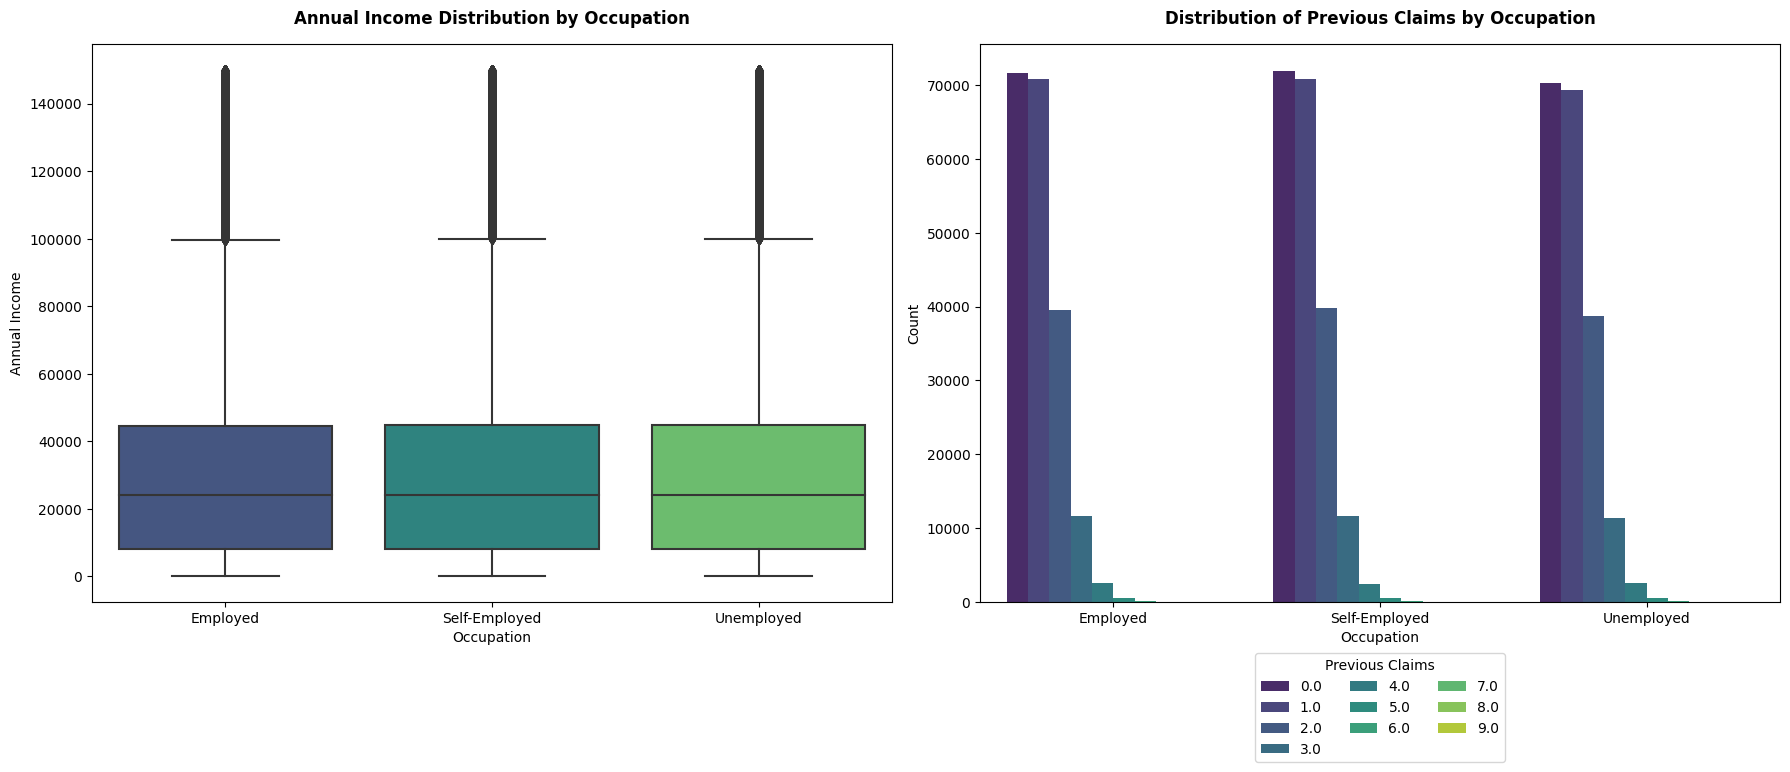

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(
    data=df_train_ma,
    y="Annual_Income",
    x="Occupation",
    ax=ax[0],
    palette=sns.color_palette("viridis", n_colors=df_train_ma["Occupation"].nunique())
)
ax[0].set_xlabel("Occupation")
ax[0].set_ylabel("Annual Income")
ax[0].set_title("Annual Income Distribution by Occupation", pad=15, weight = "bold")

sns.countplot(
    data=df_train_ma,
    x="Occupation",
    hue="Previous_Claims",
    ax=ax[1],
    palette="viridis"
)
ax[1].set_xlabel("Occupation")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of Previous Claims by Occupation", pad=15, weight = "bold")
ax[1].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout()
plt.show()


🔍 Chi-Square Test of Independence: 'Occupation' vs. 'Previous_Claims'
Chi-squared statistic: 25.313
Degrees of freedom: 16
p-value: 0.064496
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Occupation' and 'Previous_Claims'.

📈 Standardized Residuals:
Previous_Claims   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0
Occupation                                                           
Employed        -0.23  0.22 -0.32  0.60  0.17 -1.27  2.00  1.10 -1.53
Self-Employed    0.21 -0.32  0.48  0.10 -1.43  0.23 -0.87 -0.98 -0.88
Unemployed       0.02  0.10 -0.17 -0.72  1.27  1.05 -1.14 -0.12  2.44


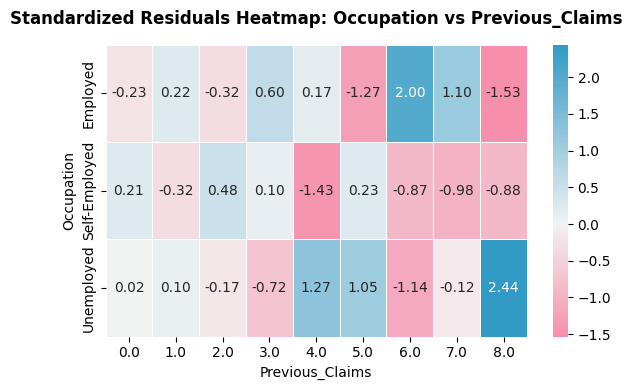

In [35]:
cal_ChiSquare(cat_feature="Occupation", target_feature="Previous_Claims", df=df_train_ma, show_residuals=True)

**Answer:**

***There is no significant difference in insurance revenue (Annual_Income) across occupation groups.***

***Although there is no overall association between occupation and claims, the data suggests that the **Employed** group (at claims level 6) and the **Unemployed** group (at claims level 8) exhibit higher-than-expected claim frequencies — indicating that these groups may carry elevated claim risks.***

#### How does **annual income** influence the choice of insurance policy type?

In [36]:
median_by_policy_type = df_train_ma.groupby("Policy_Type")["Annual_Income"].median().reset_index()
median_by_policy_type.columns = ["Policy_Type", "Median_Income"]
print(median_by_policy_type)

     Policy_Type  Median_Income
0          Basic        23897.0
1  Comprehensive        23891.0
2        Premium        23981.0


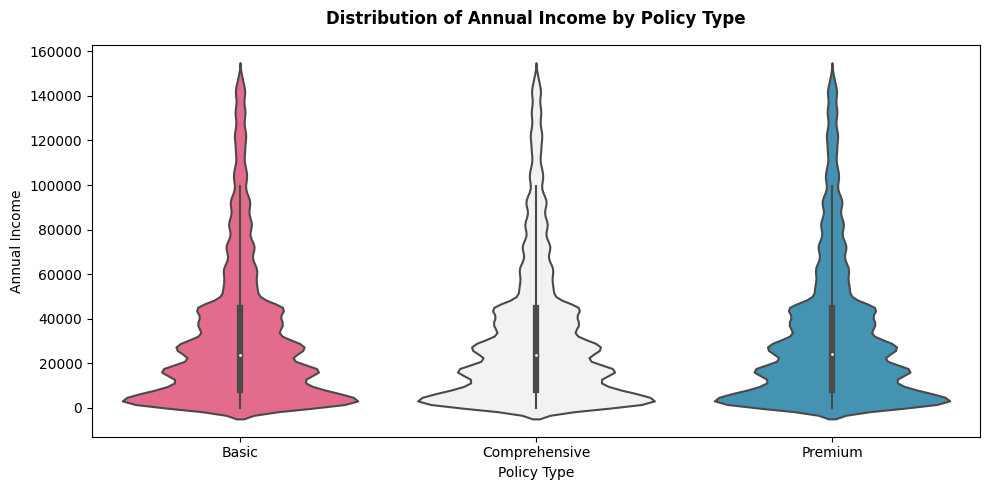

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.violinplot(data=df_train_ma, y = "Annual_Income", x = "Policy_Type",
                   palette=color(n_colors=df_train_ma["Policy_Type"].nunique()))
plt.title("Distribution of Annual Income by Policy Type", pad=15, weight = "bold")
plt.xlabel("Policy Type")
plt.ylabel("Annual Income")
plt.tight_layout()
plt.show()

In [38]:
perform_statical_testing(total_categories=3, feature="Policy_Type", df_train=df_train_ma, target_feature="Annual_Income")

🔎 D’Agostino and Pearson Normality Test for 'Annual_Income' across 'Policy_Type' groups

 Group: Premium (n = 386621)
  Statistic : 94068.634
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Comprehensive (n = 384657)
  Statistic : 93807.576
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Basic (n = 383773)
  Statistic : 93472.278
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Annual_Income ~ Policy_Type
Kruskal-Wallis H-statistic: 3.353
p-value: 0.18700395743693182

ℹ️ No significant difference found (p >= 0.05)


**Answer:**

***There is no significant difference in annual income across policy type groups. In other words, annual income does not influence the choice of insurance policy.***

#### Is a **low credit score** associated with **higher premiums** or a greater number of insurance claims?

In [39]:
df_train_ma["Credit_Score_Group"] = pd.qcut(df_train_ma["Credit_Score"], q=4, labels=["Low", "Medium", "High", "Very High"])

In [40]:
median_by_credit_score_group = df_train_ma.groupby("Credit_Score_Group")["Premium_Amount"].median().reset_index()
median_by_credit_score_group.columns = ["Credit_Score_Group", "Median_Amount"]
print(median_by_credit_score_group)

  Credit_Score_Group  Median_Amount
0                Low          938.0
1             Medium          867.0
2               High          832.0
3          Very High          844.0


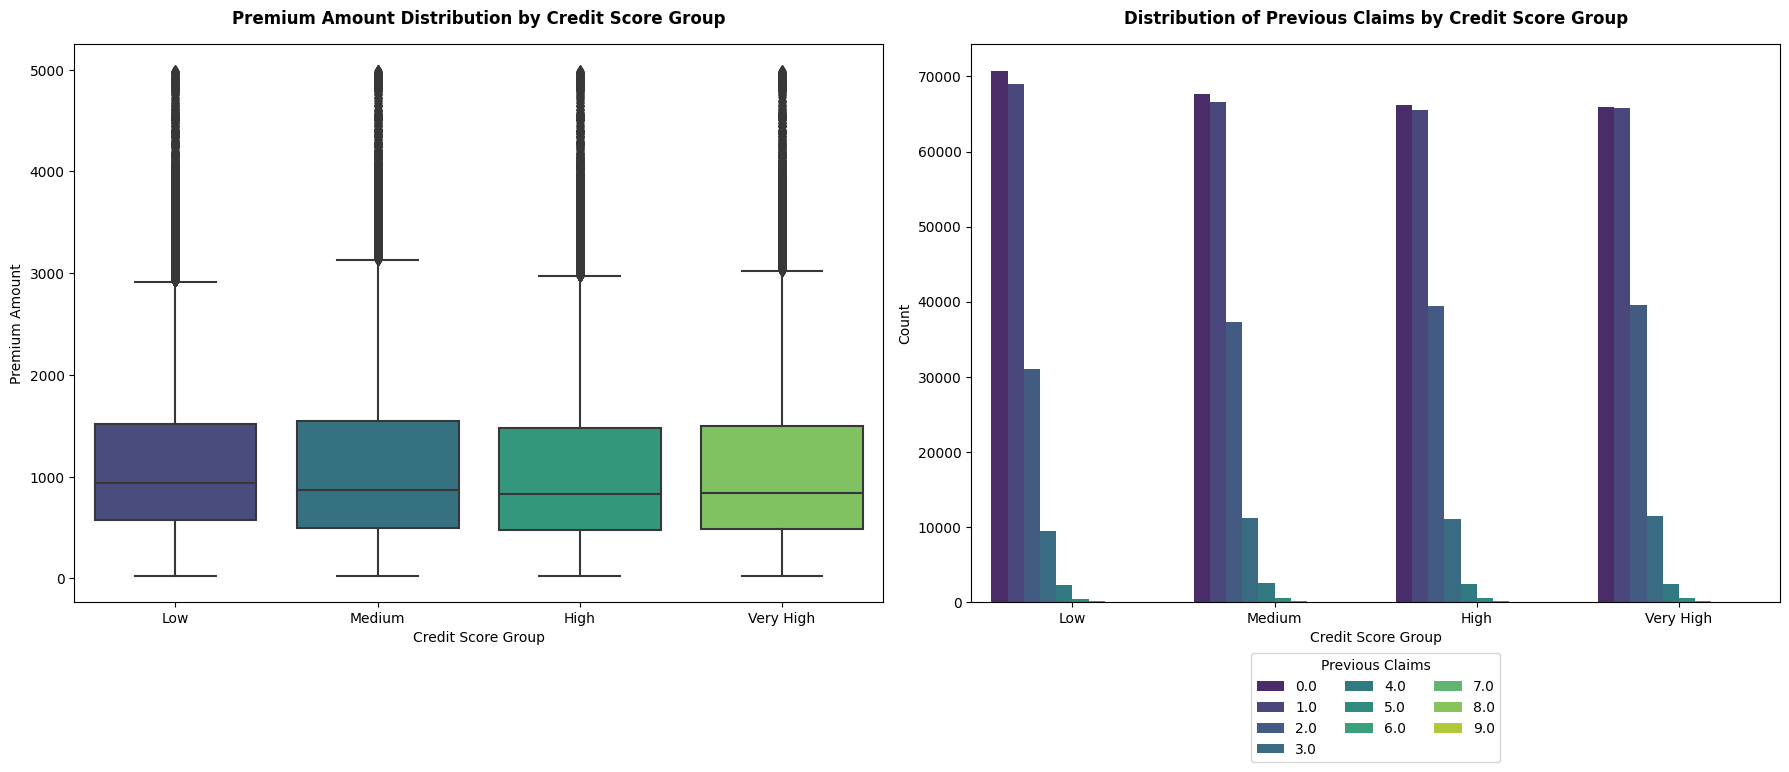

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(
    data=df_train_ma,
    y="Premium_Amount",
    x="Credit_Score_Group",
    ax=ax[0],
    palette=sns.color_palette("viridis", n_colors=df_train_ma["Credit_Score_Group"].nunique())
)
ax[0].set_xlabel("Credit Score Group")
ax[0].set_ylabel("Premium Amount")
ax[0].set_title("Premium Amount Distribution by Credit Score Group", pad=15, weight = "bold")

sns.countplot(
    data=df_train_ma,
    x="Credit_Score_Group",
    hue="Previous_Claims",
    ax=ax[1],
    palette="viridis"
)
ax[1].set_xlabel("Credit Score Group")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of Previous Claims by Credit Score Group", pad=15, weight = "bold")
ax[1].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout()
plt.show()

In [42]:
perform_statical_testing(total_categories=4, feature="Credit_Score_Group", df_train=df_train_ma, target_feature="Premium_Amount")

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Credit_Score_Group' groups

 Group: Low (n = 266534)
  Statistic : 57529.378
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High (n = 265311)
  Statistic : 53038.831
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Very High (n = 264685)
  Statistic : 50278.420
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Medium (n = 265588)
  Statistic : 48669.393
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Credit_Score_Group
Kruskal-Wallis H-statistic: 2750.080
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                     Low         Medium          High     Very High
Low         1.000000e+00  3.858648e-244  0.000000e+00  0.000000e+00


🔍 Chi-Square Test of Independence: 'Credit_Score_Group' vs. 'Previous_Claims'
Chi-squared statistic: 1856.520
Degrees of freedom: 24
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Credit_Score_Group' and 'Previous_Claims'.

📈 Standardized Residuals:
Previous_Claims       0.0    1.0    2.0    3.0   4.0   5.0   6.0   7.0   8.0
Credit_Score_Group                                                          
Low                 14.68  11.47 -28.36 -11.47 -2.46 -1.57  0.27  0.46 -0.70
Medium              -1.35  -1.92   1.52   3.56  3.24  0.96  0.76  0.69 -0.01
High                -5.70  -4.75  13.01   2.19 -0.61  0.86 -0.93  0.42 -0.00
Very High           -7.54  -4.73  13.64   5.64 -0.19 -0.25 -0.10 -1.57  0.70


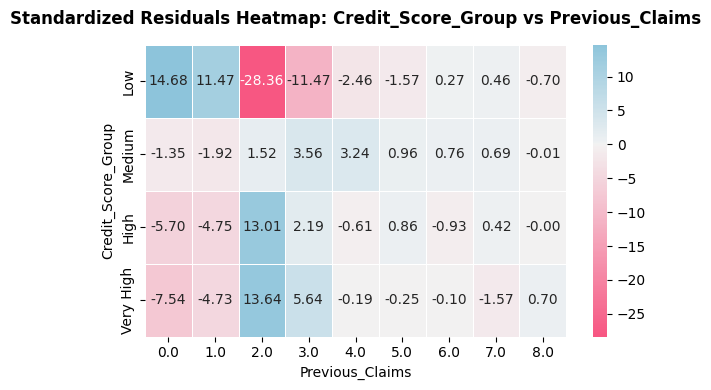

In [43]:
cal_ChiSquare(cat_feature="Credit_Score_Group", target_feature="Previous_Claims", df=df_train_ma, show_residuals=True)

**Answer:**

***Although customers with low credit scores tend to pay higher insurance premiums, they do not exhibit a higher frequency of insurance claims. In fact, they file significantly fewer claims than expected, especially at level 2.***

#### Is there a significant difference in premium amounts between customers with **multiple claims** and those who have **never claimed**?

**Answer:**

***Based on the "Distribution of Premium Amount by Previous_Claims" in the [Bivariate Analysis](#bivariate-analysis) section, it is evident that customers with more prior insurance claims tend to pay higher premium amounts. This trend is consistent and clearly reflected in both the mean and median values.***

### Vehicle & Insurance Policy

\| Related Features: `Vehicle_Age`, `Insurance_Duration`, `Policy_Type`, `Policy_Start_Date` |

❓ Business Questions

#### Do older vehicles result in higher insurance premiums, or are premiums stable regardless of vehicle age?

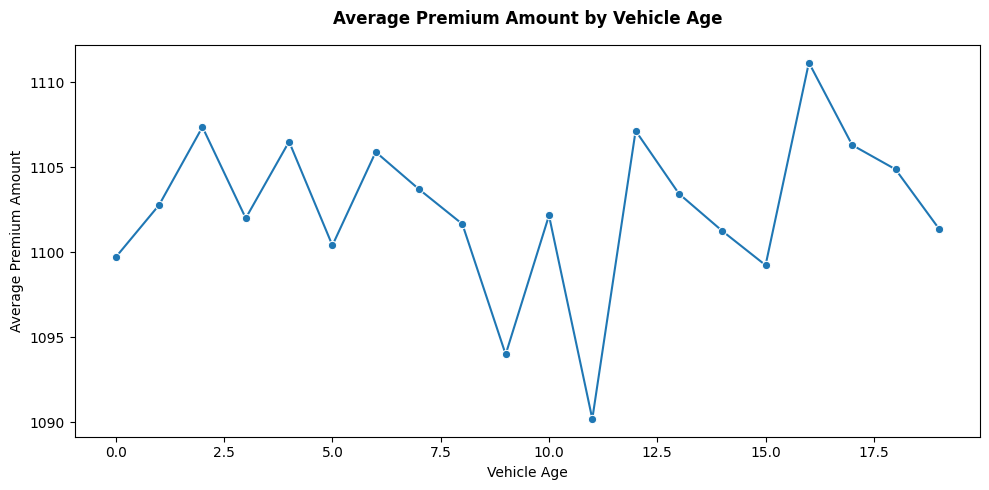

In [44]:
avg_premium_by_age = df_train_ma.groupby("Vehicle_Age")["Premium_Amount"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_premium_by_age, x="Vehicle_Age", y="Premium_Amount", marker="o")
plt.title("Average Premium Amount by Vehicle Age", pad=15, weight = "bold")
plt.xlabel("Vehicle Age")
plt.ylabel("Average Premium Amount")
plt.tight_layout()
plt.show()

**Answer:**

The line plot of average premium by vehicle age clearly shows **no consistent pattern**:

* The trend is neither steadily increasing nor flat.
* For example, vehicles aged **11 years** have **one of the lowest average premiums (\~1090)**, while **12.5-year-old vehicles** show a sudden spike — followed by a drop again.
* These irregular spikes and dips **do not support a linear or monotonic relationship**.

**Final Verdict:**

> Based on the current data, there is **no strong evidence** that older vehicles lead to higher premiums, nor that premiums are stable across vehicle ages.

#### Do **long-term customers (duration > 5 years)** receive premium discounts or benefits?

**Answer:**

>Based on the "Distribution of Premium Amount by Insurance_Duration" in the [Bivariate Analysis](#bivariate-analysis) section. <br>
>Although the Kruskal-Wallis test indicates that there are differences between some groups, the overall trend is not clear. Customers with longer durations of engagement (over 5 years) do not consistently receive lower insurance premiums compared to newer customers.

#### Should customers be encouraged to upgrade from **Basic to Premium policy plans**? (based on financial performance comparison)

In [45]:
# 1. Calculate mean, median premium, and number of customers per policy type
premium_stats = df_train_ma.groupby("Policy_Type")["Premium_Amount"].agg(
    Mean_Premium="mean",
    Median_Premium="median",
    Customer_Count="count"
)

# 2. Convert "Previous_Claims" to numeric type for valid aggregation
df_train_ma["Previous_Claims"] = pd.to_numeric(df_train_ma["Previous_Claims"], errors="coerce")

# Then compute total number of claims per policy type
claims_by_policy = df_train_ma.groupby("Policy_Type")["Previous_Claims"].sum().rename("Total_Claims")

# 3. Merge premium and claims stats into one financial summary table
financial_perf = premium_stats.merge(claims_by_policy, on="Policy_Type")

# 4. Estimate average number of claims per customer
financial_perf["Avg_Claims_per_Customer"] = financial_perf["Total_Claims"] / financial_perf["Customer_Count"]

# 5. Display the financial performance table using tabulate
from tabulate import tabulate

print(tabulate(financial_perf.reset_index(), headers="keys", tablefmt="fancy_grid", showindex=False))

╒═══════════════╤════════════════╤══════════════════╤══════════════════╤════════════════╤═══════════════════════════╕
│ Policy_Type   │   Mean_Premium │   Median_Premium │   Customer_Count │   Total_Claims │   Avg_Claims_per_Customer │
╞═══════════════╪════════════════╪══════════════════╪══════════════════╪════════════════╪═══════════════════════════╡
│ Basic         │        1103.45 │              874 │           398554 │         279514 │                  0.70132  │
├───────────────┼────────────────┼──────────────────┼──────────────────┼────────────────┼───────────────────────────┤
│ Comprehensive │        1102.61 │              873 │           399600 │         279427 │                  0.699267 │
├───────────────┼────────────────┼──────────────────┼──────────────────┼────────────────┼───────────────────────────┤
│ Premium       │        1101.58 │              870 │           401846 │         279278 │                  0.694988 │
╘═══════════════╧════════════════╧══════════════════╧═══

**Answer:**

> Customers should not be encouraged to switch from the Basic plan to the Premium plan if the goal is to optimize financial performance.
> In terms of revenue, risk level, and median premium, the higher-tier plan does not offer a clear financial advantage.

#### Are there any trends in the **policy start date**? (e.g., peak months for new policy registrations?)

In [46]:
df_train_ma["Policy_Month"] = df_train_ma["Policy_Start_Date"].dt.month
df_train_ma["Policy_Weekday"] = df_train_ma["Policy_Start_Date"].dt.day_name()

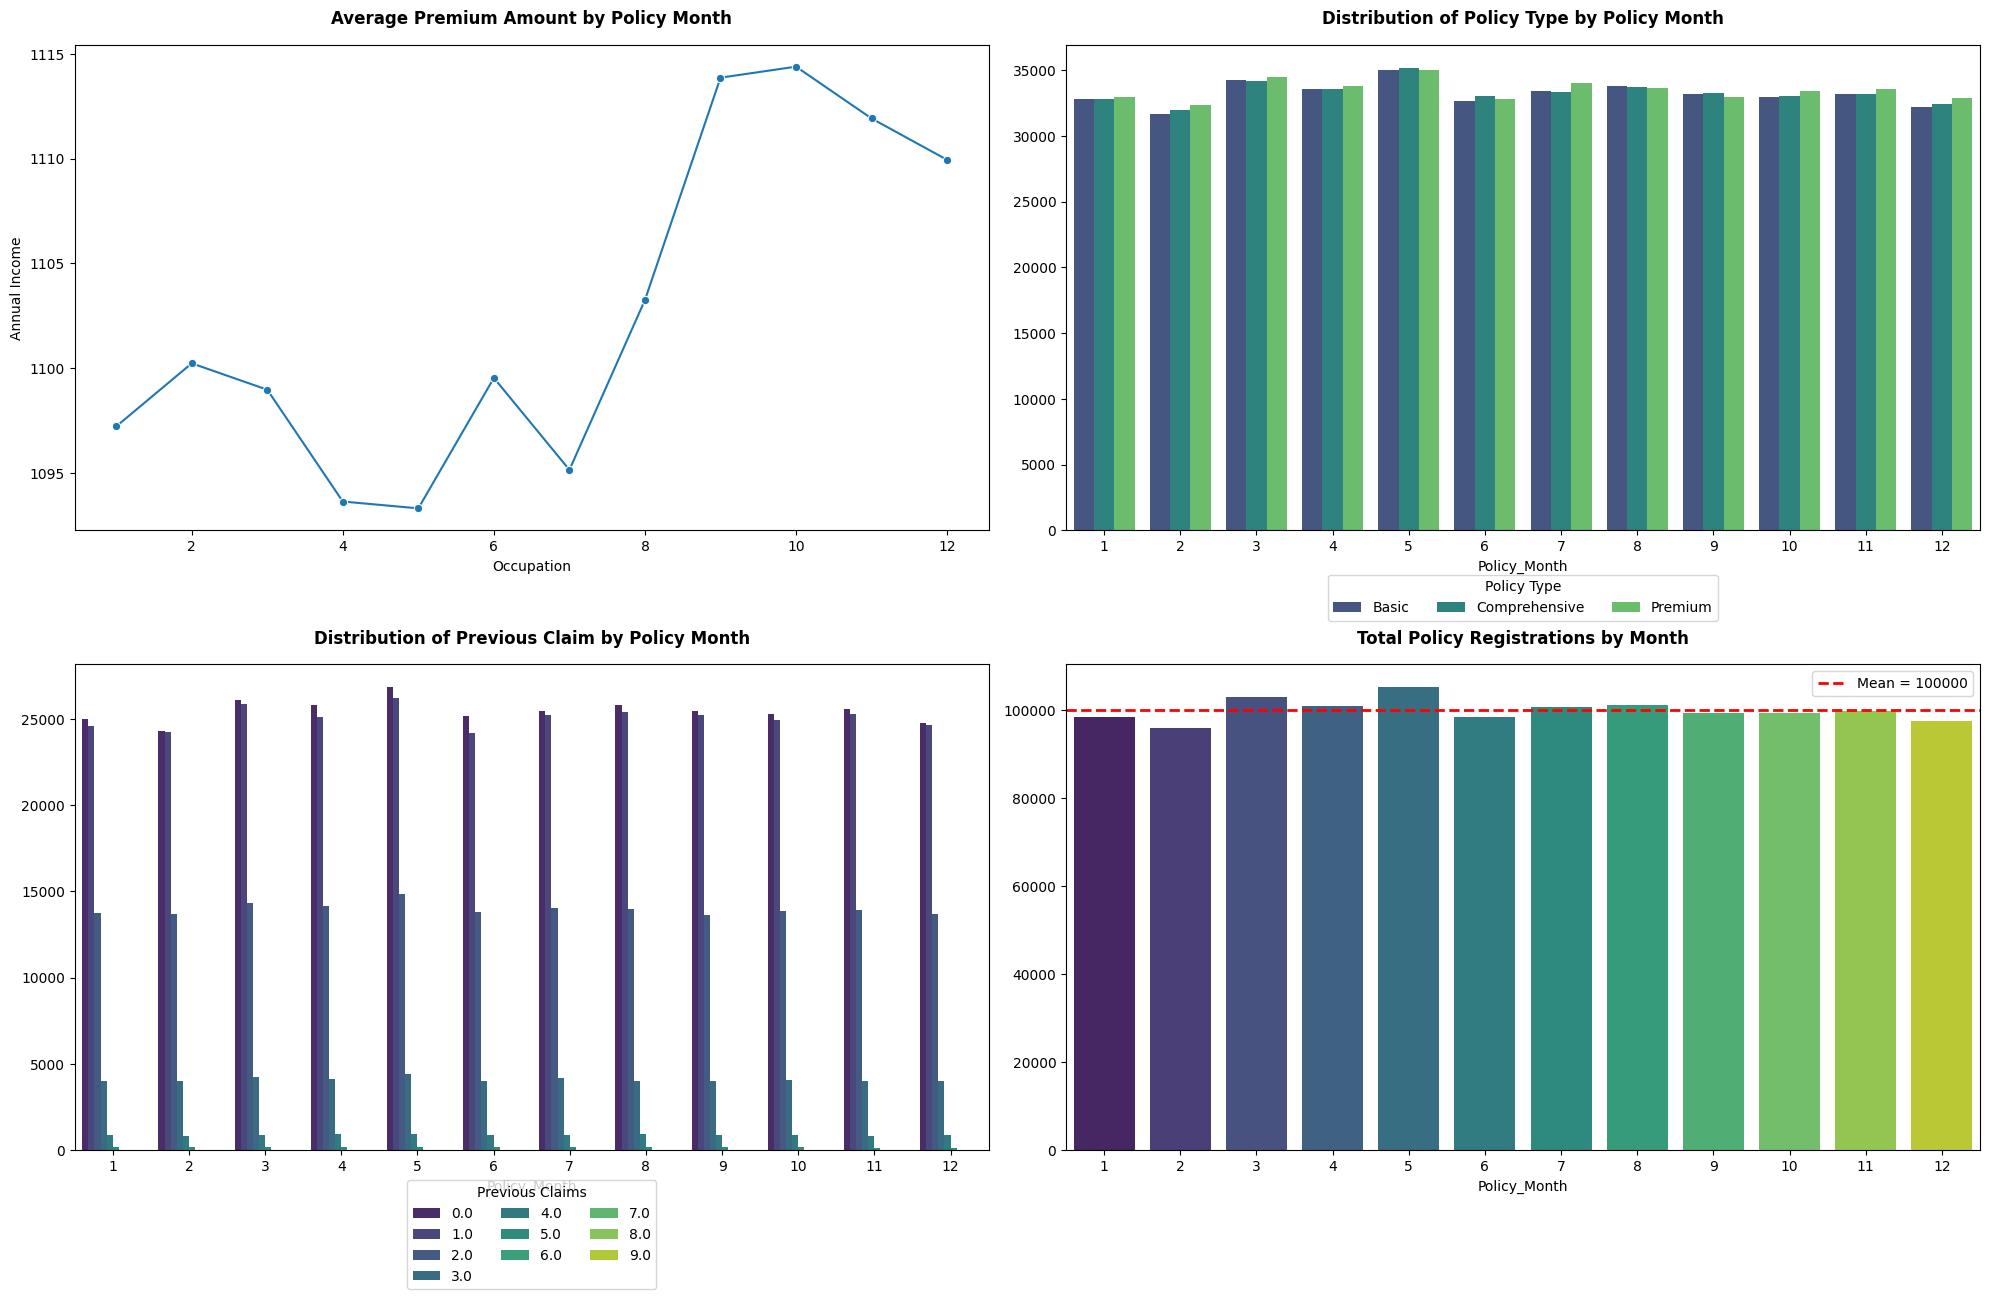

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(20, 13))
avg_premium_by_month = df_train_ma.groupby("Policy_Month")["Premium_Amount"].mean().reset_index()
sns.lineplot(
    data=avg_premium_by_month,
    y="Premium_Amount",
    x="Policy_Month",
    ax=ax[0, 0],
    marker="o"
)
ax[0, 0].set_xlabel("Occupation")
ax[0, 0].set_ylabel("Annual Income")
ax[0, 0].set_title("Average Premium Amount by Policy Month", pad=15, weight = "bold")

sns.countplot(
    data=df_train_ma,
    x="Policy_Month",
    hue="Policy_Type",
    ax=ax[0, 1],
    palette="viridis"
)
ax[0, 1].set_xlabel("Policy_Month")
ax[0, 1].set_ylabel("")
ax[0, 1].set_title("Distribution of Policy Type by Policy Month", pad=15, weight = "bold")
ax[0, 1].legend(title="Policy Type", loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)

sns.countplot(
    data=df_train_ma,
    x="Policy_Month",
    hue="Previous_Claims",
    ax=ax[1, 0],
    palette="viridis"
)
ax[1, 0].set_xlabel("Policy_Month")
ax[1, 0].set_ylabel("")
ax[1, 0].set_title("Distribution of Previous Claim by Policy Month", pad=15, weight = "bold")
ax[1, 0].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

sns.countplot(
    data=df_train_ma,
    x="Policy_Month",
    ax=ax[1, 1],
    palette="viridis"
)

monthly_counts = df_train_ma["Policy_Month"].value_counts().sort_index()
mean_count = monthly_counts.mean()

ax[1, 1].axhline(mean_count, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_count:.0f}")
ax[1, 1].legend(loc="upper right")

ax[1, 1].set_xlabel("Policy_Month")
ax[1, 1].set_ylabel("")
ax[1, 1].set_title("Total Policy Registrations by Month", pad=15, weight="bold")

plt.tight_layout()
plt.show()

**Answer:**

**1. Total Policy Registrations by Month**

(*Bottom right chart*)

* **March to May** are the peak months with policy registrations consistently **above the average** (mean ≈ 100,000, red line).
* **April and May** are especially high.
* **February, June, and December** are below average → indicating low activity.

**Insight**:

> **March to May** represent the peak season for new policy registrations.

**2. Average Premium Amount by Policy Month**

(*Top left chart*)

* Average premium increases significantly from **August to October**.
* **October** sees the highest premium (\~1115).
* Premiums are lower in the **first half of the year (January–June)**.

**Insight**:

> **Late Q3 to early Q4** brings in **higher-value contracts**, suggesting fewer but more premium-heavy policies during this period.

**3. Distribution of Policy Types by Month**

(*Top right chart*)

* The distribution of **Basic, Comprehensive, and Premium** plans remains **very consistent** across months.
* No policy type dominates a particular month.

**Insight**:

> There is **no seasonal preference** in policy types. <br>
> Pricing and packaging strategies should be based on **customer segmentation**, not seasonality.

**4. Distribution of Previous Claims by Month**

(*Bottom left chart*)

* The proportion of customers with **zero claims** remains high and stable each month.
* There are **no noticeable spikes in risk** during any specific period.

**Insight**:

> Claim behavior is **stable across the year**. <br>
> There's no evidence to support risk-based seasonal premium adjustments.

**Overall Conclusion:**

> **March to May** are high-volume months. <br>
> **Premium values peak between September and October**, indicating a shift toward higher-value policies in late Q3. <br>
> However, both **policy preferences** and **claim risk** remain stable throughout the year.

### Lifestyle & Health Behavior

\| Related Features: `Health_Score`, `Smoking_Status`, `Exercise_Frequency`, `Customer_Feedback` |

❓ Business Questions

#### Do individuals with a **low health score** tend to purchase higher-tier or lower-tier insurance plans?

In [48]:
df_train_ma["Health_Score_Group"] = pd.qcut(
    df_train_ma["Health_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

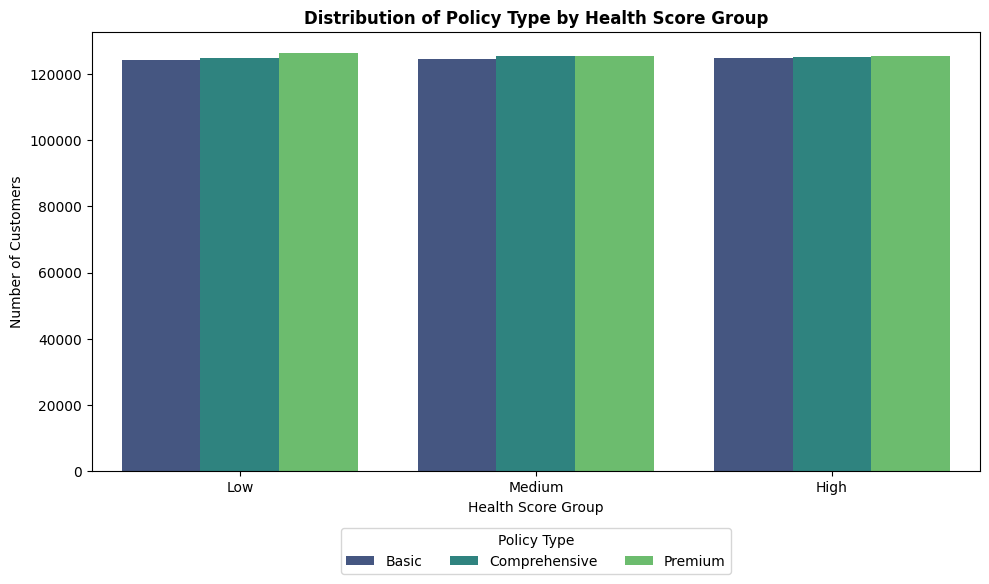

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_ma, x="Health_Score_Group", hue="Policy_Type", palette="viridis")
plt.title("Distribution of Policy Type by Health Score Group", weight="bold")
plt.xlabel("Health Score Group")
plt.ylabel("Number of Customers")
plt.legend(title="Policy Type", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.tight_layout()
plt.show()


🔍 Chi-Square Test of Independence: 'Health_Score_Group' vs. 'Policy_Type'
Chi-squared statistic: 7.548
Degrees of freedom: 4
p-value: 0.109610
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Health_Score_Group' and 'Policy_Type'.

📈 Standardized Residuals:
Policy_Type         Basic  Comprehensive  Premium
Health_Score_Group                               
Low                 -0.93          -0.74     1.66
Medium              -0.19           0.80    -0.61
High                 1.12          -0.06    -1.05


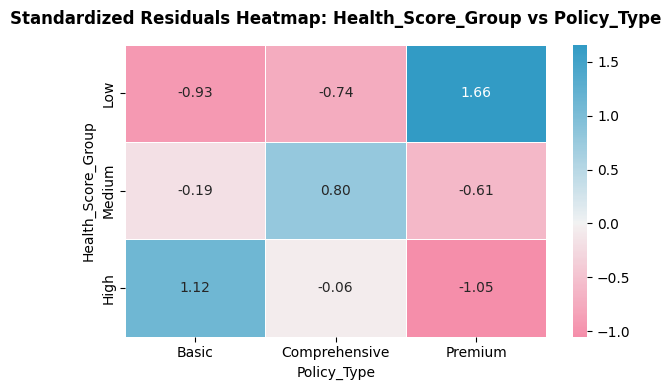

In [50]:
cal_ChiSquare(cat_feature="Health_Score_Group", target_feature="Policy_Type", df=df_train_ma, show_residuals=True)

**Answer:**

>Customers with different health scores do not show a statistically significant preference for any particular policy type. <br>
>In other words, having a lower or higher health score does not influence whether a customer chooses a Basic, Comprehensive, or Premium plan.

#### On average, how much **more do smokers pay** in insurance premiums compared to non-smokers (in percentage)?

**Answer:**

>Based on the "Distribution of Premium Amount by Smoking_Status" in the [Bivariate Analysis](#bivariate-analysis) section. <br>
> **Smoking status does not have a meaningful impact on premium amount.** <br>
> Both the average and median premiums are nearly identical, and the Mann–Whitney U Test confirms no statistically significant difference. <br>
> Therefore, **being a smoker does not lead to higher insurance premiums in this dataset.**

#### Is there a relationship between **exercise frequency** and the insurance premium or the type of policy chosen?

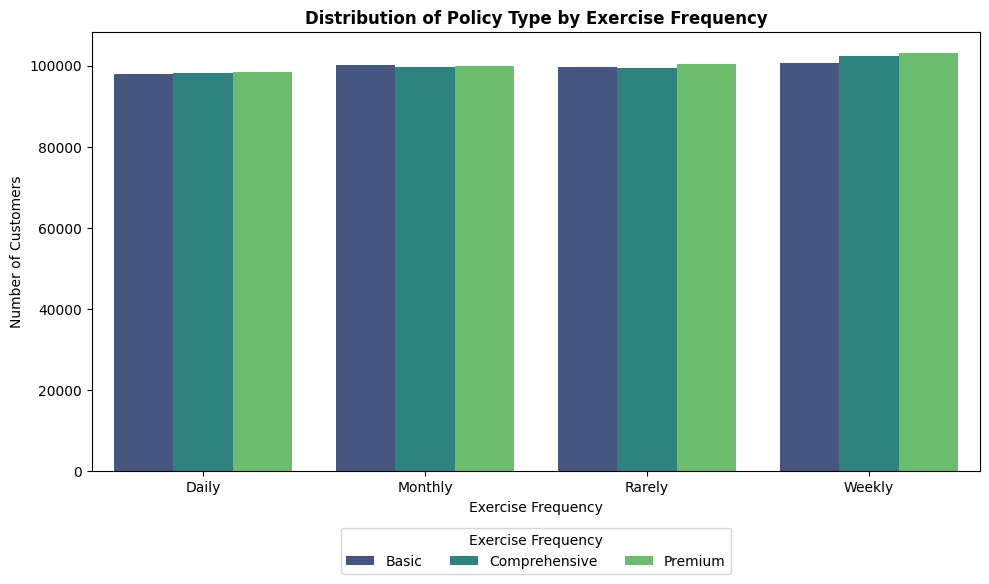

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_ma, x="Exercise_Frequency", hue="Policy_Type", palette="viridis")
plt.title("Distribution of Policy Type by Exercise Frequency", weight="bold")
plt.xlabel("Exercise Frequency")
plt.ylabel("Number of Customers")
plt.legend(title="Exercise Frequency", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.tight_layout()
plt.show()


🔍 Chi-Square Test of Independence: 'Exercise_Frequency' vs. 'Policy_Type'
Chi-squared statistic: 22.514
Degrees of freedom: 6
p-value: 0.000977
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Exercise_Frequency' and 'Policy_Type'.

📈 Standardized Residuals:
Policy_Type         Basic  Comprehensive  Premium
Exercise_Frequency                               
Daily                0.22           0.14    -0.36
Monthly              2.26          -0.51    -1.74
Rarely               0.48          -0.65     0.17
Weekly              -2.93           1.01     1.91


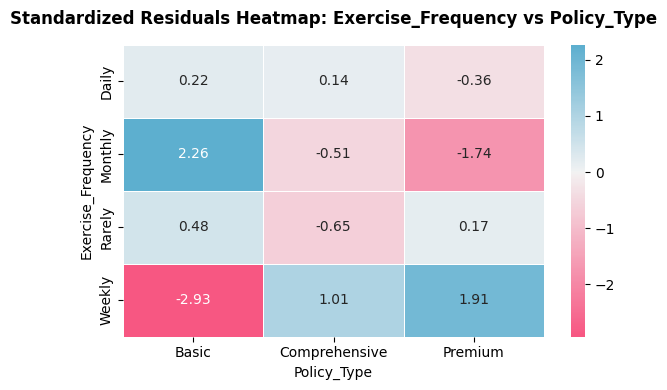

In [52]:
cal_ChiSquare(cat_feature="Exercise_Frequency", target_feature="Policy_Type", df=df_train_ma, show_residuals=True)

**Answer:**

>Based on the "Distribution of Premium Amount by Exercise_Frequency" in the [Bivariate Analysis](#bivariate-analysis) section. <br>
>There is no relationship between Exercise_Frequency and insurance premium. <br>
>There is a significant relationship between exercise frequency and the type of insurance policy selected. <br>
>Customers who exercise weekly tend to prefer higher-tier plans, while those who exercise monthly are more likely to choose basic plans.

#### What are the common characteristics (e.g., gender, occupation, location) of customers who gave a “**Poor**” rating in their feedback?

##### Customer_Feedback (Poor) vs Gender

In [53]:
df_train_ma_poor = df_train_ma[df_train_ma["Customer_Feedback"] == "Poor"]
df_train_ma_poor["Gender"].value_counts(normalize=True) * 100

Gender
Male      50.192268
Female    49.807732
Name: proportion, dtype: float64

##### Customer_Feedback (Poor) vs Occupation

In [54]:
df_train_ma_poor["Occupation"].value_counts(normalize=True) * 100

Occupation
Self-Employed    33.678221
Employed         33.632607
Unemployed       32.689172
Name: proportion, dtype: float64

##### Customer_Feedback (Poor) vs Location

In [55]:
df_train_ma_poor["Location"].value_counts(normalize=True) * 100

Location
Suburban    33.562173
Rural       33.472430
Urban       32.965397
Name: proportion, dtype: float64

##### Customer_Feedback vs Credit_Score

  Customer_Feedback  Median_Score
0           Average         594.5
1              Good         594.0
2              Poor         595.0


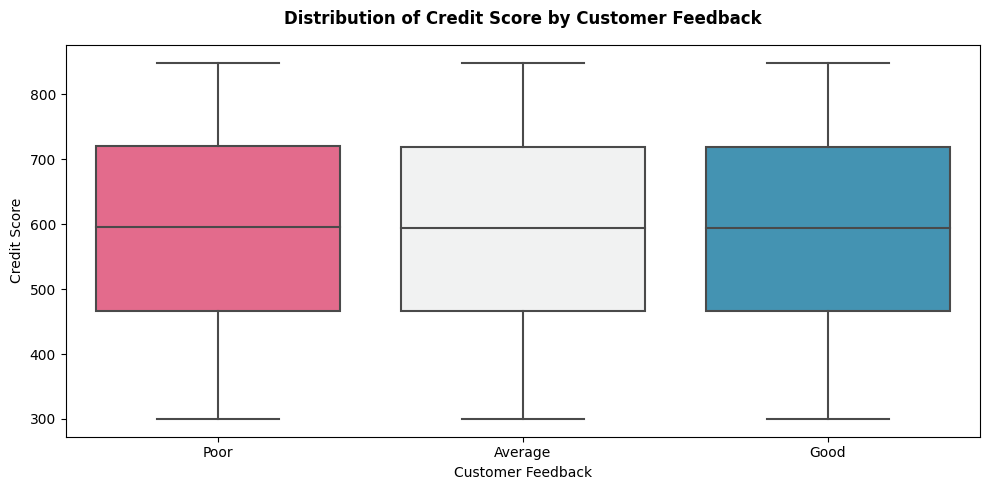

🔎 D’Agostino and Pearson Normality Test for 'Credit_Score' across 'Customer_Feedback' groups

 Group: Poor (n = 332138)
  Statistic : 133512.214
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Average (n = 334834)
  Statistic : 134899.964
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Good (n = 326861)
  Statistic : 132108.620
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Credit_Score ~ Customer_Feedback
Kruskal-Wallis H-statistic: 2.338
p-value: 0.31067927752170943

ℹ️ No significant difference found (p >= 0.05)


In [56]:
median_by_customer_feedback = df_train_ma.groupby("Customer_Feedback")["Credit_Score"].median().reset_index()
median_by_customer_feedback.columns = ["Customer_Feedback", "Median_Score"]
print(median_by_customer_feedback)

order = ["Poor", "Average", "Good"]
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df_train_ma, y = "Credit_Score", x = "Customer_Feedback", order=order,
                   palette=color(n_colors=df_train_ma["Customer_Feedback"].nunique()))
plt.title("Distribution of Credit Score by Customer Feedback", pad=15, weight = "bold")
plt.xlabel("Customer Feedback")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

perform_statical_testing(total_categories=3, feature="Customer_Feedback", df_train=df_train_ma, target_feature="Credit_Score")

##### Customer_Feedback vs Health_Score

  Customer_Feedback  Median_Score
0           Average     24.579971
1              Good     24.611790
2              Poor     24.505968


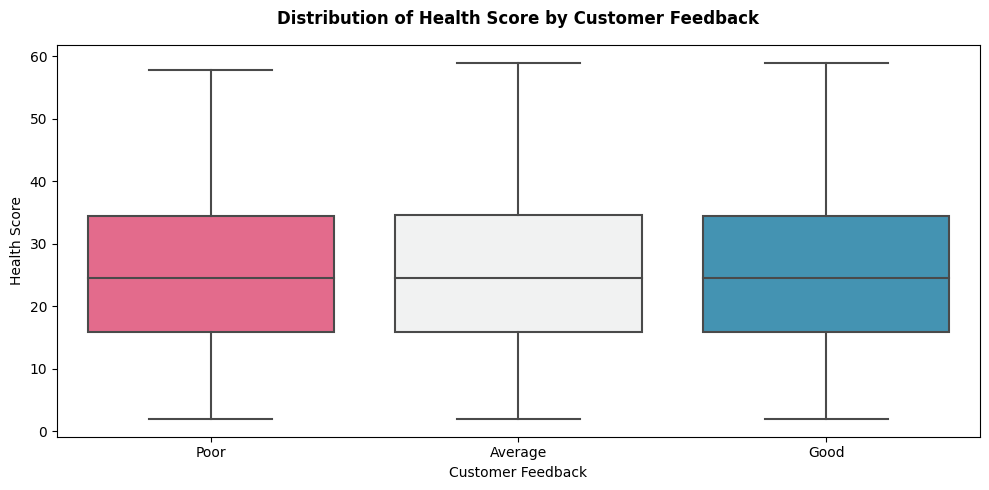

🔎 D’Agostino and Pearson Normality Test for 'Health_Score' across 'Customer_Feedback' groups

 Group: Poor (n = 352512)
  Statistic : 32201.048
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Average (n = 354399)
  Statistic : 33161.857
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Good (n = 346075)
  Statistic : 30563.668
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Health_Score ~ Customer_Feedback
Kruskal-Wallis H-statistic: 2.078
p-value: 0.35378171343425624

ℹ️ No significant difference found (p >= 0.05)


In [57]:
median_by_customer_feedback_hs = df_train_ma.groupby("Customer_Feedback")["Health_Score"].median().reset_index()
median_by_customer_feedback_hs.columns = ["Customer_Feedback", "Median_Score"]
print(median_by_customer_feedback_hs)

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df_train_ma, y = "Health_Score", x = "Customer_Feedback", order=order,
                   palette=color(n_colors=df_train_ma["Customer_Feedback"].nunique()))
plt.title("Distribution of Health Score by Customer Feedback", pad=15, weight = "bold")
plt.xlabel("Customer Feedback")
plt.ylabel("Health Score")
plt.tight_layout()
plt.show()

perform_statical_testing(total_categories=3, feature="Customer_Feedback", df_train=df_train_ma, target_feature="Health_Score")

##### Customer_Feedback vs Policy_Type

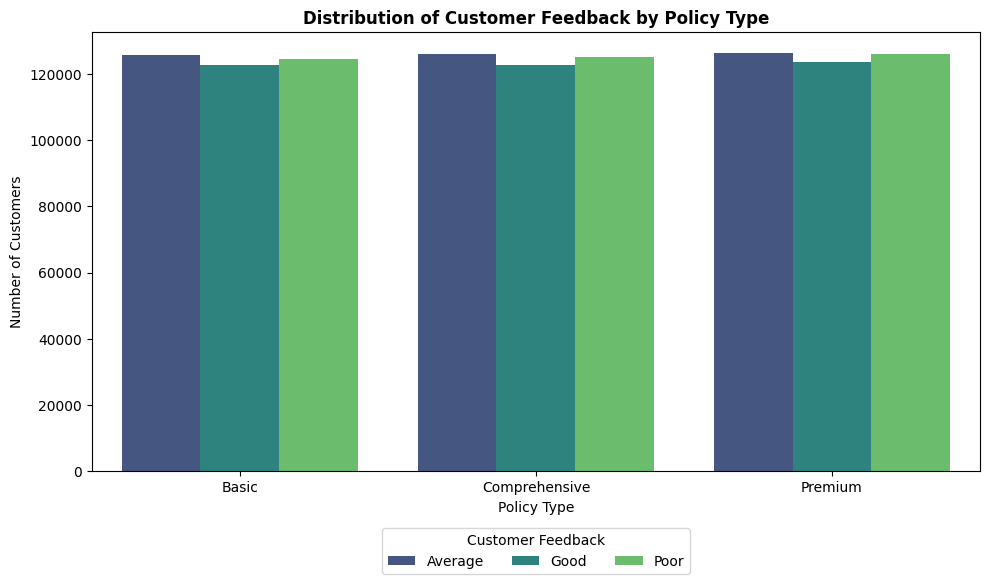


🔍 Chi-Square Test of Independence: 'Customer_Feedback' vs. 'Policy_Type'
Chi-squared statistic: 2.977
Degrees of freedom: 4
p-value: 0.561762
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Customer_Feedback' and 'Policy_Type'.

📈 Standardized Residuals:
Policy_Type        Basic  Comprehensive  Premium
Customer_Feedback                               
Average             0.62           0.16    -0.77
Good                0.33          -0.65     0.32
Poor               -0.95           0.49     0.46


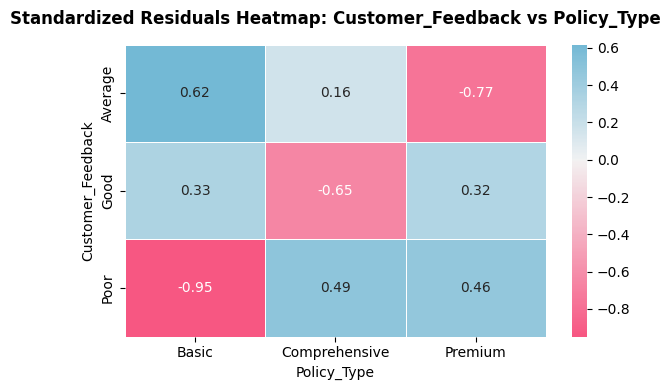

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_ma, x="Policy_Type", hue="Customer_Feedback", palette="viridis")
plt.title("Distribution of Customer Feedback by Policy Type", weight="bold")
plt.xlabel("Policy Type")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Feedback", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.tight_layout()
plt.show()

cal_ChiSquare(cat_feature="Customer_Feedback", target_feature="Policy_Type", df=df_train_ma, show_residuals=True)

##### Customer_Feedback vs Previous_Claims

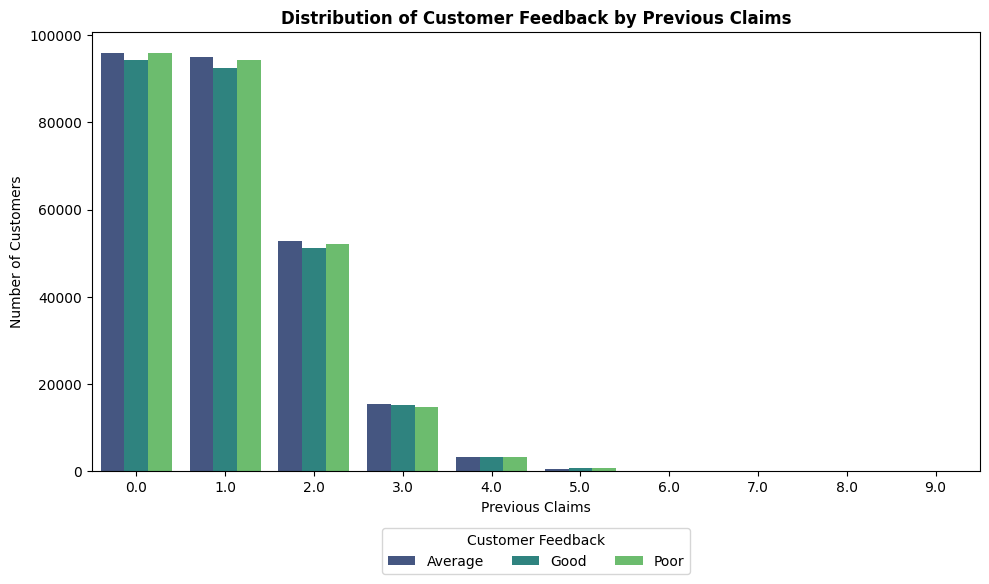


🔍 Chi-Square Test of Independence: 'Customer_Feedback' vs. 'Previous_Claims'
Chi-squared statistic: 37.766
Degrees of freedom: 18
p-value: 0.004159
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Customer_Feedback' and 'Previous_Claims'.

📈 Standardized Residuals:
Previous_Claims     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
Customer_Feedback                                                            
Average           -1.31  0.52  1.10  0.37 -0.17 -2.29  1.05  0.66  1.72 -0.58
Good               0.41 -1.01 -0.73  2.17  0.86  1.89 -0.93 -0.66 -0.20 -0.57
Poor               0.91  0.49 -0.38 -2.53 -0.68  0.43 -0.12 -0.01 -1.53  1.15


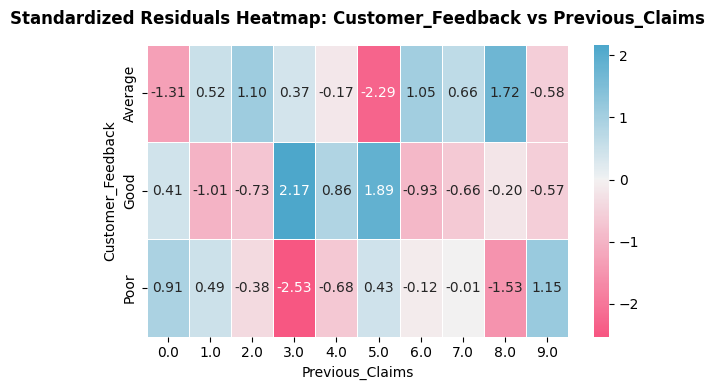

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_ma, x="Previous_Claims", hue="Customer_Feedback", palette="viridis")
plt.title("Distribution of Customer Feedback by Previous Claims", weight="bold")
plt.xlabel("Previous Claims")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Feedback", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.tight_layout()
plt.show()

cal_ChiSquare(cat_feature="Customer_Feedback", target_feature="Previous_Claims", df=df_train_ma, show_residuals=True)

**Answer:**

**Gender**

* Male: 50.2%
* Female: 49.8%
  ➡ There is **no noticeable difference** in gender distribution among customers with poor feedback.

**Occupation**

* Self-Employed: 33.7%
* Employed: 33.6%
* Unemployed: 32.7%
  ➡ **No occupation group stands out**—distribution is nearly equal.

**Location**

* Suburban: 126,032
* Rural: 125,695
* Urban: 123,791
  ➡ Feedback ratings do **not differ significantly by location**.

**Credit Score & Health Score**

* No statistically significant differences were found between feedback groups (p-values > 0.3).
  ➡ These features **do not appear to influence customer feedback**.

**Policy Type**

* Chi-square test also shows **no significant association** (p = 0.561).
  ➡ Customers across all policy types show **similar feedback patterns**.

**Previous Claims**

* A statistically significant association exists between `Previous_Claims` and `Customer_Feedback` (p = 0.0041).
* Standardized residuals indicate that customers who gave **"Poor" feedback are underrepresented** at the **3-claim level** (–2.53).
  ➡ This is the **only pattern of note**, though limited in scope.

**Overall conclusion:**

> Customers who leave "Poor" feedback **do not belong to a distinct demographic or behavioral group** in terms of gender, occupation, location, credit score, health score, or policy type.
> The only weak signal comes from `Previous_Claims`, where "Poor" feedback is slightly less common among customers with exactly 3 claims.

### Geographic Location & Property Type

\| Related Features: `Location`, `Property Type` |

❓ Business Questions

#### Do customers living in **rural areas** pay significantly different premiums compared to urban areas?

**Answer:**

>Based on the "Distribution of Premium Amount by Location" in the [Bivariate Analysis](#bivariate-analysis) section. <br>
>There is no relationship between Location and insurance premium. <br>
> In other words, whether customers live in rural, suburban, or urban areas, there is **no significant difference** in the insurance premium.

#### How does the **type of property owned** (apartment, house, etc.) affect insurance premiums?

**Answer:**

>Based on the "Distribution of Premium Amount by Property_Type" in the [Bivariate Analysis](#bivariate-analysis) section. <br>
>There is no relationship between Property Type and insurance premium. <br>
>In other words, whether customers own a house, an apartment, or a high-end condominium, there is **no significant difference** in the insurance premium.

#### Which location contributes the most to total premium revenue? Which area poses the highest risk?

   Location  Median_Income
0     Rural        23937.0
1  Suburban        23981.0
2     Urban        23891.0


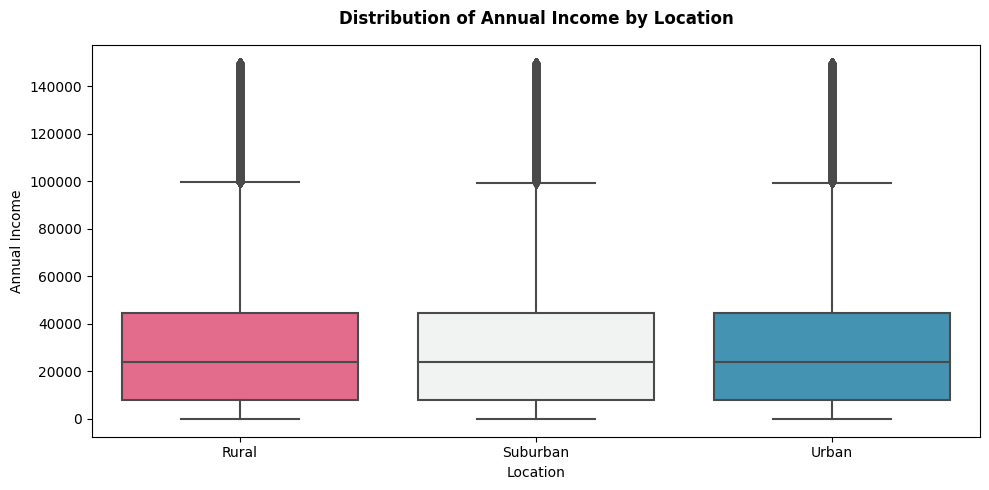

🔎 D’Agostino and Pearson Normality Test for 'Annual_Income' across 'Location' groups

 Group: Urban (n = 382599)
  Statistic : 93285.690
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Rural (n = 386109)
  Statistic : 94308.602
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Suburban (n = 386343)
  Statistic : 93760.507
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Annual_Income ~ Location
Kruskal-Wallis H-statistic: 0.515
p-value: 0.7731742778600299

ℹ️ No significant difference found (p >= 0.05)


In [60]:
median_by_income = df_train_ma.groupby("Location")["Annual_Income"].median().reset_index()
median_by_income.columns = ["Location", "Median_Income"]
print(median_by_income)

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df_train_ma, y = "Annual_Income", x = "Location",
                   palette=color(n_colors=df_train_ma["Location"].nunique()))
plt.title("Distribution of Annual Income by Location", pad=15, weight = "bold")
plt.xlabel("Location")
plt.ylabel("Annual Income")
plt.tight_layout()
plt.show()

perform_statical_testing(total_categories=3, feature="Location", df_train=df_train_ma, target_feature="Annual_Income")

**Answer:**

>There is no difference in insurance premiums among customers living in rural, suburban, or urban areas.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Missing Value

### Filling for numerical features

Missing values were filled using the median value of the respective column in the training dataset. This approach ensures that the central tendency of the data is preserved while mitigating the impact of outliers.

In [61]:
for col in num_features:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

### Filling for categorical features

* Missing values were filled with the placeholder `Unknown`. This ensures that the absence of data is explicitly marked without distorting the distribution of existing categories.
* For categorical variables with numeric values, we will impute missing values using the mode.

In [62]:
# List of categorical columns with numeric values
cat_numeric_cols = ["Number_of_Dependents", "Previous_Claims", "Insurance_Duration"]

# Fill missing values with the mode for each column
for col in cat_numeric_cols:
    mode_val = df_train[col].mode(dropna=True)[0]  # Get the most frequent value (mode)
    df_train[col] = df_train[col].fillna(mode_val)
    mode_val = df_test[col].mode(dropna=True)[0]  # Get the most frequent value (mode)
    df_test[col] = df_test[col].fillna(mode_val)

In [63]:
cat_cols = ["Marital_Status", "Occupation", "Customer_Feedback"]

for col in cat_cols:
    # If the column is of Categorical type, add "Unknown" to the list of valid categories
    if pd.api.types.is_categorical_dtype(df_train[col]):
        df_train[col] = df_train[col].cat.add_categories("Unknown")
        df_test[col] = df_test[col].cat.add_categories("Unknown")
    
    # Then fill missing values with "Unknown"
    df_train[col] = df_train[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

In [64]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 1,200,000 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 800,000 rows.


## Feature Engineering

In [65]:
# Convert some cat features to numerical to generate new features
df_train["Previous_Claims"] = pd.to_numeric(df_train["Previous_Claims"], errors="coerce")
df_test["Previous_Claims"] = pd.to_numeric(df_test["Previous_Claims"], errors="coerce")

df_train["Number_of_Dependents"] = pd.to_numeric(df_train["Number_of_Dependents"], errors="coerce")
df_test["Number_of_Dependents"] = pd.to_numeric(df_test["Number_of_Dependents"], errors="coerce")

df_train["Insurance_Duration"] = pd.to_numeric(df_train["Insurance_Duration"], errors="coerce")
df_test["Insurance_Duration"] = pd.to_numeric(df_test["Insurance_Duration"], errors="coerce")

In [66]:
# Income group
df_train["Income_Group"] = pd.qcut(df_train["Annual_Income"], q=4, labels=["Low Income", "Mid-Low", "Mid-High", "High Income"])
df_test["Income_Group"] = pd.qcut(df_test["Annual_Income"], q=4, labels=["Low Income", "Mid-Low", "Mid-High", "High Income"])

# Age Group
df_train["Age_Group"] = pd.cut(df_train["Age"], bins=[0, 25, 35, 45, 55, 100], labels=["<25", "25–35", "35–45", "45–55", ">55"])
df_test["Age_Group"] = pd.cut(df_test["Age"], bins=[0, 25, 35, 45, 55, 100], labels=["<25", "25–35", "35–45", "45–55", ">55"])

# Health_Risk_Level
df_train["Health_Risk_Level"] = pd.qcut(df_train["Health_Score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])
df_test["Health_Risk_Level"] = pd.qcut(df_test["Health_Score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])

# Has_Claimed
df_train["Has_Claimed"] = (df_train["Previous_Claims"] > 0).astype(int)
df_test["Has_Claimed"] = (df_test["Previous_Claims"] > 0).astype(int)

# Is_Smoker_At_Risk
df_train["Is_Smoker_At_Risk"] = ((df_train["Smoking_Status"] == "Yes") & (df_train["Health_Score"] < df_train["Health_Score"].median())).astype(int)
df_test["Is_Smoker_At_Risk"] = ((df_test["Smoking_Status"] == "Yes") & (df_test["Health_Score"] < df_test["Health_Score"].median())).astype(int)

# Policy_Season
def map_month_to_season(month):
    if month in [12, 1, 2]: return "Winter"
    if month in [3, 4, 5]: return "Spring"
    if month in [6, 7, 8]: return "Summer"
    return "Autumn"

df_train["Policy_Month"] = df_train["Policy_Start_Date"].dt.month
df_train["Policy_Season"] = df_train["Policy_Month"].apply(map_month_to_season)

df_test["Policy_Month"] = df_test["Policy_Start_Date"].dt.month
df_test["Policy_Season"] = df_test["Policy_Month"].apply(map_month_to_season)

# Dependents_per_Year
df_train["Dependents_per_Year"] = df_train["Number_of_Dependents"] / (df_train["Insurance_Duration"] + 1)
df_test["Dependents_per_Year"] = df_test["Number_of_Dependents"] / (df_test["Insurance_Duration"] + 1)

# Is_Negative_Feedback
df_train["Is_Negative_Feedback"] = df_train["Customer_Feedback"].apply(lambda x: x == "Poor")
df_test["Is_Negative_Feedback"] = df_test["Customer_Feedback"].apply(lambda x: x == "Poor")

# Age × Health Score → reflects health-related risk increasing with age
df_train["Age_Health"] = df_train["Age"] * df_train["Health_Score"]
df_test["Age_Health"] = df_test["Age"] * df_test["Health_Score"]

# Annual Income × Credit Score → suggests financial stability
df_train["Income_Credit"] = df_train["Annual_Income"] * df_train["Credit_Score"]
df_test["Income_Credit"] = df_test["Annual_Income"] * df_test["Credit_Score"]

# Number of Dependents × Insurance Duration → indicates long-term financial burden
df_train["Dependents_Duration"] = df_train["Number_of_Dependents"] * df_train["Insurance_Duration"]
df_test["Dependents_Duration"] = df_test["Number_of_Dependents"] * df_test["Insurance_Duration"]

# Vehicle Age × Previous Claims → highlights vehicle-related risk
df_train["VehicleAge_Claims"] = df_train["Vehicle_Age"] * df_train["Previous_Claims"]
df_test["VehicleAge_Claims"] = df_test["Vehicle_Age"] * df_test["Previous_Claims"]

# Health Score × Previous Claims → explores if health impacts claim frequency
df_train["Health_Claims"] = df_train["Health_Score"] * df_train["Previous_Claims"]
df_test["Health_Claims"] = df_test["Health_Score"] * df_test["Previous_Claims"]

In [67]:
list_feature_convert = ["Previous_Claims", "Number_of_Dependents", "Insurance_Duration", "Policy_Season"]
convert_cat(df=df_train, cat_features=list_feature_convert)
convert_cat(df=df_test, cat_features=list_feature_convert)

df_train.drop(columns="Policy_Start_Date", axis=1, inplace=True)
df_test.drop(columns="Policy_Start_Date", axis=1, inplace=True)

In [68]:
df_train["Smoking_Status"] = df_train["Smoking_Status"].map({"Yes": 1, "No": 0}).astype(bool)
df_test["Smoking_Status"] = df_test["Smoking_Status"].map({"Yes": 1, "No": 0}).astype(bool)

bool_cols = ["Has_Claimed", "Is_Smoker_At_Risk", "Is_Negative_Feedback"]

for col in bool_cols:
    df_train[col] = df_train[col].astype(bool)
    df_test[col] = df_test[col].astype(bool)

# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Age                   1200000 non-null  float64 
 1   Gender                1200000 non-null  category
 2   Annual_Income         1200000 non-null  float64 
 3   Marital_Status        1200000 non-null  category
 4   Number_of_Dependents  1200000 non-null  category
 5   Education_Level       1200000 non-null  category
 6   Occupation            1200000 non-null  category
 7   Health_Score          1200000 non-null  float64 
 8   Location              1200000 non-null  category
 9   Policy_Type           1200000 non-null  category
 10  Previous_Claims       1200000 non-null  category
 11  Vehicle_Age           1200000 non-null  float64 
 12  Credit_Score          1200000 non-null  float64 
 13  Insurance_Duration    1200000 non-null  category
 14  C

In [69]:
cat_features = df_train.select_dtypes(include=["category"]).columns.tolist()
cat_features.extend(["Is_Smoker_At_Risk", "Is_Negative_Feedback", "Has_Claimed"])
cat_features

['Gender',
 'Marital_Status',
 'Number_of_Dependents',
 'Education_Level',
 'Occupation',
 'Location',
 'Policy_Type',
 'Previous_Claims',
 'Insurance_Duration',
 'Customer_Feedback',
 'Exercise_Frequency',
 'Property_Type',
 'Income_Group',
 'Age_Group',
 'Health_Risk_Level',
 'Policy_Season',
 'Is_Smoker_At_Risk',
 'Is_Negative_Feedback',
 'Has_Claimed']

In [70]:
num_features = df_train.select_dtypes(exclude=["category"]).columns.tolist()
num_features.remove("Is_Negative_Feedback")
num_features.remove("Is_Smoker_At_Risk")
num_features.remove("Has_Claimed")
num_features

['Age',
 'Annual_Income',
 'Health_Score',
 'Vehicle_Age',
 'Credit_Score',
 'Smoking_Status',
 'Premium_Amount',
 'Policy_Month',
 'Dependents_per_Year',
 'Age_Health',
 'Income_Credit',
 'Dependents_Duration',
 'VehicleAge_Claims',
 'Health_Claims']

### New categorical features by Premium_Amount

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Income_Group' groups

 Group: Mid-Low (n = 322471)
  Statistic : 77143.217
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Mid-High (n = 277575)
  Statistic : 68537.835
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High Income (n = 299946)
  Statistic : 46008.768
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low Income (n = 300008)
  Statistic : 47956.597
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Income_Group
Kruskal-Wallis H-statistic: 6517.099
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                Low Income        Mid-Low       Mid-High  High Income
Low Income    1.000000e+00  1.370941e-242   2.866690e-09       

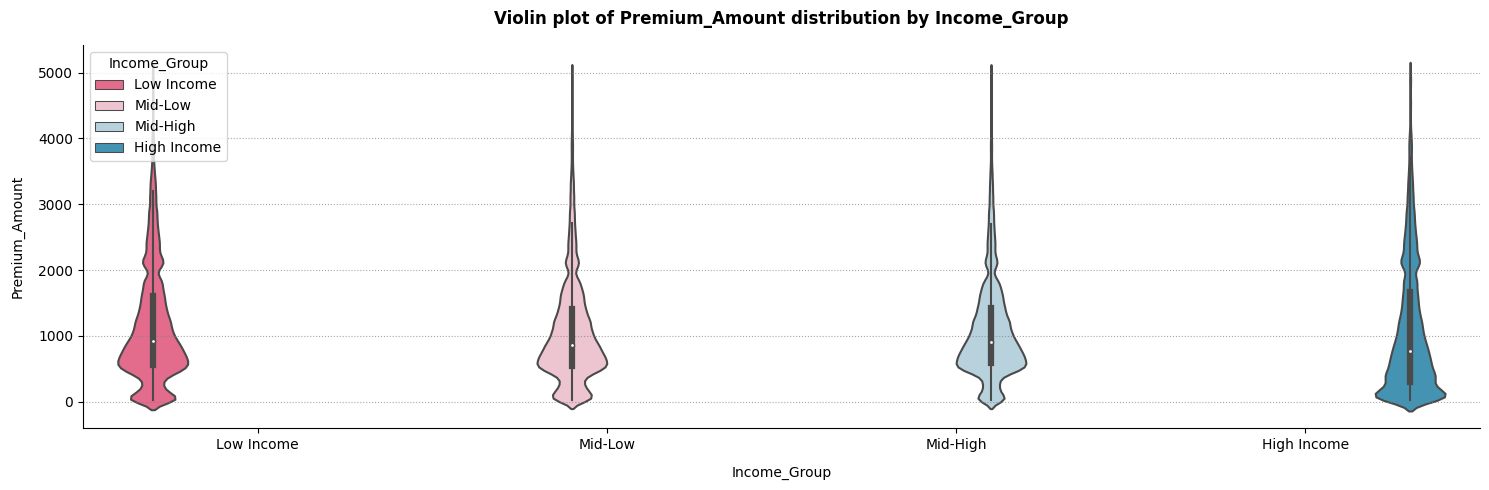

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Age_Group' groups

 Group: <25 (n = 196616)
  Statistic : 37805.862
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 35–45 (n = 270925)
  Statistic : 53114.431
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 25–35 (n = 250429)
  Statistic : 48398.738
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 45–55 (n = 252959)
  Statistic : 49736.945
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: >55 (n = 229071)
  Statistic : 44900.486
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Age_Group
Kruskal-Wallis H-statistic: 12.303
p-value: 0.015235051496156518
🟢 Significant difference found. Running Dunn's Post-Hoc Test

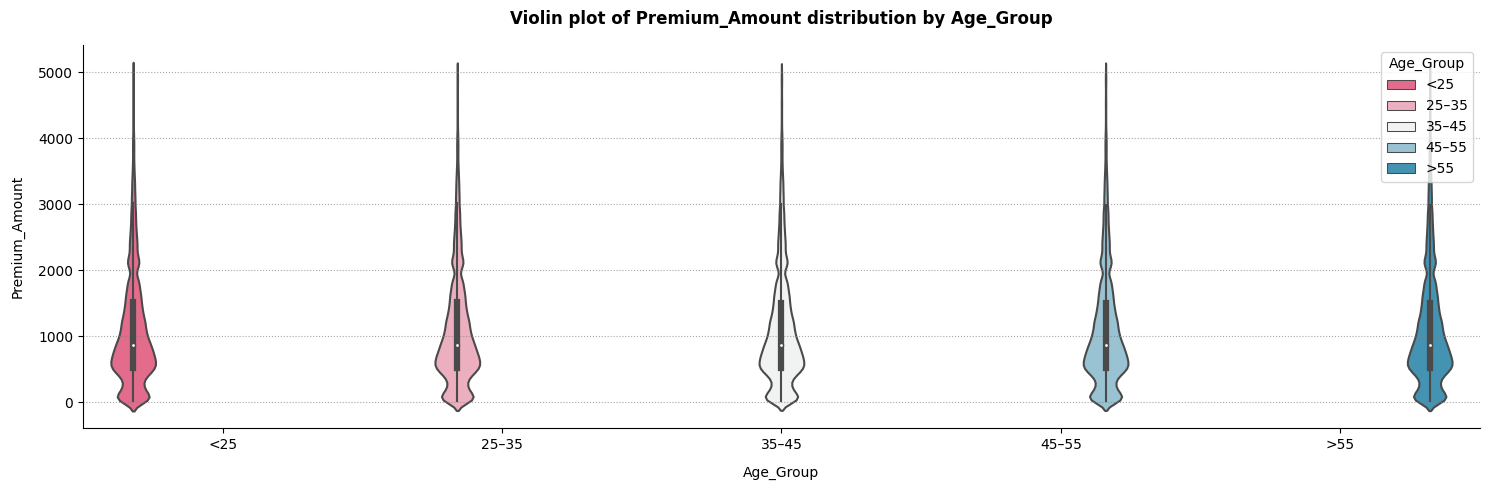

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Health_Risk_Level' groups

 Group: Medium Risk (n = 399992)
  Statistic : 81261.712
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High Risk (n = 400008)
  Statistic : 77949.061
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Low Risk (n = 400000)
  Statistic : 74798.519
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Health_Risk_Level
Kruskal-Wallis H-statistic: 242.930
p-value: 1.772016570637472e-53
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                High Risk   Medium Risk      Low Risk
High Risk    1.000000e+00  2.612894e-08  3.515161e-53
Medium Risk  2.612894e-08  1.000000e+00  1.244892e-21
Low Risk     3.515161e-53  1.244892e-21  1.000000e+00


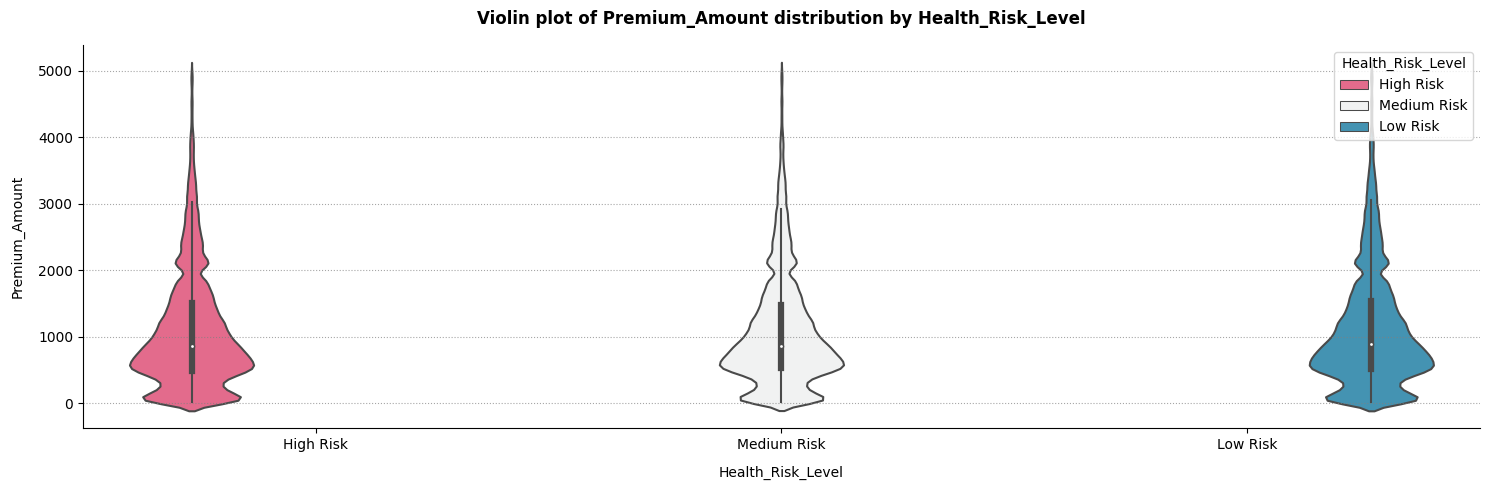

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Has_Claimed' groups

 Group: True (n = 530538)
  Statistic : 96384.308
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: False (n = 669462)
  Statistic : 137904.278
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_Amount' by 'Has_Claimed'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 183769300552.0
p-value     : 5.61898311257737e-236

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'True' has a higher median 'Premium_Amount' than Group 'False'.


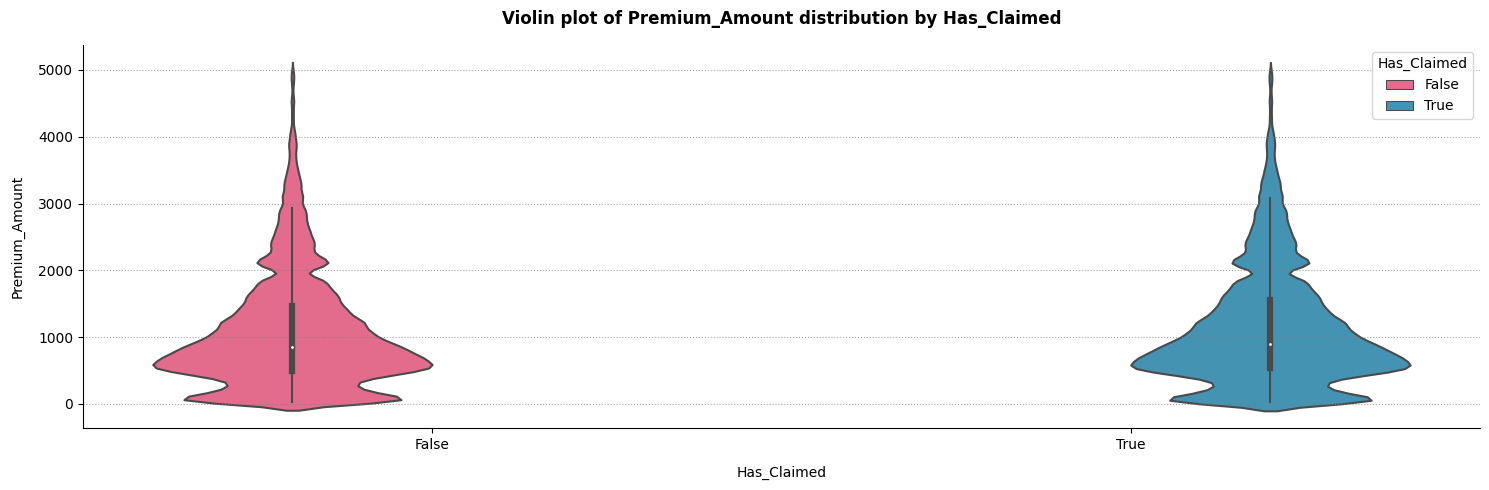

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Is_Smoker_At_Risk' groups

 Group: False (n = 917784)
  Statistic : 178125.465
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: True (n = 282216)
  Statistic : 55857.144
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_Amount' by 'Is_Smoker_At_Risk'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 131461581048.5
p-value     : 5.954796774857685e-34

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'False' has a higher median 'Premium_Amount' than Group 'True'.


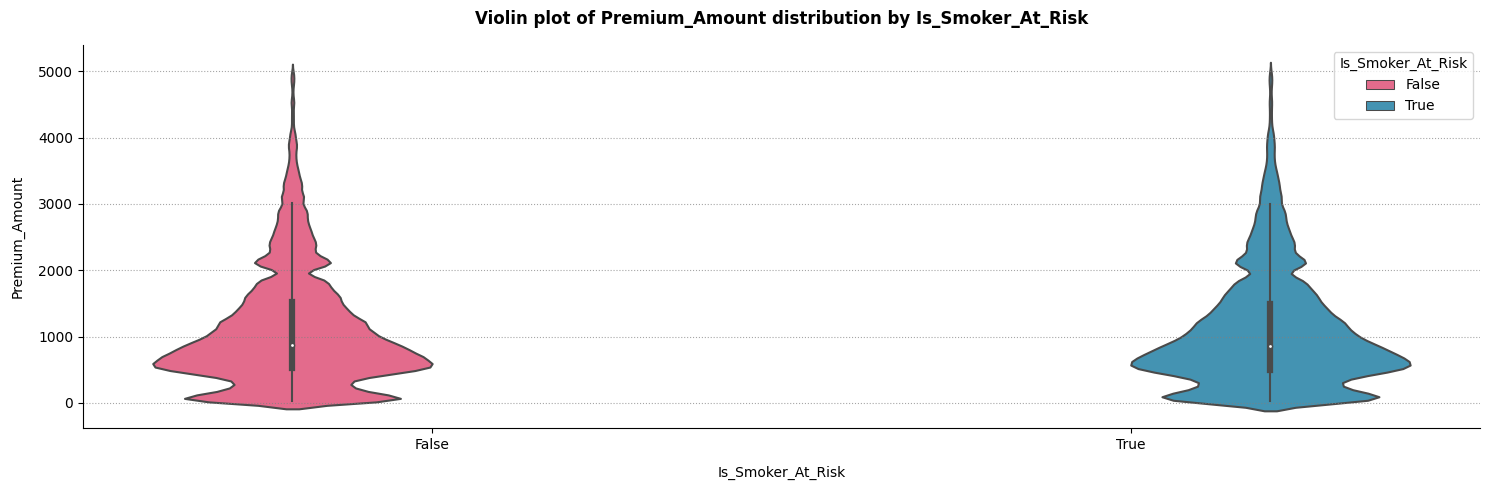

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Policy_Season' groups

 Group: Winter (n = 291981)
  Statistic : 57167.322
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Summer (n = 300349)
  Statistic : 58970.200
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Autumn (n = 298679)
  Statistic : 56459.901
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Spring (n = 308991)
  Statistic : 61358.371
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: Premium_Amount ~ Policy_Season
Kruskal-Wallis H-statistic: 53.012
p-value: 1.822366354153851e-11
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              Autumn        Spring        Summer    Winter
Autumn  1.000000e+00  9.594349e-11  6.433942e-08  0.000019
Spring  9

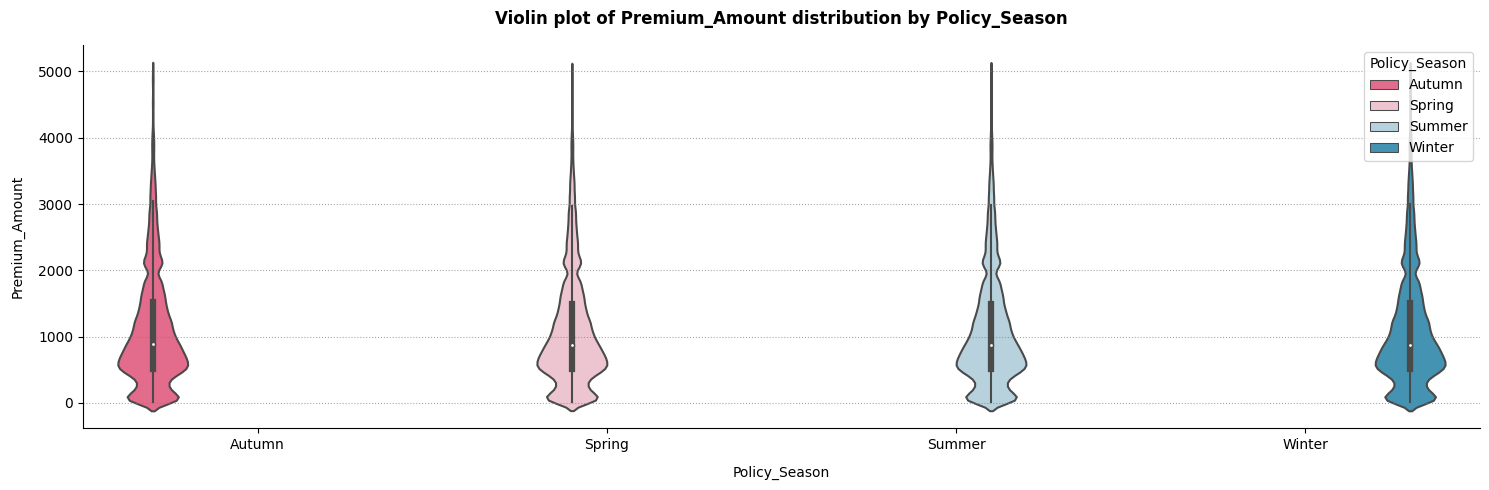

🔎 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Is_Negative_Feedback' groups

 Group: True (n = 375518)
  Statistic : 74444.393
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: False (n = 824482)
  Statistic : 159495.032
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_Amount' by 'Is_Negative_Feedback'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 154140916438.5
p-value     : 0.00016458197242940522

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'False' has a higher median 'Premium_Amount' than Group 'True'.


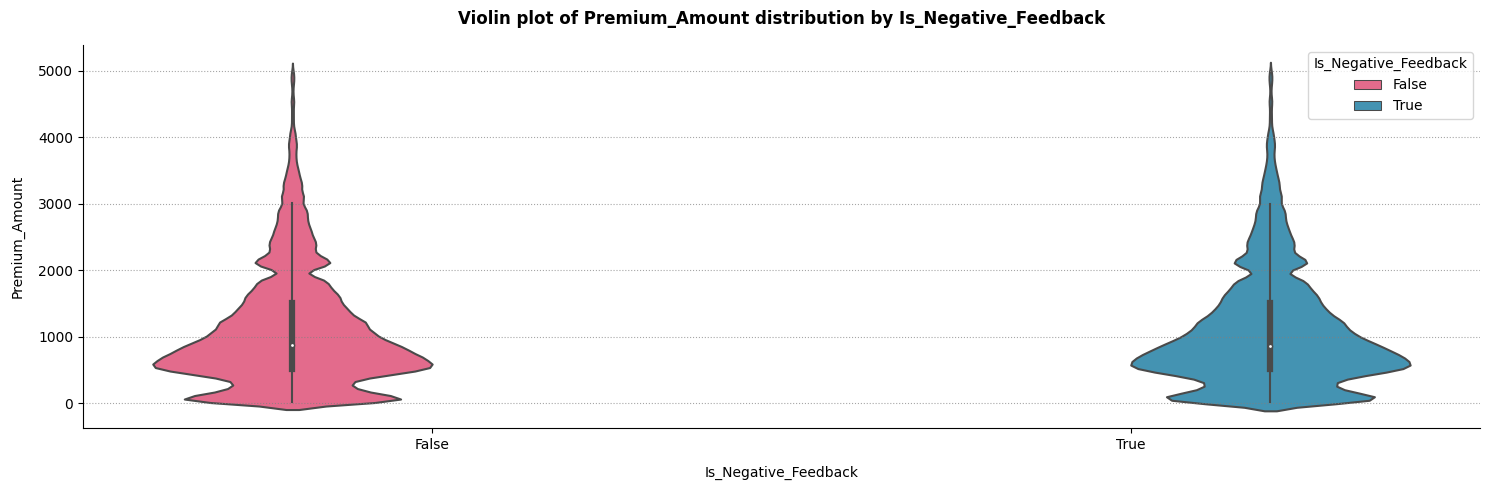

In [71]:
new_features = ["Income_Group", "Age_Group", "Health_Risk_Level", "Has_Claimed", "Is_Smoker_At_Risk", "Policy_Season", "Is_Negative_Feedback"]
for feature in new_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of Premium Amount by {feature}</b></h2>"))
    plot_categorical_distribution_by_Premium_Amount(feature=feature)

**Insight for new Categorical Features by Premium_Amount**

**Income\_Group**

There is a relationship between income and premium amount. Individuals with lower income tend to pay higher premiums, while those with higher income enjoy lower premiums — this is an important insight for pricing and insurance policy strategy.

**Age\_Group**

Although there are slight differences in premium amounts across age groups, the overall trend is very mild and not clearly defined. Therefore, age does not appear to be a strong influencing factor on premium amounts in this dataset.

**Health\_Risk\_Level**

Customers with good health (Low Risk) are paying higher insurance premiums compared to those in poorer health (High Risk), despite the typical expectation that “lower risk → lower premium.”

**Has\_Claimed**

Insurance companies tend to increase premiums for customers with a history of claims, to compensate for potential risks and costs that may arise.

**Is\_Smoker\_At\_Risk**

Although it is commonly expected that individuals with higher health risks (e.g., smokers) pay more, the opposite is observed: those not classified as “at risk from smoking” are actually paying higher premiums.

**Policy\_Season**

Policy season has a statistically significant effect on premium amounts. Autumn is the season with the highest premiums and is notably different from the others. However, Spring, Summer, and Winter are relatively similar.

**Is\_Negative\_Feedback**

There is a statistically significant difference in premium amounts between customers with and without negative feedback. However, the difference is small in practical terms.

### Correlation Analysis of Numerical Features

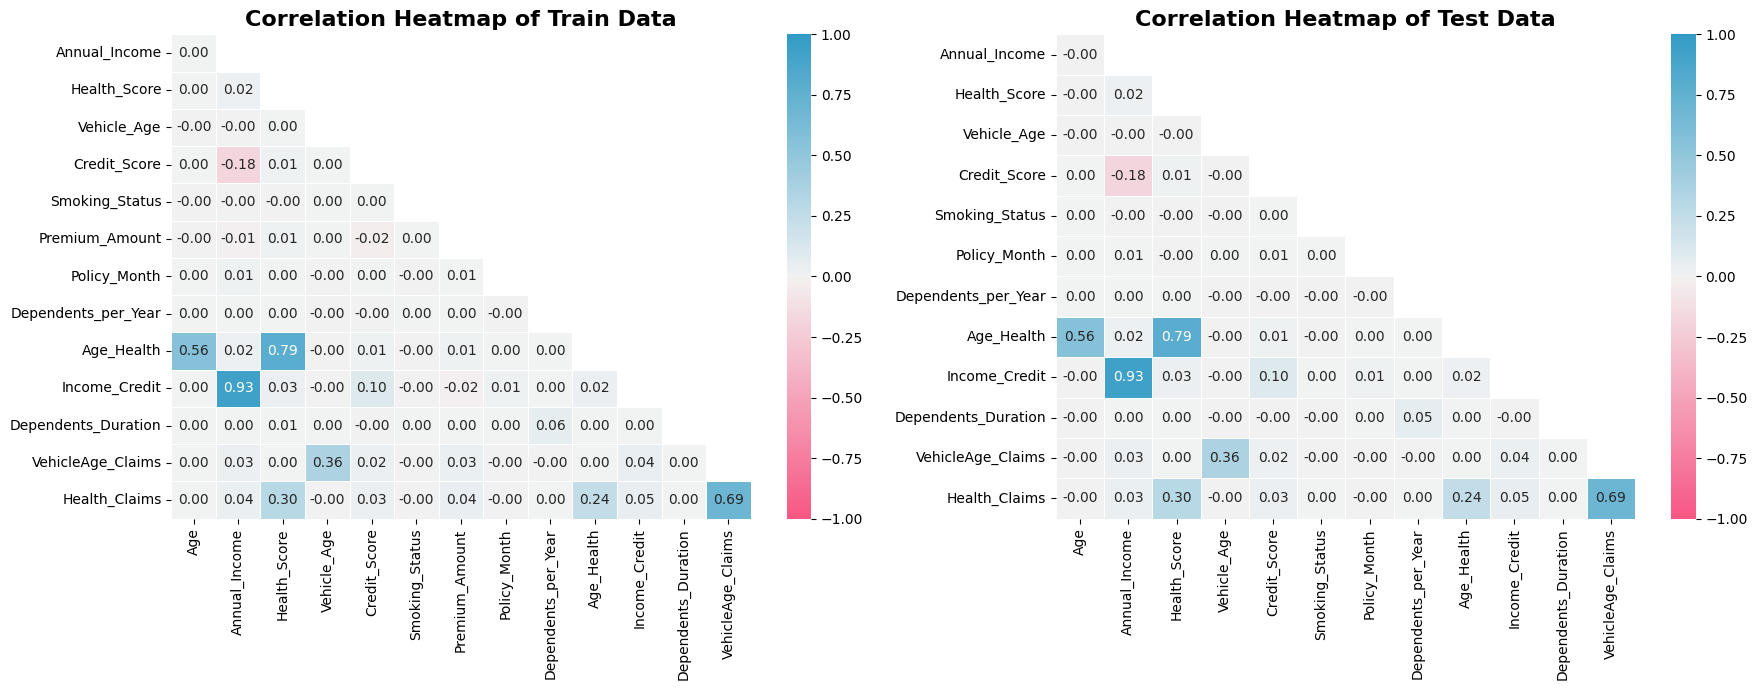

In [72]:
def plot_correlation_new(features, df_train, df_test, train_name="Train Data", test_name="Test Data"):
    corr_train = df_train[features].corr()
    if "Premium_Amount" in features:
        features.remove("Premium_Amount")
    corr_test = df_test[features].corr()

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation_new(features=num_features,df_train=df_train, df_test=df_test)

**Insight**

* The variables analyzed include both original features (`Age`, `Annual_Income`, `Health_Score`, `Credit_Score`, etc.) and engineered features (`Age_Health`, `Income_Credit`, `Health_Claims`, etc.).
* **Most correlation coefficients are very low**, hovering around zero → indicating **no strong linear relationships**.
* Some **engineered features** such as `Age_Health`, `Income_Credit`, `Health_Claims`, and `VehicleAge_Claims` show **moderate to strong correlation** with their base components.

**Detailed Observations**

| Feature Pair                         | Corr (Train) | Corr (Test) | Interpretation                                                                   |
| ------------------------------------ | ------------ | ----------- | -------------------------------------------------------------------------------- |
| `Income_Credit` vs `Annual_Income`   | **0.93**     | **0.93**    | **Very strong** (assumed definition: `Income_Credit = Income - Credit_Score`) |
| `Age_Health` vs `Health_Score`       | **0.79**     | **0.79**    | Strong — feature combination reflects embedded information                    |
| `Health_Claims` vs `Health_Score`    | **0.30**     | **0.30**    | Moderate — implies that health status relates to claim behavior               |
| `VehicleAge_Claims` vs `Vehicle_Age` | **0.36**     | **0.36**    | Moderate — older vehicles tend to be associated with more claims              |
| `Premium_Amount` vs other features (Only Train)   | \~0.00       | \~0.00      | No significant linear relationship with any feature                           |

**Implications – Feature Engineering vs Multicollinearity**

* **Engineered features** like `Age_Health` and `Income_Credit` are **highly correlated** with their base components — this is **expected**.
* `Premium_Amount` shows **no strong linear correlation** with any single feature.

**Conclusion**

> 🔍 *The heatmaps confirm that while most base features are weakly correlated, engineered features like `Age_Health` and `Income_Credit` reflect strong internal consistency. There is no strong multicollinearity across unrelated features, meaning the dataset is well-suited for both linear and non-linear modeling frameworks.*

## Handling Skewness

In [73]:
num_features.append("Premium_Amount")
skew_feature_train, skew_train_df = check_skewness(data=df_train, dataset_name="Train Data", numerical_features=num_features)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
VehicleAge_Claims         |   +2.2644 | Highly skewed
Health_Claims             |   +2.1595 | Highly skewed
Income_Credit             |   +1.8142 | Highly skewed
Annual_Income             |   +1.5230 | Highly skewed
Dependents_per_Year       |   +1.5139 | Highly skewed
Premium_Amount            |   +1.2409 | Highly skewed
Age_Health                |   +0.8735 | Moderately skewed
Dependents_Duration       |   +0.8162 | Moderately skewed
Health_Score              |   +0.3073 | Approximately symmetric
Credit_Score              |   -0.1258 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0121 | Approximately symmetric
Policy_Month              |   +0.0065 | Approximately symmetric
Smoking_Status        

In [74]:
num_features.remove("Premium_Amount")
skew_feature_test, skew_test_df = check_skewness(data=df_test, dataset_name="Test Data", numerical_features=num_features)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
VehicleAge_Claims         |   +2.2843 | Highly skewed
Health_Claims             |   +2.1555 | Highly skewed
Income_Credit             |   +1.8007 | Highly skewed
Dependents_per_Year       |   +1.5174 | Highly skewed
Annual_Income             |   +1.5168 | Highly skewed
Age_Health                |   +0.8782 | Moderately skewed
Dependents_Duration       |   +0.8167 | Moderately skewed
Health_Score              |   +0.3078 | Approximately symmetric
Credit_Score              |   -0.1261 | Approximately symmetric
Vehicle_Age               |   -0.0199 | Approximately symmetric
Age                       |   -0.0097 | Approximately symmetric
Smoking_Status            |   -0.0093 | Approximately symmetric
Policy_Month              |   +0.0068 | Approximately symmetric
-------------

In [75]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [76]:
processed_train_df, transformed_columns, sparse_columns, skewed_columns, pt_dict_train = handle_skewed_features(df=df_train, num_features=skew_feature_train)
num_features_train = ["Age", "PT_Annual_Income", "Health_Score", "Vehicle_Age", "Credit_Score", "Policy_Month", "PT_Dependents_per_Year", "PT_Age_Health", "PT_Income_Credit",
                "PT_Dependents_Duration", "PT_VehicleAge_Claims", "PT_Health_Claims", "PT_Premium_Amount"]
skew_feature_train, skew_train_df = check_skewness(data=processed_train_df, numerical_features=num_features_train,
                                                   dataset_name= "Train data")


🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
PT_VehicleAge_Claims      |   +0.4546 | Approximately symmetric
Health_Score              |   +0.3073 | Approximately symmetric
PT_Health_Claims          |   +0.3066 | Approximately symmetric
PT_Dependents_Duration    |   -0.1347 | Approximately symmetric
Credit_Score              |   -0.1258 | Approximately symmetric
PT_Dependents_per_Year    |   +0.0795 | Approximately symmetric
PT_Annual_Income          |   -0.0719 | Approximately symmetric
PT_Income_Credit          |   -0.0693 | Approximately symmetric
PT_Premium_Amount         |   -0.0578 | Approximately symmetric
PT_Age_Health             |   -0.0332 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0121 | Approximately symmetric
Policy_Month  

In [77]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test, pt_dict_test = handle_skewed_features(df=df_test, num_features=skew_feature_test, dataset="Test data")
num_features_test = ["Age", "PT_Annual_Income", "Health_Score", "Vehicle_Age", "Credit_Score", "Policy_Month", "PT_Dependents_per_Year", "PT_Age_Health", "PT_Income_Credit",
                "PT_Dependents_Duration", "PT_VehicleAge_Claims", "PT_Health_Claims"]
skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features_test,
                                                   dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                   | Skewness   | Remark
----------------------------------------------------------------------
PT_VehicleAge_Claims      |   +0.4512 | Approximately symmetric
Health_Score              |   +0.3078 | Approximately symmetric
PT_Health_Claims          |   +0.3039 | Approximately symmetric
PT_Dependents_Duration    |   -0.1347 | Approximately symmetric
Credit_Score              |   -0.1261 | Approximately symmetric
PT_Dependents_per_Year    |   +0.0793 | Approximately symmetric
PT_Annual_Income          |   -0.0728 | Approximately symmetric
PT_Income_Credit          |   -0.0706 | Approximately symmetric
PT_Age_Health             |   -0.0327 | Approximately symmetric
Vehicle_Age               |   -0.0199 | Approximately symmetric
Age                       |   -0.0097 | Approximately symmetric
Policy_Month              |   +0.0068 | Approximately symmetric
---------------

**Observations from the Skewness Table (`processed_train_df` and `processed_test_df`):**

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_VehicleAge_Claims`, `PT_Health_Claims`, `PT_Dependents_Duration`, `PT_Dependents_per_Year`, `PT_Annual_Income`, `PT_Income_Credit`, `PT_Age_Health` and `PT_Premium_Amount` (only train data) less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

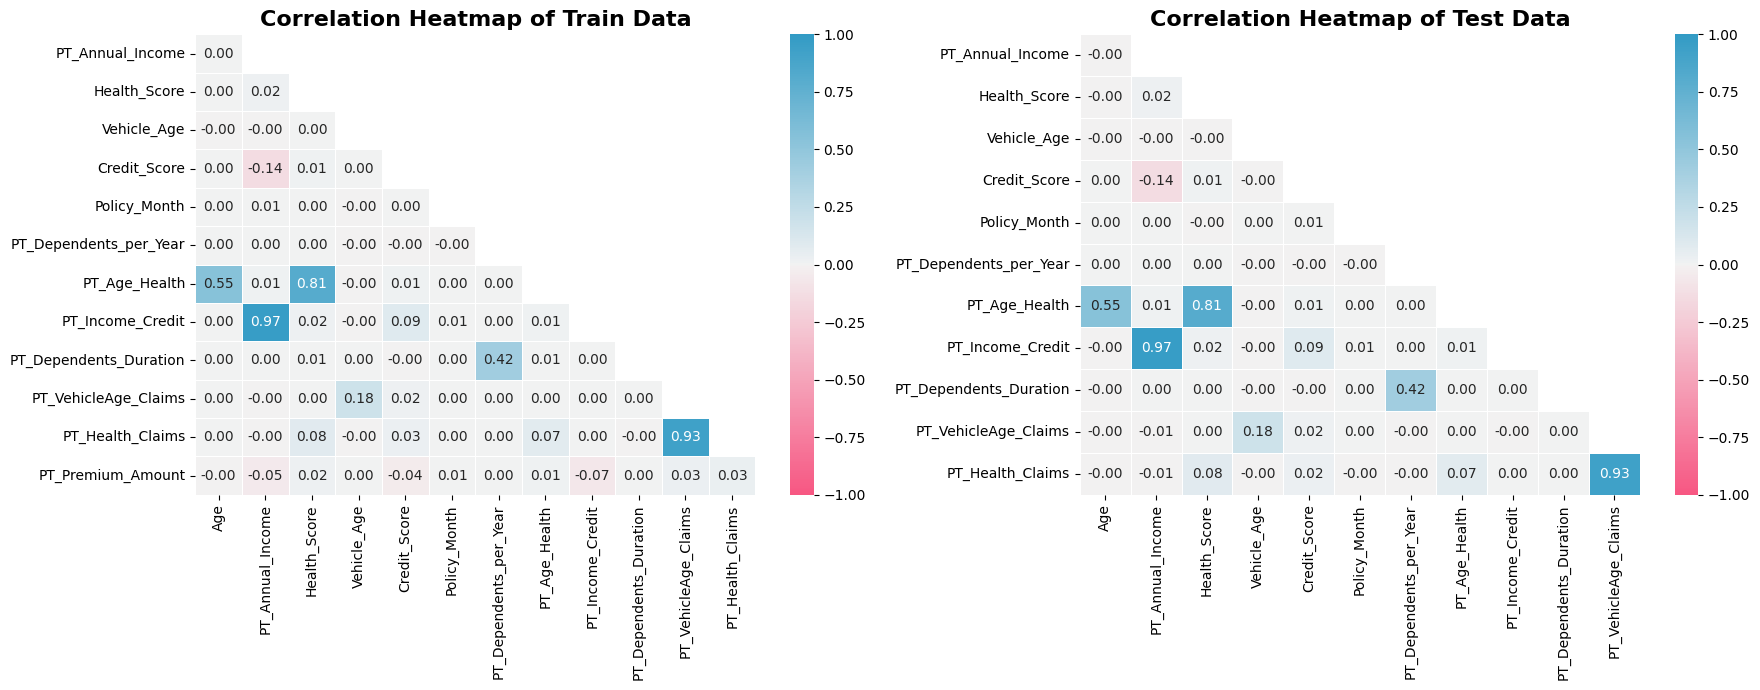

In [78]:
def plot_correlation_new(features, df_train, df_test, train_name="Train Data", test_name="Test Data"):
    corr_train = df_train[features].corr()
    if "PT_Premium_Amount" in features:
        features.remove("PT_Premium_Amount")
    corr_test = df_test[features].corr()

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

num_features_cor = num_features_train
plot_correlation_new(features=num_features_cor,df_train=processed_train_df, df_test=processed_test_df)

**Comparison Before and After Applying Yeo-Johnson (PT\_ Features)**

**Key Observations:**

* The **overall correlation structure remains nearly unchanged**, especially for mathematically combined features like `Age_Health`, `Income_Credit`, `Health_Claims`, etc.
* This indicates that **Yeo-Johnson primarily alters data distributions (reducing skewness) without disrupting the underlying linear relationships between features**.

**Notable Consistencies:**

| Feature Pair                         | Corr (Before) | Corr (After PT\_) | Notes                                        |
| ------------------------------------ | ------------- | ----------------- | -------------------------------------------- |
| `Income_Credit` vs `Annual_Income`   | \~0.93        | \~0.97            | Very strong — relationship preserved      |
| `Age_Health` vs `Health_Score`       | \~0.79        | \~0.81            | Slightly increased — remains strong       |
| `Health_Claims` vs `Health_Score`    | \~0.30        | \~0.30–0.32       | Unchanged                                 |
| `VehicleAge_Claims` vs `Vehicle_Age` | \~0.36        | \~0.18            | Slight drop — still moderate relationship |
| `Premium_Amount` vs others (only train data)         | \~0.00        | \~0.00            | No linear correlation before or after     |

**Conclusion**

> *PowerTransformer (Yeo-Johnson) effectively reduces skewness while **preserving the original linear correlations between features**.*
> This is a strong result — the transformed `PT_` features maintain their interpretability and modeling usefulness.

## Create Test Set

Suppose we chatted with experts who told us that the **Income_Group** is a very important attribute to predict **Premium_Amount**. We may want to ensure that the test set is representative of the various categories of **Income_Group** in the whole dataset.

In [79]:
# We need convert bool column to int8 to avoid to error "SimpleImputer does not support data with dtype bool".
list_feature_cat_int8 = ["Smoking_Status", "Is_Negative_Feedback", "Is_Smoker_At_Risk", "Has_Claimed"]
for col in list_feature_cat_int8:
    if processed_train_df[col].dtype == "bool":
        processed_train_df[col] = processed_train_df[col].astype("int8")
    if processed_test_df[col].dtype == "bool":
        processed_test_df[col] = processed_test_df[col].astype("int8")

# Display information about the DataFrames
print("Train Data Info:")
processed_train_df.info()

print("\nTest Data Info:")
processed_test_df.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   Age                     1200000 non-null  float64 
 1   Gender                  1200000 non-null  category
 2   Marital_Status          1200000 non-null  category
 3   Number_of_Dependents    1200000 non-null  category
 4   Education_Level         1200000 non-null  category
 5   Occupation              1200000 non-null  category
 6   Health_Score            1200000 non-null  float64 
 7   Location                1200000 non-null  category
 8   Policy_Type             1200000 non-null  category
 9   Previous_Claims         1200000 non-null  category
 10  Vehicle_Age             1200000 non-null  float64 
 11  Credit_Score            1200000 non-null  float64 
 12  Insurance_Duration      1200000 non-null  category
 13  Customer_Feedback       1

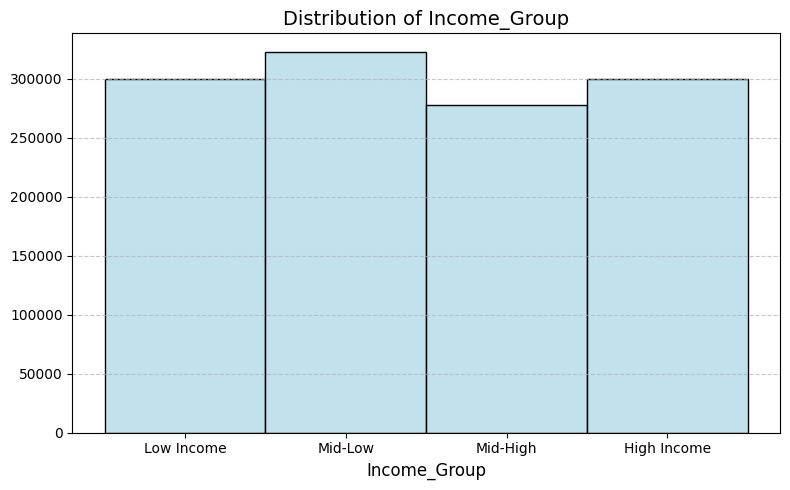

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(data=processed_train_df, x="Income_Group", color="lightblue", edgecolor="black")

plt.title("Distribution of Income_Group", fontsize=14)
plt.xlabel("Income_Group", fontsize=12)
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_train_df, processed_train_df["Income_Group"]):
    start_train_set = processed_train_df.iloc[train_index]
    start_test_set = processed_train_df.iloc[test_index]

## Scale

In [82]:
df_train_new = start_train_set.drop("PT_Premium_Amount", axis=1)
df_train_label_new = start_train_set["PT_Premium_Amount"].copy()

In [83]:
list_feature_num_robust = ["PT_Annual_Income", "PT_Age_Health", "PT_Income_Credit"]
list_feature_num_stand = ["Age", "Health_Score", "Vehicle_Age", "Credit_Score",
                          "Policy_Month", "PT_Dependents_per_Year", "PT_Dependents_Duration", "PT_VehicleAge_Claims", "PT_Health_Claims"]
list_feature_cat_onehot = ["Gender", "Marital_Status", "Number_of_Dependents", "Education_Level", "Occupation", "Location", "Policy_Type", "Previous_Claims", "Insurance_Duration",
                           "Customer_Feedback", "Exercise_Frequency", "Property_Type", "Income_Group", "Age_Group", "Health_Risk_Level", "Policy_Season"]
list_feature_cat_keep = ["Smoking_Status", "Is_Negative_Feedback", "Is_Smoker_At_Risk", "Has_Claimed"]

In [84]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['PT_Annual_Income', 'PT_Age_Health',
                                  'PT_Income_Credit']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Health_Score', 'Vehicle_Age',
                                  'Credit_Score', 'Policy_Month',
                                  'PT_Dependents_per_Year',
                                  'PT_Dependents_Duration',
                                  'PT_VehicleAge_Claims', 'P...
                                  'Occupation', 'Location', 'Policy_Type',
                                  'Previous_Claims', 'Insurance_Duration',
                                  'Customer_Feedback', 'Exercise_Frequency',
                                  'Property_Type', 'Income_Group', 'Age_Group',
                                  'Health_Risk_Level', 'Policy_Season']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Smoking_Status', 'Is_Negative_Feedback',
                                  'Is_Smoker_At_Risk', 'Has_Claimed'])])

In [85]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_Annual_Income',
 'num_robust__PT_Age_Health',
 'num_robust__PT_Income_Credit',
 'num_standard__Age',
 'num_standard__Health_Score',
 'num_standard__Vehicle_Age',
 'num_standard__Credit_Score',
 'num_standard__Policy_Month',
 'num_standard__PT_Dependents_per_Year',
 'num_standard__PT_Dependents_Duration',
 'num_standard__PT_VehicleAge_Claims',
 'num_standard__PT_Health_Claims',
 'cat_onehot__Gender_Female',
 'cat_onehot__Gender_Male',
 'cat_onehot__Marital_Status_Divorced',
 'cat_onehot__Marital_Status_Married',
 'cat_onehot__Marital_Status_Single',
 'cat_onehot__Marital_Status_Unknown',
 'cat_onehot__Number_of_Dependents_0.0',
 'cat_onehot__Number_of_Dependents_1.0',
 'cat_onehot__Number_of_Dependents_2.0',
 'cat_onehot__Number_of_Dependents_3.0',
 'cat_onehot__Number_of_Dependents_4.0',
 "cat_onehot__Education_Level_Bachelor's",
 'cat_onehot__Education_Level_High School',
 "cat_onehot__Education_Level_Master's",
 'cat_onehot__Education_Level_PhD',
 'cat_onehot__Occupa

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Root Mean Squared Logarithmic Error (RMSLE)**

**Definition:**

**RMSLE (Root Mean Squared Logarithmic Error)** is a regression evaluation metric that measures the average logarithmic difference between predicted values and actual values. It is particularly useful when we care more about the **relative error** than the absolute one, and when the target variable spans several orders of magnitude.

Unlike RMSE, RMSLE **penalizes under-predictions more than over-predictions**, and **is more tolerant to large absolute errors when both values are large**.

🧮 **Formula:**

$$
\text{RMSLE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2 }
$$

* \$y\_i\$: Actual value
* \$\hat{y}\_i\$: Predicted value
* \$n\$: Number of observations
* \$\log\$: Natural logarithm

📌 **Characteristics:**

* RMSLE is **always non-negative** (≥ 0).
* Values closer to **0** indicate better performance.
* Unlike RMSE, it **measures the ratio between prediction and actual value**, not their absolute difference.
* Works best when:

  * Target values are **positive** and **span a wide range**.
  * We care about **percentage errors** more than absolute deviations.
* **Insensitive to large errors when both prediction and true value are large**.

📎 **Important Notes:**

* Both `y_i` and `ŷ_i` must be **≥ 0**.
* RMSLE is **not defined for negative values** (due to \$\log(1 + x)\$).
* Often used in **price prediction**, **sales forecasts**, and **insurance cost estimation** problems.

**References:**

* [Kaggle: RMSLE Explanation](https://www.kaggle.com/code/mathormad/kaggle-rmsle-score-explained)
* [Scikit-learn: `mean_squared_log_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [86]:
def safe_rmsle(y_true, y_pred):
    y_true = np.maximum(0, y_true) + 1
    y_pred = np.maximum(0, y_pred) + 1
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

rmsle_scorer = make_scorer(safe_rmsle, greater_is_better=False)

In [87]:
# We use some models to compare performance.
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

seed = 42
max_iter = 50000
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

models = [
    CatBoostRegressor(random_seed=seed, verbose=False),
    Lasso(alpha=0.0005, max_iter=max_iter, random_state=seed),
    Ridge(alpha=10, max_iter=max_iter, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=seed, verbosity=0),
    LGBMRegressor(random_state=seed, verbosity=-1)
]

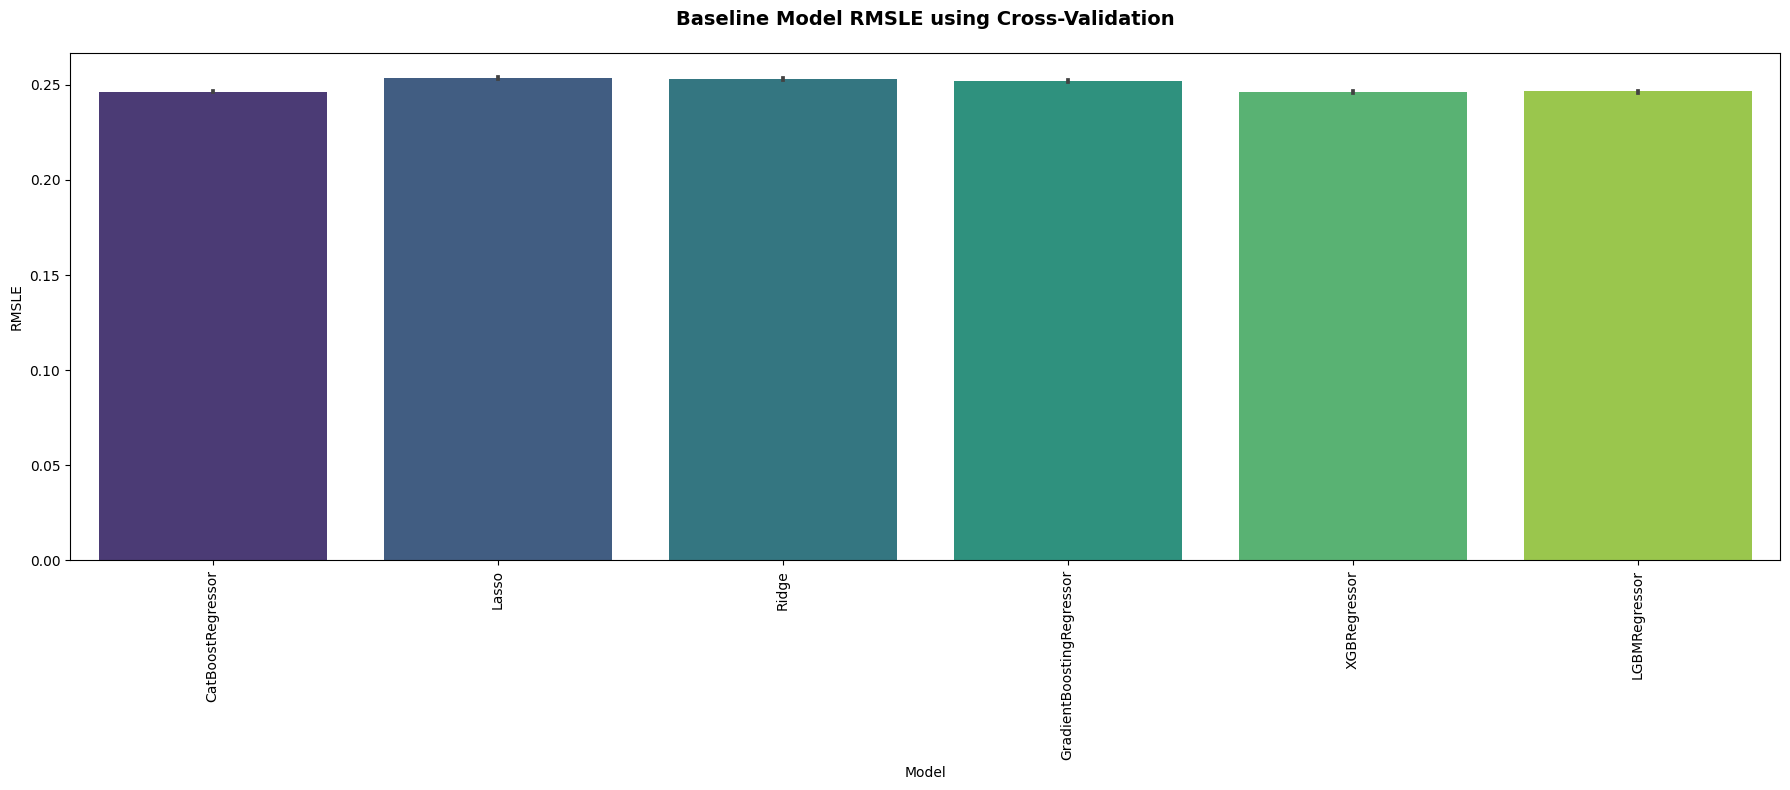

Mean  Standard Deviation
model_name                                             
XGBRegressor               0.246115            0.000548
CatBoostRegressor          0.246412            0.000579
LGBMRegressor              0.246432            0.000643
GradientBoostingRegressor  0.251875            0.000674
Ridge                      0.253088            0.000661
Lasso                      0.253618            0.000658

In [88]:
def generate_baseline_results(models=models, X=df_train_new_prepared, y=df_train_label_new,
                              metric=rmsle_scorer, cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, -score))  # negate the score here

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "rmsle_score"])

    # Summary
    mean = cv_df.groupby("model_name")["rmsle_score"].mean()
    std = cv_df.groupby("model_name")["rmsle_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by RMSLE (lower is better)
    baseline_result.sort_values(by="Mean", ascending=True, inplace=True)

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="rmsle_score", data=cv_df, palette="viridis")
        plt.title("Baseline Model RMSLE using Cross-Validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("RMSLE")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    return baseline_result

generate_baseline_results(plot_result=True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [89]:
def shap_plot(model, X_test, list_feature):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)

    shap_importance = np.abs(shap_values.values).mean(axis=0)
    shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
    shap_df = shap_df.sort_values("importance", ascending=False).head(30)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
    plt.xlabel("mean(|SHAP value|)")
    plt.title("SHAP Feature Importance", weight="bold", pad=20)
    plt.tight_layout()
    plt.show()

In [90]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, pt_premium_amount=None, show_shap_plot = False):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Back-transform predictions and ground truth
    if pt_premium_amount is not None:
        y_val_real = pt_premium_amount.inverse_transform(y_val.values.reshape(-1, 1)).flatten()
        y_pred_real = pt_premium_amount.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_val_real = y_val
        y_pred_real = y_pred
    
    # Metrics: RMSLE
    rmsle = safe_rmsle(y_val_real, y_pred_real)
    if rmsle < 0:
        rmsle = -rmsle

    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Root Mean Squared Logarithmic Error (RMSLE): {BLUE}{rmsle:.4f}{RESET}")
    print("-" * 80)

    plt.figure(figsize=(7, 7))
    plt.scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], "r--", lw=2, label="Perfect Prediction (y=x)")
    plt.xlabel("Actual Values (SalePrice)")
    plt.ylabel("Predicted Values (SalePrice)")
    plt.title("Predicted vs. Actual Values (Validation Set)", weight="bold", pad=20)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Residuals plot
    residuals = y_val_real - y_pred_real
    plt.figure(figsize=(7, 7))
    plt.scatter(y_val_real, residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--", lw=2)
    plt.xlabel("Actual Values (SalePrice)")
    plt.ylabel("Prediction Error (Residuals)")
    plt.title("Residual Plot", weight="bold", pad=20)
    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return rmsle

In [91]:
X_val = start_test_set.drop("PT_Premium_Amount", axis=1)
y_val = start_test_set["PT_Premium_Amount"].copy()
X_val_prepared = preprocessor.transform(X_val)

## XGBRegressor

In [92]:
# After running optuna
param_xgb = {
"n_estimators": 552,
"max_depth": 15,
"learning_rate": 0.07148357030575762,
"subsample": 0.6699865700828613,
"colsample_bytree": 0.9402353786703079,
"gamma": 0.8905466258539609,
"reg_alpha": 4.539188741638234,
"reg_lambda": 2.0218637418195575,
"min_child_weight": 16,
"random_state": seed,
"verbosity": 0    
}

best_model_xgb = XGBRegressor(**param_xgb)
best_model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9402353786703079, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.8905466258539609,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07148357030575762,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=16, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=552, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Model: XGBRegressor
Root Mean Squared Logarithmic Error (RMSLE): 1.0782
--------------------------------------------------------------------------------


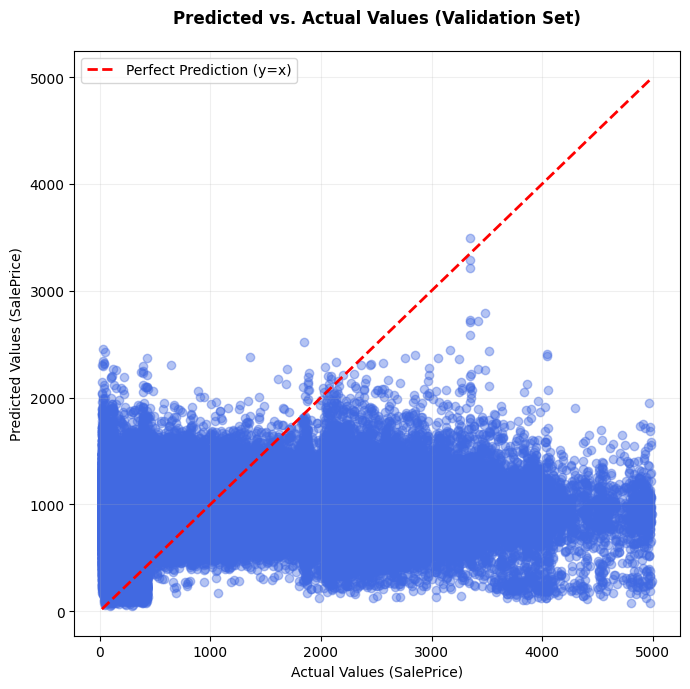

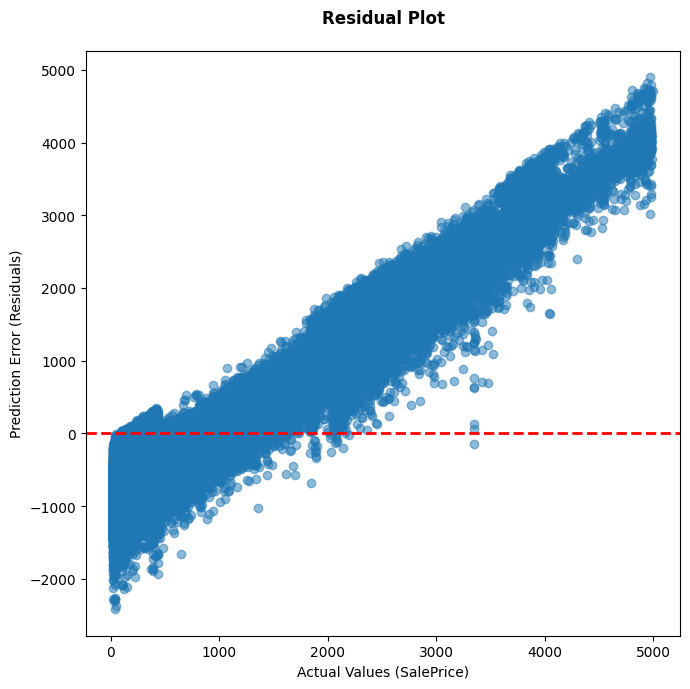

In [93]:
weight_rmsle_xgb = evaluate_model(model = best_model_xgb, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, pt_premium_amount = pt_dict_train["Premium_Amount"])

## CatBoostRegressor

In [94]:
param_cb = {
"iterations": 1833,
"depth": 10,
"learning_rate": 0.19464582738554204,
"l2_leaf_reg": 3.7646977567494093,
"bagging_temperature": 0.2052232889552441,
"random_strength": 0.05417731781709137,
"border_count": 187,
"loss_function": "RMSE",
"verbose": 0,
"random_seed": seed
}

best_model_cb = CatBoostRegressor(**param_cb)
best_model_cb

Model: CatBoostRegressor
Root Mean Squared Logarithmic Error (RMSLE): 1.0792
--------------------------------------------------------------------------------


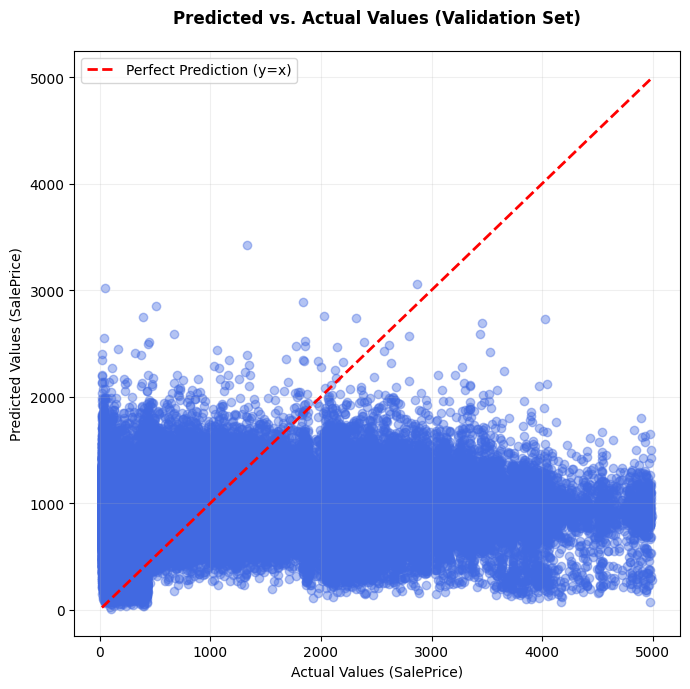

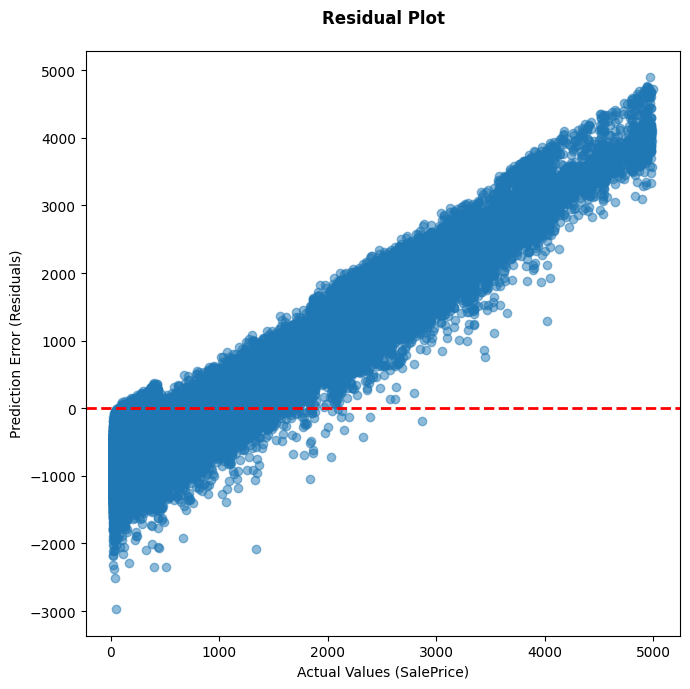

In [95]:
weight_rmsle_cb = evaluate_model(model = best_model_cb, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, pt_premium_amount = pt_dict_train["Premium_Amount"])

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


## VotingRegressor

In [96]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ("xgb", best_model_xgb),
    ("cat", best_model_cb)
], n_jobs=-1, weights=[weight_rmsle_xgb, weight_rmsle_cb])

cv_scores = cross_val_score(
    voting_reg,
    X=df_train_new_prepared,
    y=df_train_label_new,
    cv=kfold,
    scoring=rmsle_scorer,
    n_jobs=-1
)

mean_score = -cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated RMSLE (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated RMSLE (mean ± std): 0.2422 ± 0.0005


Model: VotingRegressor
Root Mean Squared Logarithmic Error (RMSLE): 1.0736
--------------------------------------------------------------------------------


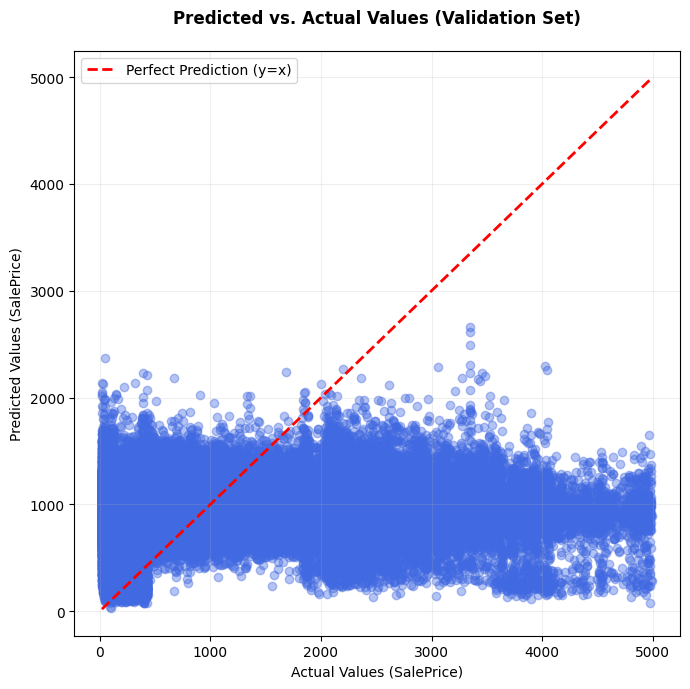

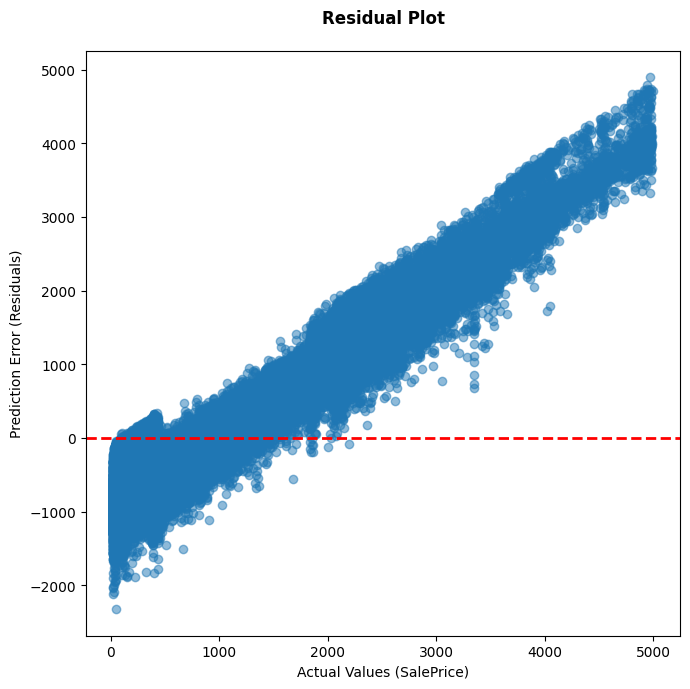

1.0736254677302526

In [97]:
evaluate_model(model = voting_reg, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, pt_premium_amount = pt_dict_train["Premium_Amount"])

In [98]:
df_test_prepared = preprocessor.transform(processed_test_df)
y_pred_test = voting_reg.predict(df_test_prepared)
y_pred_test_real = pt_dict_train["Premium_Amount"].inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

In [99]:
submission_df = pd.DataFrame({
    "Id": list_test_id,
    "Premium Amount": y_pred_test_real
})

submission_df.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission_df.head()


Submission file saved!


Id  Premium Amount
0  1200000     1311.809948
1  1200001     1025.932981
2  1200002      964.535025
3  1200003      777.308501
4  1200004      889.472697

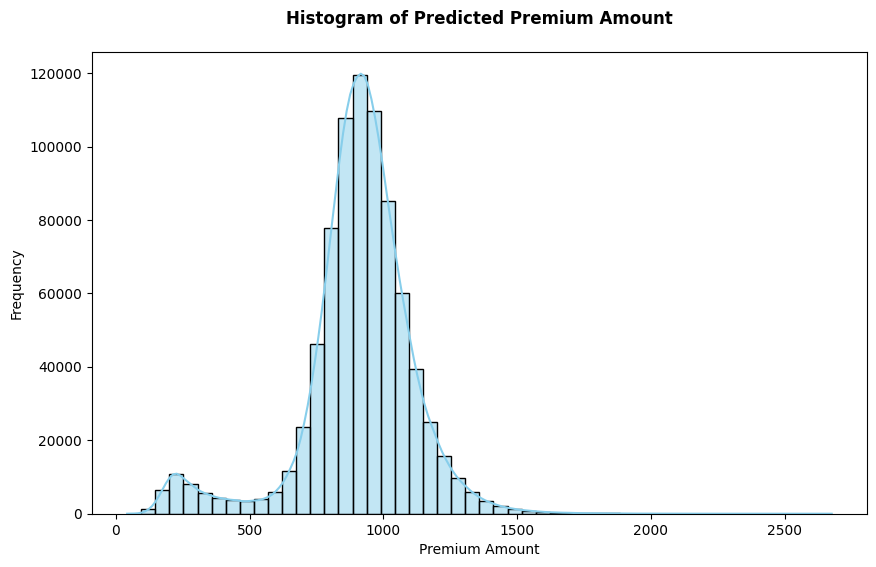

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(submission_df["Premium Amount"], bins=50, kde=True, color="skyblue")
plt.title("Histogram of Predicted Premium Amount", weight="bold", pad=20)
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

PermutationExplainer explainer: 201it [06:24,  1.94s/it]


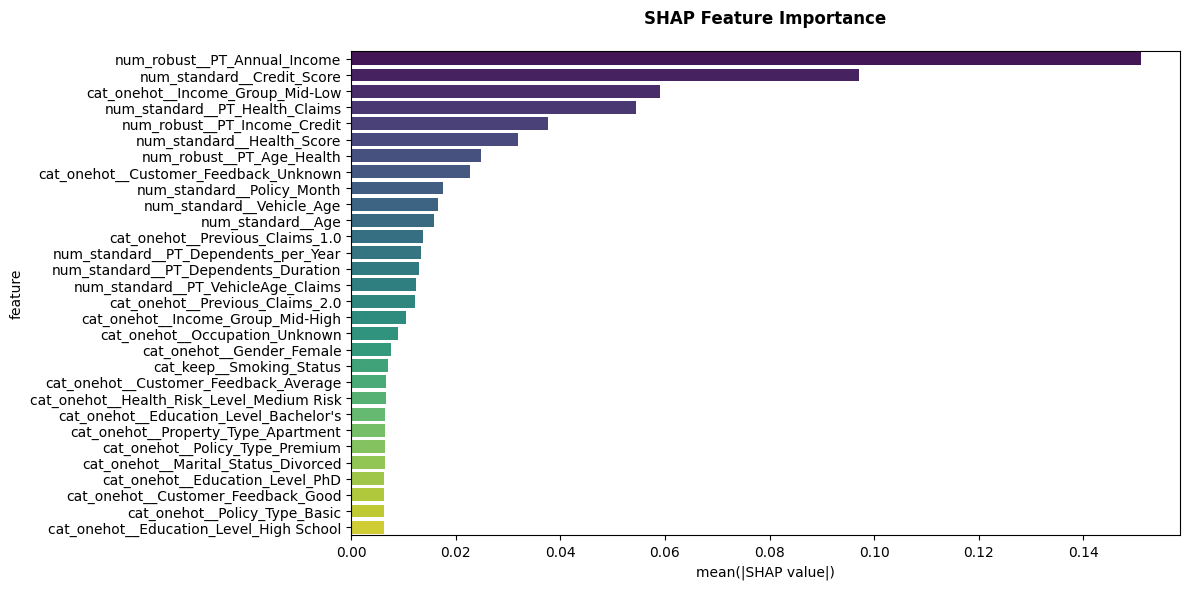

In [101]:
shap_plot(
    model = voting_reg,
    X_test = df_test_prepared[:200],
    list_feature = list_feature_prepared
)

**Overview of SHAP Feature Importance**

**Top 5 Most Influential Features**

| Rank | Feature Name                       | Type                  |
| ---- | ---------------------------------- | --------------------- |
| 1  | `num_robust__PT_Annual_Income`     | Numerical             |
| 2  | `num_standard__Credit_Score`       | Numerical             |
| 3️  | `cat_onehot__Income_Group_Mid-Low` | Categorical (One-hot) |
| 4️  | `num_standard__PT_Health_Claims`   | Numerical             |
| 5️  | `num_robust__PT_Income_Credit`     | Numerical             |

**Medical and Age-Related Features Are Also Important**

* `num_standard__Health_Score` and `num_robust__PT_Age_Health` are ranked in the top 10.
* `num_standard__Age` and `num_standard__Vehicle_Age` are also highly ranked, indicating:

  * Both customer age and vehicle age are related to **accident/health risk**, and thus affect the insurance premium.

**Demographic and Customer Profile Variables**

* Some important one-hot encoded variables include:

  * `cat_onehot__Customer_Feedback_Unknown`, `Customer_Feedback_Average`, `Customer_Feedback_Good`: Reflect customer feedback levels.
  * `cat_onehot__Education_Level_PhD`, `Education_Level_High School`: Indicate educational background and potential segmentation.
  * `cat_onehot__Occupation_Unknown`, `Gender_Female`, `Marital_Status_Divorced`: Capture general demographic information.

**Key Insights**

1. **Financial and health-related attributes are the primary drivers of insurance premium prediction.**

   * Annual income, credit score, and history of health insurance claims are the most influential.
2. **Demographic factors also contribute and should not be overlooked.**

   * Marital status, education level, occupation, and customer feedback all help refine pricing decisions.
3. **Some features have minimal impact.**

   * For example: `cat_onehot__Customer_Feedback_Good`, `Location_Suburban` — potentially due to low variance or weak class separability.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>


**Summary Table – SHAP Importance & Business Implication**

| Feature                              | SHAP Importance | Business Insight                                                 | Suggested Action                                              |
| ------------------------------------ | --------------- | ---------------------------------------------------------------- | ------------------------------------------------------------- |
| **Annual Income**                    | Very High     | Higher income → lower risk → lower premium                       | Target high-income segments with competitive pricing          |
| **Credit Score**                     | Very High     | Better credit → signals reliability                              | Offer loyalty benefits to customers with top credit ratings   |
| **Income Group (Mid-Low)**           | High          | Customers in mid-low income bracket → higher premium risk        | Consider risk-adjusted pricing or pre-approval filters        |
| **Health Claims Count**              | High          | More past health claims → strongly linked to higher premium      | Apply tiered premium model based on claim history             |
| **Income-to-Credit Ratio**           | High          | High ratio → lower financial flexibility → higher risk           | Monitor this ratio and restrict high-value policies if needed |
| **Health Score**                     | Medium       | Low health score → increased likelihood of health-related claims | Require regular health updates for high-risk individuals      |
| **Age (Health-related)**             | Medium       | Older individuals may pose higher claim risk                     | Use age-based pricing thresholds                              |
| **Vehicle Age**                      | Medium       | Older vehicles could indicate higher maintenance/risk exposure   | Apply vehicle age surcharge policies                          |
| **Customer Feedback (Unknown)**      | Medium       | Missing feedback → correlated with unpredictability or churn     | Incentivize feedback submission post-purchase                 |
| **Education Level / Marital Status** | Low          | Minimal impact on premium prediction                             | May deprioritize or simplify in pricing models                |

**Key Takeaways**

* **Financial and health-related factors** (income, credit score, claims history) dominate premium prediction.
* **Missing behavioral signals** (e.g., unknown feedback) indicate hidden risks → require intervention.
* **Demographic variables** (e.g., gender, marital status) have **limited predictive power**, supporting a behavior-driven pricing strategy.

**Strategic Recommendations by Customer Segment**

| Customer Segment             | Key Feature(s)                   | Recommended Action                                                    |
| ---------------------------- | -------------------------------- | --------------------------------------------------------------------- |
| **Financially stable**       | High Income, High Credit Score   | Offer lower premiums and premium upgrade options                      |
| **High claim history**       | Health Claims, Health Score      | Apply risk surcharges and request ongoing health disclosures          |
| **Young & low-income**       | Income Group, Age                | Provide simplified products or capped benefit plans                   |
| **Data-deficient profiles**  | Feedback Unknown, Missing values | Encourage data completion (feedback, health info) via incentive flows |
| **Low-risk vehicle holders** | New Vehicle, Good Credit         | Cross-sell extended vehicle protection or wellness add-ons            |

<!-- Google Fonts for Roboto -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #762a83;
    padding: 20px;
    background: linear-gradient(135deg, #e7d4e8, #d9f0d3);
    font-family: 'Roboto', sans-serif;
    box-shadow: 0 4px 8px rgba(0,0,0,0.2);
">
  <h4 style="color:#40004b; font-weight:700; margin-bottom:15px;"> Acknowledgements</h4>
  <p style="font-size:15px; color:#333;"> 
  <a href="https://www.kaggle.com/sulaniishara" style="color:#762a83; text-decoration:underline;">
    @sulaniishara -
  </a>  
  <a href="https://www.kaggle.com/code/sulaniishara/lightgbm-unleashed-premiums-decoded" style="color:#762a83; text-decoration:underline;">
    🌟 LightGBM Unleashed: Premiums Decoded 🔍
  </a>
</p>

  <h4 style="color:#40004b; font-weight:700; margin-top:30px; margin-bottom:16px;">References</h4>
  <ul style="color:#333; font-size:15px;">
    <li><a href="https://www.kaggle.com/competitions/playground-series-s4e12/data" style="color:#762a83;">Kaggle Playground Series – S4E12</a></li>
  </ul>

  <h4 style="color:#40004b; font-weight:700; margin-top:30px; margin-bottom:16px;">Citation</h4>
  <p style="font-size:15px; color:#333;">
    Walter Reade and Elizabeth Park. <strong>Regression with an Insurance Dataset.</strong><br/>
    <a href="https://www.kaggle.com/competitions/playground-series-s4e12" style="color:#762a83; text-decoration:underline;">Kaggle Competition Playground Series S4E12, 2024</a>
  </p>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
